In [320]:
import pandas as pd
import seaborn as sn
!pip install matplotlib
import matplotlib.pyplot as plt
from polyleven import levenshtein
import numpy as np

In [58]:
from howlongtobeatpy import HowLongToBeat

In [116]:
results_list = await HowLongToBeat().async_search("Sid Meier's Civilization VI")
if results_list is not None and len(results_list) > 0:
    best_element = max(results_list, key=lambda element: element.similarity)

In [117]:
print(best_element.game_name)
print(best_element.gameplay_main_label)
print(best_element.gameplay_main+best_element.gameplay_main_unit)
print(best_element.gameplay_main_extra_label)
print(best_element.gameplay_main_extra+best_element.gameplay_main_extra_unit)
print(best_element.gameplay_completionist_label)
print(best_element.gameplay_completionist+best_element.gameplay_completionist_unit)

Sid Meier's Civilization V
Main Story
39½Hours
Main + Extra
114Hours
Completionist
405Hours


In [118]:
civ_name = best_element.game_name
print(civ_name)

Sid Meier's Civilization V


In [36]:
from steam.webapi import WebAPI

In [34]:
SteamID(1245620)

SteamID(id=1245620, type='Individual', universe='Public', instance=1)

In [1]:
import steamspypi

In [59]:
data_request = dict()
data_request['request'] = 'appdetails'
data_request['appid'] = '1245620'

data = steamspypi.download(data_request)

In [60]:
data

{'appid': 1245620,
 'name': 'ELDEN RING',
 'developer': 'FromSoftware Inc.',
 'publisher': 'FromSoftware Inc., BANDAI NAMCO Entertainment',
 'score_rank': '',
 'positive': 284156,
 'negative': 41646,
 'userscore': 0,
 'owners': '20,000,000 .. 50,000,000',
 'average_forever': 3503,
 'average_2weeks': 2158,
 'median_forever': 2929,
 'median_2weeks': 1923,
 'price': '5999',
 'initialprice': '5999',
 'discount': '0',
 'ccu': 556954,
 'languages': 'English, French, Italian, German, Spanish - Spain, Japanese, Korean, Polish, Portuguese - Brazil, Russian, Simplified Chinese, Spanish - Latin America, Thai, Traditional Chinese',
 'genre': 'Action, RPG',
 'tags': {'Souls-like': 3253,
  'Dark Fantasy': 2593,
  'Relaxing': 2565,
  'RPG': 2305,
  'Difficult': 2202,
  'Action RPG': 1943,
  'Third Person': 1893,
  'Multiplayer': 1795,
  'Fantasy': 1765,
  'Online Co-Op': 1737,
  'Action': 1707,
  'Singleplayer': 1667,
  'Open World': 1628,
  'Co-op': 1541,
  'PvP': 1496,
  'Violent': 1392,
  '3D': 12

In [9]:
import steampi.text_distances
import steamspypi

steamspy_database = steamspypi.load()
steamspy_database
input_text = 'Elden Ring'
sorted_app_ids, text_distances = steampi.text_distances.find_most_similar_game_names(input_text,
                                                                                     steamspy_database)

num_games_to_print = 5
for i in range(num_games_to_print):
    similar_game_name = steamspy_database[sorted_app_ids[i]]
    print(similar_game_name)
    print(text_distances[sorted_app_ids[i]])

{'appid': 1245620, 'name': 'ELDEN RING', 'developer': 'FromSoftware Inc.', 'publisher': 'FromSoftware Inc., BANDAI NAMCO Entertainment', 'score_rank': '', 'positive': 325413, 'negative': 43936, 'userscore': 0, 'owners': '20,000,000 .. 50,000,000', 'average_forever': 4054, 'average_2weeks': 1855, 'median_forever': 3446, 'median_2weeks': 1400, 'price': '5999', 'initialprice': '5999', 'discount': '0', 'ccu': 480004}
0
{'appid': 678960, 'name': 'CODE VEIN', 'developer': 'BANDAI NAMCO Studios', 'publisher': 'BANDAI NAMCO Entertainment', 'score_rank': '', 'positive': 34179, 'negative': 5048, 'userscore': 0, 'owners': '1,000,000 .. 2,000,000', 'average_forever': 1403, 'average_2weeks': 350, 'median_forever': 979, 'median_2weeks': 465, 'price': '5999', 'initialprice': '5999', 'discount': '0', 'ccu': 600}
6
{'appid': 272060, 'name': 'Serena', 'developer': 'Senscape', 'publisher': 'Senscape', 'score_rank': '', 'positive': 4854, 'negative': 1426, 'userscore': 0, 'owners': '10,000,000 .. 20,000,00

In [2]:
import time
from IPython.display import clear_output

i = 0
all_games = dict()

while i == 0 or len(data) > 0:
    data_request = dict()
    data_request['request'] = 'all'
    data_request['page'] = i

    data = steamspypi.download(data_request)
    all_games.update(data)
    i=i+1
    clear_output(wait=True)
    print(i)
    #throttle to one page per minute as asked to do by documentation
    time.sleep(60)


54


In [3]:
len(all_games)

51277

In [11]:
all_games_df = pd.DataFrame(all_games.values())

In [13]:
all_games_df.head()

appid                              name  \
0      570                            Dota 2   
1   578080               PUBG: BATTLEGROUNDS   
2  1063730                         New World   
3      440                   Team Fortress 2   
4      730  Counter-Strike: Global Offensive   

                          developer      publisher score_rank  positive  \
0                             Valve          Valve              1422627   
1                     KRAFTON, Inc.  KRAFTON, Inc.              1112491   
2                      Amazon Games   Amazon Games               151234   
3                             Valve          Valve               800629   
4  Valve, Hidden Path Entertainment          Valve              5564165   

   negative  userscore                      owners  average_forever  \
0    281005          0  100,000,000 .. 200,000,000            36312   
1    877788          0   50,000,000 .. 100,000,000            23049   
2     71103          0   50,000,000 .. 100,000,000             8423   
3     54360          0   50,000,000 .. 100,000,000             7435   
4    743531          0   50,000,000 .. 100,000,000            27946   

   average_2weeks  median_forever  median_2weeks price initialprice discount  \
0            1602             865            866     0            0        0   
1             684            7578            218     0            0        0   
2             732            3434            867  3999         3999        0   
3             341             338            129     0            0        0   
4             770            6400            304     0            0        0   

      ccu  
0  679108  
1  471610  
2   26413  
3   81774  
4  902289

In [14]:
all_games_df.to_csv('all_steam_games.csv')

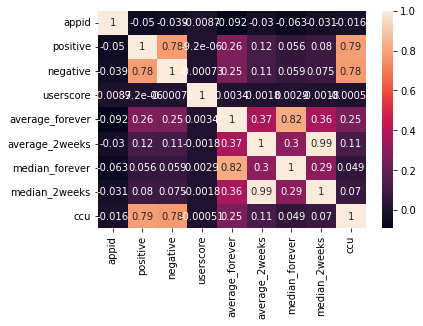

In [21]:
corrMatrix = all_games_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

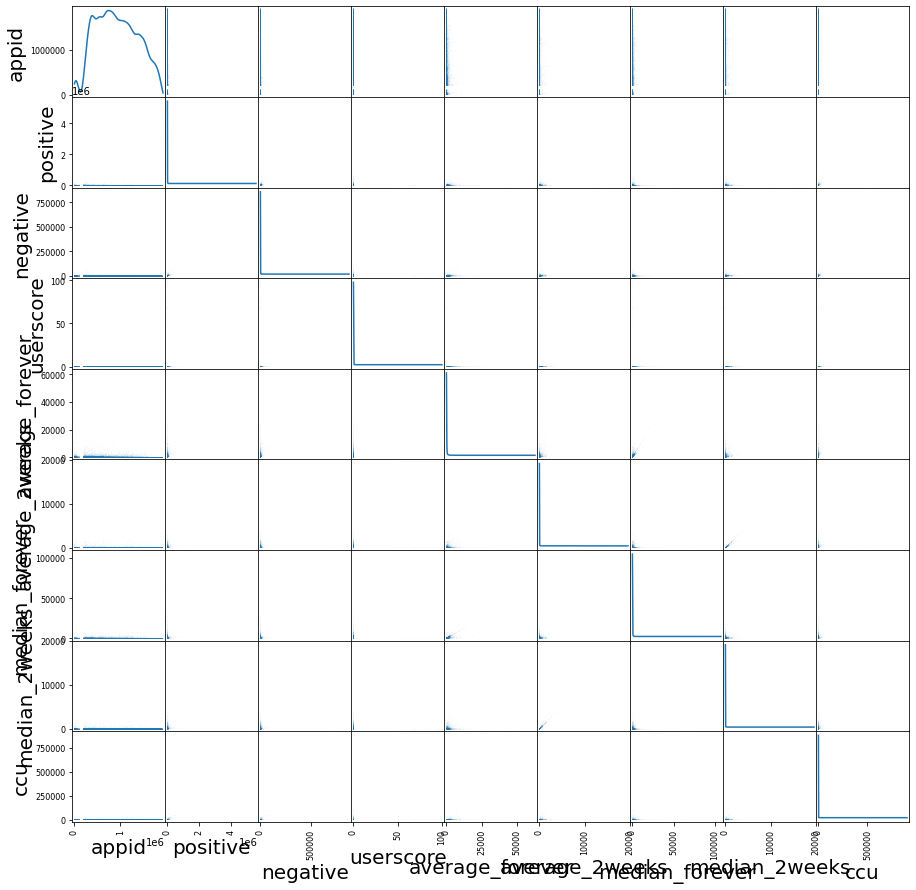

In [27]:
scatter_matrix = pd.plotting.scatter_matrix(
    all_games_df,
    figsize  = [15, 15],
    marker   = ".",
    s        = 0.2,
    diagonal = "kde"
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 90)

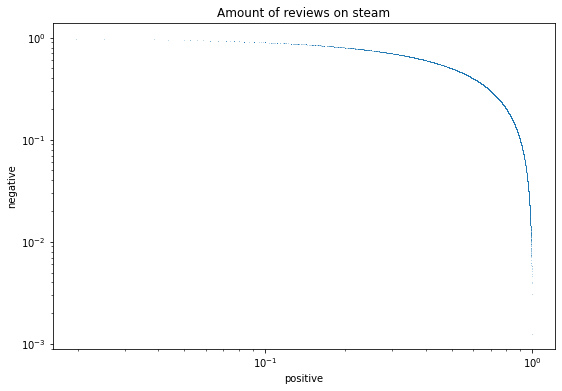

In [42]:
fig, ax = plt.subplots(figsize = (9, 6))
total_reviews = all_games_df["positive"]+all_games_df["negative"]
ax.scatter(all_games_df["positive"]/total_reviews, all_games_df["negative"]/total_reviews, s=0.2, linewidths=0)
ax.set_xscale("log");
ax.set_yscale("log");
ax.set_xlabel("positive")
ax.set_ylabel("negative")
plt.title("Amount of reviews on steam")
plt.show()

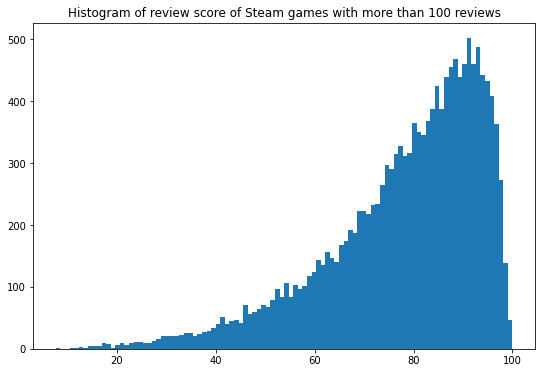

In [53]:
fig, ax = plt.subplots(figsize = (9, 6))
total_reviews = all_games_df["positive"]+all_games_df["negative"]
games_with_enough_reviews = all_games_df[total_reviews > 100]
ax.hist(100*games_with_enough_reviews["positive"]/total_reviews, bins=100)
plt.title("Histogram of review score of Steam games with more than 100 reviews")
plt.show()

In [121]:
hl2b_games = dict()
games_not_found = []
for game_name in all_games_df["name"]:
    results_list = await HowLongToBeat().async_search(game_name.title().replace('’', '\'').replace('Vi', 'VI'))
    if results_list is not None and len(results_list) > 0:
        best_element = max(results_list, key=lambda element: element.similarity)
        if levenshtein(game_name.lower(), best_element.game_name.lower(), 4) < 4:
            print(game_name)
            print(best_element.game_name)
#             print("used to search: " + game_name.title().replace('’', '\''))
            print("----------")
            hl2b_games[game_name] = (best_element)
        else:
            print(game_name + " not found")
            print("----------")
            games_not_found.append(game_name)
    else:
        print(game_name + " not found")
        print("----------")
        games_not_found.append(game_name)

Dota 2
Dota 2
----------
PUBG: BATTLEGROUNDS not found
----------
New World
New World
----------
Team Fortress 2
Team Fortress 2
----------
Counter-Strike: Global Offensive
Counter-Strike: Global Offensive
----------
Unturned
Unturned
----------
Left 4 Dead 2
Left 4 Dead 2
----------
Terraria
Terraria
----------
Warframe
Warframe
----------
Apex Legends
Apex Legends
----------
ELDEN RING
Elden Ring
----------
Rust
Rust
----------
Brawlhalla
Brawlhalla
----------
Grand Theft Auto V
Grand Theft Auto V
----------
Garry's Mod
Garry's Mod
----------
Tom Clancy's Rainbow Six Siege
Tom Clancy's Rainbow Six Siege
----------
War Thunder
War Thunder
----------
Among Us
Among Us
----------
Half-Life 2: Lost Coast
Half-Life 2: Lost Coast
----------
Lost Ark
Lost Ark
----------
Destiny 2
Destiny 2
----------
PAYDAY 2
Payday 2
----------
Valheim
Valheim
----------
Halo Infinite
Halo Infinite
----------
Path of Exile
Path of Exile
----------
Wallpaper Engine not found
----------
Fall Guys: Ultimate K

Little Nightmares
Little Nightmares
----------
BattleBlock Theater
BattleBlock Theater
----------
The Witcher 2: Assassins of Kings Enhanced Edition not found
----------
Outlast
Outlast
----------
Insurgency
Insurgency
----------
Deep Rock Galactic
Deep Rock Galactic
----------
Arma 2: Operation Arrowhead
ARMA 2: Operation Arrowhead
----------
PAYDAY The Heist
Payday: The Heist
----------
Undertale
Undertale
----------
Hunt: Showdown
Hunt: Showdown
----------
Warhammer 40,000: Space Marine - Anniversary Edition not found
----------
Call of Duty: Black Ops III
Call of Duty: Black Ops III
----------
Amnesia: The Dark Descent
Amnesia: The Dark Descent
----------
Rise of the Tomb Raider
Rise of the Tomb Raider
----------
Plants vs. Zombies GOTY Edition not found
----------
Sniper Elite V2
Sniper Elite V2
----------
BioShock
BioShock
----------
BLOCKADE 3D
Blockade 3D
----------
Half-Life: Source
Half-Life: Source
----------
DOOM Eternal
Doom Eternal
----------
Total War: THREE KINGDOMS
Tot

Batman: Arkham City - Game of the Year Edition not found
----------
Assassin's Creed 2 not found
----------
Metin2
Metin2
----------
DRAGON BALL FighterZ
Dragon Ball FighterZ
----------
Ori and the Will of the Wisps
Ori and the Will of the Wisps
----------
Golf With Your Friends
Golf With Your Friends
----------
DARK SOULS II: Scholar of the First Sin
Dark Souls II: Scholar of the First Sin
----------
ASTRONEER
Astroneer
----------
Wolcen: Lords of Mayhem
Wolcen: Lords of Mayhem
----------
Black Mesa
Black Mesa
----------
Sins of a Solar Empire: Rebellion
Sins of a Solar Empire: Rebellion
----------
Grand Theft Auto: Vice City
Grand Theft Auto: Vice City
----------
Trine Enchanted Edition
Trine: Enchanted Edition
----------
Conqueror's Blade
Conqueror's Blade
----------
Alien: Isolation
Alien: Isolation
----------
Batman: Arkham Knight
Batman: Arkham Knight
----------
Stay Out
Stay Out
----------
Sanctum 2
Sanctum 2
----------
BioShock Remastered not found
----------
Ori and the Blind 

Ace of Spades: Battle Builder not found
----------
Resident Evil 5
Resident Evil 5
----------
Noita
Noita
----------
Planet Coaster
Planet Coaster
----------
Call of Duty 4: Modern Warfare
Call of Duty 4: Modern Warfare
----------
OUTRIDERS
Outriders
----------
Emily is Away
Emily is Away
----------
Mark of the Ninja
Mark of the Ninja
----------
Car Mechanic Simulator 2018
Car Mechanic Simulator 2018
----------
Far Cry New Dawn
Far Cry New Dawn
----------
Magicka 2
Magicka 2
----------
Men of War: Assault Squad 2
Men of War: Assault Squad 2
----------
Tribes: Ascend
Tribes: Ascend
----------
Neon Abyss
Neon Abyss
----------
S.T.A.L.K.E.R.: Call of Pripyat
S.T.A.L.K.E.R.: Call of Pripyat
----------
NieR:Automata
Nier: Automata
----------
Forza Horizon 5
Forza Horizon 5
----------
ArcheBlade
ArcheBlade
----------
Alice: Madness Returns
Alice: Madness Returns
----------
Subnautica: Below Zero
Subnautica: Below Zero
----------
Five Nights at Freddy's
Five Nights at Freddy's
----------
Age 

The Isle
The Isle
----------
FINAL FANTASY VII
Final Fantasy VII
----------
Pathfinder: Kingmaker - Enhanced Plus Edition not found
----------
DmC: Devil May Cry
DmC: Devil May Cry
----------
Sherlock Holmes: The Devil's Daughter
Sherlock Holmes: The Devil's Daughter
----------
Data Hacker: Initiation
Data Hacker: Initiation
----------
The Red Solstice
The Red Solstice
----------
Rogue Legacy
Rogue Legacy
----------
Artifact
Artifact
----------
Blade and Sorcery
Blade and Sorcery
----------
STAR WARS - The Force Unleashed Ultimate Sith Edition not found
----------
Kenshi
Kenshi
----------
Ready or Not
Ready Or Not
----------
Red Faction: Armageddon
Red Faction: Armageddon
----------
BROKE PROTOCOL: Online City RPG
Broke Protocol: Online City RPG
----------
Her Story
Her Story
----------
Crysis Warhead
Crysis Warhead
----------
Injustice: Gods Among Us Ultimate Edition
Injustice: Gods Among Us - Ultimate Edition
----------
Resident Evil
Resident Evil
----------
Deus Ex: Game of the Year

Shadow Warrior 2
Shadow Warrior 2
----------
BioShock 2 Remastered not found
----------
Loop Hero
Loop Hero
----------
Dungeons 2
Dungeons 2
----------
Teeworlds
Teeworlds
----------
Back to Bed
Back To Bed
----------
Gems of War - Puzzle RPG not found
----------
Project Winter
Project Winter
----------
Contagion
Contagion
----------
Ultimate Doom not found
----------
Easy eSports not found
----------
Graveyard Keeper
Graveyard Keeper
----------
Pirates, Vikings, and Knights II not found
----------
EARTH DEFENSE FORCE 4.1 The Shadow of New Despair
Earth Defense Force 4.1: The Shadow of New Despair
----------
Red Faction Guerrilla Steam Edition not found
----------
Overlord II
Overlord II
----------
Ghostrunner
Ghostrunner
----------
Gauntlet Slayer Edition not found
----------
S.T.A.L.K.E.R.: Clear Sky
S.T.A.L.K.E.R.: Clear Sky
----------
Day of Defeat
Day of Defeat
----------
Bright Memory
Bright Memory
----------
Call of Duty: WWII
Call of Duty: WWII
----------
Euro Truck Simulator
E

Lobotomy Corporation | Monster Management Simulation not found
----------
DRAGON BALL XENOVERSE
Dragon Ball Xenoverse
----------
GTFO not found
----------
Skyforge
Skyforge
----------
Fallout 3
Fallout 3
----------
Post Scriptum
Post Scriptum
----------
Viking: Battle for Asgard
Viking: Battle for Asgard
----------
One Finger Death Punch
One Finger Death Punch
----------
Secret World Legends
Secret World Legends
----------
Fable Anniversary
Fable Anniversary
----------
Blood and Bacon
Blood and Bacon
----------
The LEGO NINJAGO Movie Video Game
The LEGO Ninjago Movie Videogame
----------
Turbo Pug DX
Turbo Pug DX
----------
Zero Escape: Zero Time Dilemma
Zero Escape: Zero Time Dilemma
----------
Stronghold Crusader HD not found
----------
ACE COMBAT 7: SKIES UNKNOWN
Ace Combat 7: Skies Unknown
----------
Cyber Hunter
Cyber Hunter
----------
DEFCON
Defcon 5
----------
Book of Demons
Book of Demons
----------
神舞幻想 Faith of Danschant not found
----------
Battlerite Royale
Battlerite Royal

Soda Dungeon
Soda Dungeon
----------
VEGA Conflict
VEGA Conflict
----------
Ultra Street Fighter IV
Ultra Street Fighter IV
----------
Farming Simulator 17
Farming Simulator 17
----------
Cat Burglar: A Tail of Purrsuit
Cat Burglar: A Tail of Purrsuit
----------
Renegade Ops
Renegade Ops
----------
Gothic 1 not found
----------
The Wind Road 紫塞秋风 not found
----------
Need for Speed Payback
Need for Speed: Payback
----------
Red Orchestra: Ostfront 41-45
Red Orchestra: Ostfront 41-45
----------
Last Man Standing
Last Man Standing
----------
Call of Cthulhu not found
----------
Escape Room - Der kranke Kollege
Escape Room - Der kranke Kollege
----------
Shadowrun: Dragonfall - Director's Cut
Shadowrun: Dragonfall - Director's Cut
----------
Darkwood
Darkwood
----------
VR Regatta - The Sailing Game
VR Regatta - The Sailing Game
----------
BLOCKADE
Blockade
----------
Streets of Rogue
Streets of Rogue
----------
Outland
Outland
----------
Paint the Town Red
Paint the Town Red
----------
S

BEEP not found
----------
Friday the 13th: Killer Puzzle
Friday the 13th: Killer Puzzle
----------
Worms W.M.D
Worms W.M.D
----------
Warrior Beneath Heaven not found
----------
Eastern Exorcist
Eastern Exorcist
----------
The Pasture
The Pasture
----------
Nidhogg
Nidhogg
----------
Ball 3D
Ballz 3D
----------
Soda Dungeon 2
Soda Dungeon 2
----------
The Pirate: Caribbean Hunt
The Pirate: Caribbean Hunt
----------
Animal Jam
Animal Jam
----------
Gold Rush: The Game
Gold Rush: The Game
----------
Victor Vran ARPG
Victor Vran ARPG
----------
Super Mustache
Super Mustache
----------
The Desolate Hope
The Desolate Hope
----------
METAL GEAR SOLID V: GROUND ZEROES
Metal Gear Solid V: Ground Zeroes
----------
MARVEL Puzzle Quest not found
----------
Tales of Berseria
Tales of Berseria
----------
Tales of Zestiria
Tales of Zestiria
----------
Dark and Light
Dark and Light
----------
One Way Heroics
One Way Heroics
----------
Killing Floor - Toy Master not found
----------
ShipLord
ShipLord


Destiny Warriors RPG not found
----------
NBA 2K17
NBA 2K17
----------
Arizona Sunshine
Arizona Sunshine
----------
LEGO Jurassic World
LEGO Jurassic World
----------
Hydroneer
Hydroneer
----------
Calcu-Late
Calcu-Late
----------
Lords Mobile
Lords Mobile
----------
NEKOPARA Vol. 2
Nekopara Vol. 2
----------
Stellar 2D
Stellar 2D
----------
RPG Maker VX Ace
RPG Maker VX Ace
----------
Tomb Raider: Anniversary
Tomb Raider: Anniversary
----------
Cyberdimension Neptunia: 4 Goddesses Online
Cyberdimension Neptunia: 4 Goddesses Online
----------
Robot vs Birds Zombies
Robot vs Birds Zombies
----------
Forts
Forts
----------
Simply Chess
Simply Chess
----------
Defense Grid: The Awakening
Defense Grid: The Awakening
----------
Little Nightmares II
Little Nightmares II
----------
The Plan
The Plan
----------
Dwarfs - F2P not found
----------
Sir, You Are Being Hunted
Sir, You Are Being Hunted
----------
Plants vs. Zombies: Battle for Neighborville
Plants vs. Zombies: Battle for Neighborvill

Kao the Kangaroo: Round 2 (2003 re-release) not found
----------
Kane and Lynch: Dead Men
Kane and Lynch: Dead Men
----------
Suzerain
Suzerain
----------
Starpoint Gemini 2
Starpoint Gemini 2
----------
KovaaK's not found
----------
Chaos on Deponia
Chaos on Deponia
----------
Beat Hazard
Beat Hazard
----------
The Forgotten Ones
The Forgotten Ones
----------
Unforgiving Trials: The Space Crusade
Unforgiving Trials: The Space Crusade
----------
Okami HD not found
----------
Swords & Souls: Neverseen
Swords & Souls: Neverseen
----------
Devil May Cry HD Collection
Devil May Cry HD Collection
----------
Intralism
Intralism
----------
Danganronpa 2: Goodbye Despair
Danganronpa 2: Goodbye Despair
----------
We Happy Few
We Happy Few
----------
Fate Seeker not found
----------
灵魂筹码 Soul at Stake not found
----------
RAGE 2
Rage 2
----------
Batman - The Telltale Series not found
----------
Cultist Simulator
Cultist Simulator
----------
Cat or Bread?
Cat or Bread?
----------
Beyond: Two Sou

Curious Expedition
Curious Expedition
----------
Dark Elf
Dark Elf
----------
City of Chains
City of Chains
----------
Witch It
Witch It
----------
The Flame in the Flood
The Flame in the Flood
----------
King's Table - The Legend of Ragnarok
King's Table - The Legend of Ragnarok
----------
Istrolid
Istrolid
----------
Zero-K
Zero-K
----------
Heli Heroes
Heli Heroes
----------
Medieval Engineers
Medieval Engineers
----------
Duskers
Duskers
----------
Final DOOM
Final Doom
----------
Unravel Two
Unravel Two
----------
Guild Quest
Guild Quest
----------
Bad North: Jotunn Edition not found
----------
Minimum
Minimum
----------
Goodbye Deponia
Goodbye Deponia
----------
OCTOPATH TRAVELER
Octopath Traveler
----------
Hero Zero
Hero Zero
----------
Tom Clancy's Splinter Cell
Tom Clancy's Splinter Cell
----------
雀姬/姫麻雀 not found
----------
Hammerfight
Hammerfight
----------
The Four Kings Casino and Slots
The Four Kings: Casino and Slots
----------
Rise of Flight United
Rise of Flight Unit

RetroArch not found
----------
Dead Rising 2: Off the Record
Dead Rising 2: Off the Record
----------
Deponia Doomsday
Deponia Doomsday
----------
CHRONO TRIGGER
Chrono Trigger
----------
FINAL FANTASY IX
Final Fantasy IX
----------
Uebergame
Uebergame
----------
Absolute Drift
Absolute Drift
----------
Doki Doki Literature Club Plus!
Doki Doki Literature Club Plus!
----------
Sakura Spirit
Sakura Spirit
----------
This Is the Police 2
This Is The Police 2
----------
Primal Carnage
Primal Carnage
----------
Drayt Empire
Drayt Empire
----------
Defender's Quest: Valley of the Forgotten (DX edition) not found
----------
Ace Combat Assault Horizon - Enhanced Edition not found
----------
Material Girl
Material Girl
----------
Tabletopia
Tabletopia
----------
Project Torque - Free 2 Play MMO Racing Game not found
----------
Pox Nora
Pox Nora
----------
Space Beret
Space Beret
----------
武林志（Wushu Chronicles） not found
----------
Medal of Honor: Airborne
Medal of Honor: Airborne
----------
R

Football, Tactics & Glory not found
----------
SimAirport
SimAirport
----------
Worms Pinball
Worms Pinball
----------
MadOut2 BigCityOnline [CLOSED] not found
----------
Paradise Killer
Paradise Killer
----------
ACE - Arena: Cyber Evolution
ACE - Arena: Cyber Evolution
----------
Subsistence
Subsistence
----------
Sonic the Hedgehog 4 - Episode I not found
----------
Car Mechanic Simulator 2021
Car Mechanic Simulator 2021
----------
Space Codex
Space Codex
----------
Caster
Caster
----------
Space Hulk: Deathwing Enhanced Edition
Space Hulk: Deathwing - Enhanced Edition
----------
Nosferatu: The Wrath of Malachi
Nosferatu: The Wrath of Malachi
----------
Lara Croft GO
Lara Croft GO
----------
Total Tank Simulator
Total Tank Simulator
----------
The Long Drive
The Long Drive
----------
CoH 2 - The Western Front Armies: Oberkommando West not found
----------
BIOMUTANT
Biomutant
----------
Crown Trick
Crown Trick
----------
Might & Magic: Clash of Heroes not found
----------
Regions Of 

Bionic Commando: Rearmed not found
----------
Trailmakers
Trailmakers
----------
GTTOD: Get To The Orange Door
GTTOD: Get To The Orange Door
----------
Castlevania: Lords of Shadow 2
Castlevania: Lords of Shadow 2
----------
POLYWAR not found
----------
Idle Big Devil
Idle Big Devil
----------
Hyperdimension Neptunia Re;Birth3 V Generation not found
----------
SteamWorld Dig 2
SteamWorld Dig 2
----------
Retro City Rampage DX
Retro City Rampage DX
----------
Owlboy
Owlboy
----------
Shadow Warrior Classic Redux
Shadow Warrior Classic Redux
----------
Dead Rising 4
Dead Rising 4
----------
Bloons TD 5
Bloons TD 5
----------
Twilight Struggle
Twilight Struggle
----------
Barony
Barony
----------
Knights of Pen and Paper 2
Knights of Pen and Paper 2
----------
Corridors not found
----------
Oceanhorn: Monster of Uncharted Seas
Oceanhorn: Monster of Uncharted Seas
----------
The Banner Saga 2
The Banner Saga 2
----------
Aquaria
Aquaria
----------
FINAL FANTASY XIII-2
Final Fantasy XIII-2


PROP AND SEEK
Prop and Seek
----------
Bus Driver
Bus Driver
----------
TROUBLESHOOTER: Abandoned Children
Troubleshooter: Abandoned Children
----------
Spirit of Adventure
Spirit of Adventure
----------
Final Fantasy IV (3D Remake) not found
----------
Mother Russia Bleeds
Mother Russia Bleeds
----------
DOOM 64
Doom 64
----------
Chaos
Chaos
----------
Scythe: Digital Edition
Scythe: Digital Edition
----------
Medieval Defenders
Medieval Defenders
----------
Audiosurf 2
Audiosurf 2
----------
Curious Expedition 2
Curious Expedition 2
----------
Expeditions: Viking
Expeditions: Viking
----------
DRAGON QUEST XI: Echoes of an Elusive Age - Digital Edition of Light not found
----------
PixelJunk Monsters Ultimate
PixelJunk Monsters Ultimate
----------
Lovers in a Dangerous Spacetime
Lovers In A Dangerous Spacetime
----------
Dreamscaper: Prologue
Dreamscaper: Prologue
----------
Red Trigger
Red Trigger
----------
STRIDE
Strider
----------
The Survivalists
The Survivalists
----------
Cat

Dread Templar
Dread Templar
----------
SpellForce - Platinum Edition not found
----------
Sky Force Reloaded
Sky Force Reloaded
----------
Headsnatchers
Headsnatchers
----------
CAYNE not found
----------
Beyond The Wire
Beyond The Wire
----------
hack_me
hack_me
----------
Yet Another Zombie Defense HD
Yet Another Zombie Defense HD
----------
LineVox not found
----------
Final Quest II
Final Quest II
----------
MADNESS: Project Nexus
MADNESS: Project Nexus
----------
Nyasha
Nyasha
----------
The Jackbox Party Pack
The Jackbox Party Pack
----------
Legacy of Kain: Defiance
Legacy of Kain: Defiance
----------
Late Shift
Late Shift
----------
Healing Movement not found
----------
Sea Dogs: To Each His Own - Pirate Open World RPG not found
----------
Total Annihilation
Total Annihilation
----------
MachineCraft
MachineCraft
----------
Pixel Puzzles 2: Anime
Pixel Puzzles 2: Anime
----------
Marble Mayhem: Fragile Ball
Marble Mayhem: Fragile Ball
----------
We Were Here Too
We Were Here To

NEKOPALIVE not found
----------
Dragon's Prophet
Dragon's Prophet
----------
iRacing
iRacing
----------
Dragonia
Dragonia
----------
Dogs of War Online
Dogs of War Online
----------
Nation Red
Nation Red
----------
The Guild II - Pirates of the European Seas not found
----------
Depression Quest
Depression Quest
----------
Vikings - Wolves of Midgard not found
----------
Orbital Gear
Orbital Gear
----------
Anomaly Korea
Anomaly: Korea
----------
Tom Clancy's Splinter Cell Double Agent
Tom Clancy's Splinter Cell: Double Agent
----------
gravilon
Gravilon
----------
PULSAR: Lost Colony
PULSAR: Lost Colony
----------
Rampage Knights
Rampage Knights
----------
Epistory - Typing Chronicles not found
----------
Neo Cab
Neo Cab
----------
Train Fever
Train Fever
----------
Visage
Visage
----------
Sundered: Eldritch Edition
Sundered: Eldritch Edition
----------
Sword of the Stars II: Enhanced Edition
Sword of the Stars II: Enhanced Edition
----------
Ruined King: A League of Legends Story
Ru

Survived By
Survived By
----------
Omerta - City of Gangsters not found
----------
Coloring Game 2
Coloring Game 2
----------
There's Poop In My Soup
There's Poop in My Soup
----------
Otaku's Fantasy
Otaku's Fantasy
----------
Hitman GO: Definitive Edition
Hitman GO: Definitive Edition
----------
Internet Cafe Simulator
Internet Cafe Simulator
----------
Driver Booster for Steam not found
----------
Invictus: In the Shadow of Olympus
Invictus: In the Shadow of Olympus
----------
Tales Runner
Tales Runner
----------
Distance
Distance
----------
Crown and Council
Crown and Council
----------
The Dark Pictures Anthology: House of Ashes not found
----------
Metal Waltz: Anime tank girls
Metal Waltz: Anime Tank Girls
----------
Precipice of Darkness, Episode One not found
----------
RED HOT VENGEANCE
Red Hot Vengeance
----------
Propnight
Propnight
----------
Barn Finders
Barn Finders
----------
The Drone Racing League Simulator
The Drone Racing League Simulator
----------
LEGO DC Super-Vi

Quiplash
Quiplash
----------
Omikron: The Nomad Soul
Omikron: The Nomad Soul
----------
Gothic 3: Forsaken Gods Enhanced Edition not found
----------
WRC 4 FIA World Rally Championship
WRC 4: FIA World Rally Championship
----------
Platypus II
Platypus II
----------
Colony Survival
Colony Survival
----------
Paper Dolls 2 纸人贰 not found
----------
PAC-MAN CHAMPIONSHIP EDITION 2
Pac-Man Championship Edition 2
----------
THE GAME OF LIFE
The Game of Life
----------
TREE not found
----------
Eldritch Reanimated not found
----------
Awkward Dimensions Redux
Awkward Dimensions Redux
----------
FlatOut 4: Total Insanity
FlatOut 4: Total Insanity
----------
Fate Seeker II not found
----------
BlazBlue: Chronophantasma Extend not found
----------
Racer 8
Racer 8
----------
Journey of a Roach
Journey of a Roach
----------
DARQ: Complete Edition
DARQ: Complete Edition
----------
Hacker Evolution Duality
Hacker Evolution: Duality
----------
Home Behind 2
Home Behind 2
----------
Dungeon of Rikka n

The Book of Unwritten Tales
The Book of Unwritten Tales
----------
Force of Nature
Force of Nature
----------
Chicken Labyrinth Puzzles
Chicken Labyrinth Puzzles
----------
Alter World
Alter World
----------
Raw Data
Raw Data
----------
Draw a Stickman: EPIC
Draw a Stickman: EPIC
----------
LEGO Pirates of the Caribbean: The Video Game
LEGO Pirates of the Caribbean: The Video Game
----------
Valdis Story: Abyssal City
Valdis Story: Abyssal City
----------
Little Big Workshop
Little Big Workshop
----------
Harmless Demons not found
----------
The Apogee Throwback Pack not found
----------
English Country Tune
English Country Tune
----------
Russian Life Simulator
Russian Life Simulator
----------
The Shrouded Isle
The Shrouded Isle
----------
fault - milestone one not found
----------
Endzone - A World Apart
Endzone - A World Apart
----------
EGOS - Tales of Fallen Souls not found
----------
Etherlords II
Etherlords II
----------
Way of the Samurai 4
Way of the Samurai 4
----------
Lumi

Reset 1-1
Reset 1-1
----------
Hentai Girl
Hentai Girl
----------
Monstrum
Monstrum
----------
The Chosen RPG
The Chosen RPG
----------
Talvisota - Winter War
Talvisota - Winter War
----------
Space Hulk
Space Hulk
----------
Atom Universe
Atom Universe
----------
Aegis Defenders
Aegis Defenders
----------
Weapons Genius
Weapons Genius
----------
Pool 2D - Poolians not found
----------
Cognition: An Erica Reed Thriller
Cognition: An Erica Reed Thriller
----------
Our Wonderful World
Our Wonderful World
----------
White Noise 2
White Noise 2
----------
The Sandbox Evolution - Craft a 2D Pixel Universe! not found
----------
Greed Corp
Greed Corp
----------
Space Survivors I: The Reckoning not found
----------
Witch Hunt
Witch Hunt
----------
Spellweaver
Spellweaver
----------
Nexuiz
Nexuiz
----------
妄想症：Deliver Me not found
----------
Life is Strange: True Colors
Life Is Strange: True Colors
----------
The House of Da Vinci
The House of Da Vinci
----------
Shoppe Keep 2
Shoppe Keep 2
--

Realities
Realities
----------
Hidden Deep
Hidden Deep
----------
Red Solstice 2: Survivors
Red Solstice 2: Survivors
----------
Retrowave
Retrowave
----------
Out There: Ω Edition
Out There: Ω Edition
----------
Elements II: Hearts of Light
Elements II: Hearts of Light
----------
PulseCharge
PulseCharge
----------
Slain: Back from Hell
Slain: Back from Hell
----------
Automation - The Car Company Tycoon Game not found
----------
AER Memories of Old
AER: Memories of Old
----------
Space Pilgrim Episode II: Epsilon Indi not found
----------
Orbt XL
Orbt xl
----------
The Butterfly Sign
The Butterfly Sign
----------
Monsteria not found
----------
Bell Ringer
Bell Ringer
----------
Might & Magic X - Legacy not found
----------
Ready Player One: OASIS beta not found
----------
Fort Defense
Fort Defense
----------
Gods and Idols
Gods and Idols
----------
Cockroach Simulator
Cockroach Simulator
----------
Spacebase DF-9
Spacebase DF-9
----------
ROCKETSROCKETSROCKETS not found
----------
Spa

Pixel Puzzles 2: Birds
Pixel Puzzles 2: Birds
----------
Superfighters Deluxe
Superfighters Deluxe
----------
What The Heck, Dude?
What The Heck, Dude?
----------
Sinister City
Sinister City
----------
上帝之城 I：监狱帝国 [City of God I - Prison Empire] not found
----------
Slash It Ultimate
Slash It Ultimate
----------
Emporea: Realms of War and Magic
Emporea: Realms of War and Magic
----------
The White Door
The White Door
----------
March of Empires
March of Empires
----------
Oddworld: Munch's Oddysee
Oddworld: Munch's Oddysee
----------
Dungeon Souls
Dungeon Souls
----------
Ratz Instagib
Ratz Instagib
----------
Impossible Mission II
Impossible Mission II
----------
OMG Zombies!
OMG Zombies!
----------
Strike Suit Infinity
Strike Suit Infinity
----------
FortressCraft Evolved! not found
----------
Smart Game Booster not found
----------
Team Sonic Racing
Team Sonic Racing
----------
Second Galaxy not found
----------
Squares
Squares
----------
Rolling Sun
Rolling Sun
----------
Shantae a

Anarchy Online
Anarchy Online
----------
Contractors
Contractors VR
----------
Deadly Premonition: The Director's Cut not found
----------
The Curse of Monkey Island
The Curse of Monkey Island
----------
Obulis
Obulis
----------
Ultimate Zombie Defense
Ultimate Zombie Defense
----------
Need for Speed Rivals
Need for Speed: Rivals
----------
狐の旅路 not found
----------
Telltale Texas Hold ‘Em not found
----------
Inquisitor
Inquisitor
----------
Touhou Big Big Battle
Touhou Big Big Battle
----------
Warhammer Quest
Warhammer Quest
----------
GameLooper not found
----------
Production Line : Car factory simulation not found
----------
It's Spring Again
It's Spring Again
----------
Stygian: Reign of the Old Ones
Stygian: Reign of the Old Ones
----------
I Expect You To Die
I Expect You To Die
----------
A Raven Monologue
A Raven Monologue
----------
Agony
Agony
----------
The Swords of Ditto: Mormo's Curse not found
----------
Millie
Millie
----------
Ancient Guardian
Ancient Guardian
----

Pew Dew Redemption not found
----------
Blood: One Unit Whole Blood
Blood: One Unit Whole Blood
----------
Zup! X
Zup! X
----------
Worlds Adrift
Worlds Adrift
----------
Kidnapped
Kidnapped
----------
Approaching Blocks
Approaching Blocks
----------
Lugaru HD
Lugaru HD
----------
The Franz Kafka Videogame
The Franz Kafka Videogame
----------
Reflex
RefleX
----------
Creeper World 4
Creeper World 4
----------
Midair
Midair
----------
CRYPTARK not found
----------
BlazBlue: Cross Tag Battle
BlazBlue: Cross Tag Battle
----------
Killing Room
Killing Room
----------
Granblue Fantasy: Versus
Granblue Fantasy: Versus
----------
Between Me and The Night
Between Me and the Night
----------
Company of Heroes 2 - The British Forces not found
----------
Tom Clancy's EndWar
Tom Clancy's EndWar
----------
Neon Prism
Neon Prism
----------
Cosmic Pioneer
Cosmic Pioneer
----------
Soulbringer
Soulbringer
----------
The Guild Gold Edition
The Guild: Gold Edition
----------
Dr. Science quest not found


Hellish Quart
Hellish Quart
----------
BREATHE
Breathe
----------
SYNTHETIK 2 not found
----------
Zup! 8
Zup! 8
----------
Horizon Shift
Horizon Shift
----------
Anomaly Warzone Earth Mobile Campaign
Anomaly: Warzone Earth - Mobile Campaign
----------
Sneak Thief
Sneak Thief
----------
Sam & Max 301: The Penal Zone
Sam & Max 301: The Penal Zone
----------
Timerunner not found
----------
Isles of Limbo
Isles of Limbo
----------
Warlock 2: The Exiled
Warlock 2: The Exiled
----------
bit Dungeon II
Bit Dungeon II
----------
Fruit Arranger
Fruit Arranger
----------
Dawn
Dawn
----------
Evil Tag not found
----------
Undead Horde
Undead Horde
----------
Through the Ages
Through the Ages
----------
Worms World Party Remastered not found
----------
Zenge
Zenge
----------
Amber Tail Adventure
Amber Tail Adventure
----------
Aimbeast
Aimbeast
----------
NOT A HERO
Not A Hero
----------
Bomb Bots Arena not found
----------
Fight'N Rage
Fight'N Rage
----------
Street Fighter X Tekken
Street Fight

My Free Zoo
My Free Zoo
----------
STORM AREA 51: AYY LMAO EDITION
Storm Area 51: Ayy LMAO Edition
----------
The Pirate: Plague of the Dead
The Pirate: Plague of the Dead
----------
Xuan-Yuan Sword VII
Xuan-Yuan Sword VII
----------
Legends of Eisenwald
Legends of Eisenwald
----------
PhysDrive
PhysDrive
----------
Warstone TD
Warstone TD
----------
theHunter: Primal not found
----------
Humanity Asset
Humanity Asset
----------
//N.P.P.D. RUSH//- The milk of Ultraviolet
//N.P.P.D. RUSH//- The milk of Ultraviolet
----------
Psychonauts 2
Psychonauts 2
----------
Aurora - Hidden Colors not found
----------
Orborun
Orborun
----------
Portal of Evil: Stolen Runes Collector's Edition not found
----------
Eternal Dreamers not found
----------
A Date in the Park
A Date in the Park
----------
Love Ribbon
Love Ribbon
----------
Royal Defense
Royal Defense
----------
Cabals: Card Blitz
Cabals: Card Blitz
----------
Spartans Vs Zombies Defense
Spartans Vs Zombies Defense
----------
The Dig
The D

Volcanic Blocks not found
----------
Project Zero Deaths not found
----------
Ember
Ember
----------
Invisible Apartment
Invisible Apartment
----------
Timelie
Timelie
----------
Interplanetary: Enhanced Edition
Interplanetary: Enhanced Edition
----------
Introvert Quest
Introvert Quest
----------
Iron League
Iron League
----------
Cubicle Quest
Cubicle Quest
----------
Saturday Morning RPG
Saturday Morning RPG
----------
Splat the Blob
Splat the Blob
----------
Red Wake Carnage
Red Wake Carnage
----------
紅蜘蛛外伝：暗戦
紅蜘蛛外伝：暗戦
----------
KOEWOTAYORINI / 声之寄托
KOEWOTAYORINI / 声之寄托
----------
Shio
Shio
----------
Unholy Heights
Unholy Heights
----------
SCP: Nukalypse not found
----------
Star Crusade CCG not found
----------
Silence
In Silence
----------
All Our Asias
All Our Asias
----------
3DRPG
3DRPG
----------
Anomaly Defenders
Anomaly Defenders
----------
Tukoni
Tukoni
----------
klocki
klocki
----------
Sphere III: Rage of the Devastator not found
----------
RoShamBo not found
------

Dungeon Crawler
Dungeon Crawlers
----------
Tiny Bunny
Tiny Bunny
----------
Sakura Santa
Sakura Santa
----------
Caesar IV
Caesar IV
----------
New Gundam Breaker
New Gundam Breaker
----------
OH! RPG!
OH! RPG!
----------
Emitters - Drone Invasions not found
----------
Slipstream
Slipstream
----------
Evil Defenders
Evil Defenders
----------
The Prism
The Prism
----------
Convoy
Convoy
----------
Bridge Project
Bridge Project
----------
Ghost Exorcism INC. not found
----------
Wildlife Park 3
Wildlife Park 3
----------
Soul Gambler
Soul Gambler
----------
The Immortal Mayor not found
----------
Frederic: Resurrection of Music
Frederic: Resurrection of Music
----------
Husk
Husk
----------
BarnFinders: The Pilot
BarnFinders: The Pilot
----------
Romance of the Three Kingdoms XI with Power Up Kit not found
----------
Neon Space 2
Neon Space 2
----------
Enforcer: Police Crime Action
Enforcer: Police Crime Action
----------
Shadow Complex Remastered not found
----------
Swords 'n Magic a

Alchemy Mysteries: Prague Legends
Alchemy Mysteries: Prague Legends
----------
STAR WARS SHADOWS OF THE EMPIRE
Star Wars: Shadows of the Empire
----------
Mega Man X Legacy Collection 2
Mega Man X Legacy Collection 2
----------
Survival Driver
Survival Driver
----------
DK Online not found
----------
Derail Valley
Derail Valley
----------
Caravan
Caravan
----------
Twinsen's Little Big Adventure Classic not found
----------
The Guild II
The Guild II
----------
Game Tycoon 1.5
Game Tycoon 1.5
----------
Ember Strike
Ember Strike
----------
Glare1more
Glare1more
----------
Wizardry 8
Wizardry 8
----------
Ultratron
Ultratron
----------
Enigmatis 2: The Mists of Ravenwood
Enigmatis 2: The Mists of Ravenwood
----------
Hue not found
----------
SC2VN - The eSports Visual Novel not found
----------
Zup! F
Zup! F
----------
Miss Neko
Miss Neko
----------
Another Adventure
Another Adventure
----------
Ultimate Arena
Ultimate Arena
----------
Vangers
Vangers
----------
Slap City
Slap City
-----

Pathfinder Adventures
Pathfinder Adventures
----------
Zup! 5
Zup! 5
----------
The Medium
The Medium
----------
Sound Slide not found
----------
Dark Arcana: The Carnival
Dark Arcana: The Carnival
----------
Warshmallows not found
----------
ArcheAge: Unchained
ArcheAge: Unchained
----------
Sapper's bad dream
Sapper's Bad Dream
----------
Impostor Factory
Impostor Factory
----------
Monster Slayers
Monster Slayers
----------
Warspace not found
----------
Legend of Keepers: Career of a Dungeon Manager not found
----------
Fire Pro Wrestling World
Fire Pro Wrestling World
----------
Hiiro
Hiiro
----------
Gloom: Digital Edition not found
----------
Heretic: Shadow of the Serpent Riders not found
----------
Okhlos: Omega not found
----------
Stronghold: Warlords
Stronghold: Warlords
----------
Trucks & Trailers
Trucks & Trailers
----------
it's always monday
it's always monday
----------
Kairo
Kairo
----------
Lilly and Sasha: Curse of the Immortals
Lilly and Sasha: Curse of the Immorta

Underworld Idle not found
----------
Alekhine's Gun
Alekhine's Gun
----------
Farm Manager 2021
Farm Manager 2021
----------
Crabby Beach not found
----------
Dead State: Reanimated not found
----------
Naval Warfare not found
----------
Hungry Flame
Hungry Flame
----------
The Lar not found
----------
Tales of the Orient: The Rising Sun
Tales of the Orient: The Rising Sun
----------
Disgaea 2 PC
Disgaea 2 PC
----------
Grobda Remix
Grobda Remix
----------
Spellcaster University
Spellcaster University
----------
Kinetic Void
Kinetic Void
----------
Rebel Inc: Escalation
Rebel Inc: Escalation
----------
King's Bounty: Armored Princess
King's Bounty: Armored Princess
----------
Gems of the Aztecs
Gems of the Aztecs
----------
Hero of the Kingdom II
Hero of the Kingdom II
----------
Streets of Chaos
Streets of Chaos
----------
Finding Teddy
Finding Teddy
----------
Rollers of the Realm
Rollers of the Realm
----------
8infinity
8infinity
----------
A Fistful of Gun
A Fistful of Gun
-------

Armajet not found
----------
Garden Story
Garden Story
----------
Pro Cycling Manager 2019
Pro Cycling Manager 2019
----------
Coloring Game: Little City
Coloring Game: Little City
----------
Descent: Road to Legend
Descent: Road to Legend
----------
oO
oO
----------
Vaccine19 not found
----------
Behind the Frame: The Finest Scenery
Behind the Frame: The Finest Scenery
----------
STAR WARS X-Wing vs TIE Fighter - Balance of Power Campaigns not found
----------
Circle of Sumo: Online Rumble!
Circle of Sumo: Online Rumble!
----------
Black Book
Black Book
----------
Drake Hollow
Drake Hollow
----------
Rumble Fighter: Unleashed
Rumble Fighter: Unleashed
----------
The Chaos Engine
The Chaos Engine
----------
Yakuza 4 Remastered
Yakuza 4 Remastered
----------
Wings of Vi
Wings of Vi
----------
Home - A VR Spacewalk
Home - A VR Spacewalk
----------
XOMBEE MPFPS not found
----------
Real Horror Stories Ultimate Edition
Real Horror Stories: Ultimate Edition
----------
Acan's Call: Act 1
Aca

GoNNER not found
----------
God Awe-full Clicker
God Awe-Full Clicker
----------
Hive
Hive
----------
Faery - Legends of Avalon not found
----------
Rifle Strike not found
----------
Safecracker: The Ultimate Puzzle Adventure
Safecracker: The Ultimate Puzzle Adventure
----------
Outbreak
Outbreak
----------
Constructor
Constructor
----------
VUP- VTuber & Animation & motion capture & 3D & Live2D not found
----------
Air Conflicts: Pacific Carriers
Air Conflicts: Pacific Carriers
----------
Killing Time
Killing Time
----------
Esenthel Engine not found
----------
ChilloutVR
ChilloutVR
----------
Mysterium: A Psychic Clue Game
Mysterium: A Psychic Clue Game
----------
The Sad Story of Emmeline Burns
The Sad Story of Emmeline Burns
----------
Puddle
Puddle
----------
GOAT OF DUTY
Goat of Duty
----------
Wolflord - Werewolf Online
Wolflord - Werewolf Online
----------
Roseblight
Roseblight
----------
CubeGun
CubeGun
----------
Teddy Floppy Ear - Kayaking not found
----------
SimpleRockets 

Calico
Calico
----------
Engine Evolution not found
----------
Diplomacy is Not an Option
Diplomacy is Not an Option
----------
AVRACH RESURRECTION not found
----------
Barro Racing
Barro Racing
----------
First Strike: Classic not found
----------
Scheming Through The Zombie Apocalypse: The Beginning
Scheming Through The Zombie Apocalypse: The Beginning
----------
SiN: Gold
SiN: Gold
----------
AI War 2
AI War 2
----------
Plastic Playground
Plastic Playground
----------
Heroes Showdown not found
----------
Les Manley in: Search for the King
Les Manley in: Search for the King
----------
Eggroll not found
----------
Resonance
Resonance
----------
Ubinota
Ubinota
----------
The Gate
The Gate
----------
nail'd
Nail'd
----------
Beyond the Void
Beyond the Void
----------
Space Crew: Legendary Edition not found
----------
Typoman
Typoman
----------
Pixel Battle Royale
Pixel Battle Royale
----------
Lost Ruins
Lost Ruins
----------
Kick-Ass 2
Kick-Ass 2
----------
Dementium II HD
Dementium 

Chicken Invaders Universe not found
----------
FIM Speedway Grand Prix 15
FIM Speedway Grand Prix 15
----------
Perfect Heist 2 not found
----------
The Mercury Man
The Mercury Man
----------
人间 The Lost We Lost not found
----------
Curious Cases
Curious Cases
----------
Don't Escape: 4 Days to Survive
Don't Escape: 4 Days to Survive
----------
The Feeble Files
The Feeble Files
----------
Bleeding Edge
Bleeding Edge
----------
Fortix
Fortix
----------
Star Witch not found
----------
Virtual Villagers Origins 2 not found
----------
The Blackout Club
The Blackout Club
----------
Ohmicide not found
----------
Mainlining
Mainlining
----------
Ballpoint Universe - Infinite not found
----------
Lines X Free
Lines X Free
----------
Mojo 2: Mia not found
----------
The Lady
The Lady
----------
Squirbs
Squirbs
----------
Red Comrades Save the Galaxy: Reloaded not found
----------
Cradle
Cradle
----------
Super Star Path
Super Star Path
----------
Rexodus: A VR Story Experience
Rexodus: A VR Sto

Merchant of the Skies
Merchant of the Skies
----------
Bombshell
Bombshell
----------
双子树 TwinTrees not found
----------
Serious Sam 3 VR: BFE
Serious Sam 3 VR: BFE
----------
Chime
Chime
----------
唤境引擎 Evkworld not found
----------
Aerial Destruction
Aerial Destruction
----------
孙美琪疑案 第四季 not found
----------
Starsand not found
----------
Red Wings: Aces of the Sky
Red Wings: Aces of the Sky
----------
Rainy
Rainy
----------
Ashina: The Red Witch: Prologue
Ashina: The Red Witch: Prologue
----------
A.R.E.S.: Extinction Agenda
A.R.E.S.: Extinction Agenda
----------
Patron
Patron
----------
Empire of Angels IV
Empire of Angels IV
----------
Reversion - The Meeting (2nd Chapter) not found
----------
Warmonger
Warmonger
----------
Time Mysteries 2: The Ancient Spectres
Time Mysteries 2: The Ancient Spectres
----------
Earth Defense Force: Insect Armageddon
Earth Defense Force: Insect Armageddon
----------
Shadow Сave not found
----------
Darkarta: A Broken Heart's Quest Collector's Edit

RIOT: Civil Unrest not found
----------
Dungeon Painter Studio not found
----------
GNOG not found
----------
Battlegrounds of Eldhelm
Battlegrounds of Eldhelm
----------
Lucky Tlhalerwa - Super Incursion not found
----------
Soul Axiom
Soul Axiom
----------
The Invisible Hand
The Invisible Hand
----------
Saint Seiya: Soldiers' Soul
Saint Seiya: Soldiers' Soul
----------
忍者村大战2 not found
----------
The Last Campfire
The Last Campfire
----------
Evan's Remains
Evan's Remains
----------
The Last Weekend
The Last Weekend
----------
RacetronicVR
RacetronicVR
----------
Farm for your Life
Farm For Your Life
----------
Remnants Of Isolation
Remnants of Isolation
----------
Slash or Die
Slash or Die
----------
Queen of Seas
Queen of Seas
----------
Zup! XS
Zup! XS
----------
Return.
Return.
----------
The Eyes of Ara
The Eyes of Ara
----------
Seeking Evil: The Wendigo
Seeking Evil: The Wendigo
----------
Love wish
Love Wish 2
----------
BOOR not found
----------
Airline Tycoon 2
Airline Tyc

Mod and Play
Mod and Play
----------
Wanderlust Adventures
Wanderlust Adventures
----------
Sorcerer King: Rivals
Sorcerer King: Rivals
----------
Strife: The Expanse not found
----------
Men of Valor
Men of Valor
----------
Football Manager 2019 Touch
Football Manager 2019 Touch
----------
Lucky Night: Texas Hold'em VR
Lucky Night: Texas Hold'em VR
----------
SCP: Undeads Winter's not found
----------
LostWinds
LostWinds
----------
Tears of Avia
Tears of Avia
----------
MY HERO ONE'S JUSTICE
My Hero One's Justice
----------
HoloBall
HoloBall
----------
Face Noir
Face Noir
----------
Snuggle Truck
Snuggle Truck
----------
Grace of Zordan
Grace of Zordan
----------
Colortone
Colortone
----------
Lume
Lume
----------
MAZE LORD
Maze Lord
----------
Super Mega Baseball 3
Super Mega Baseball 3
----------
Zephyr not found
----------
Sonic 3 & Knuckles
Sonic 3 & Knuckles
----------
Bone Voyage
Bone Voyage
----------
Elven Legacy
Elven Legacy
----------
P.A.I.N.T. not found
----------
Black La

Delicious! Pretty Girls Mahjong Solitaire
Delicious! Pretty Girls Mahjong Solitaire
----------
Shadow Tactics: Aiko's Choice
Shadow Tactics: Aiko's Choice
----------
The Yawhg
The Yawhg
----------
Kinoko
Kinoko
----------
Chroma Blast
Chroma Blast
----------
Master Spy
Master Spy
----------
Dark Fall: The Journal
Dark Fall: The Journal
----------
The Samaritan Paradox
The Samaritan Paradox
----------
MY HERO ONE'S JUSTICE 2
My Hero One's Justice 2
----------
Defold not found
----------
reD:起始的旋转之音(The beginning of the Melody) not found
----------
Teddy Floppy Ear - Mountain Adventure not found
----------
Hustle Cat
Hustle Cat
----------
The Coma: Recut
The Coma: Recut
----------
Subsurface Circular
Subsurface Circular
----------
Oik
Oik
----------
Botology
Botology
----------
Kaion Tale MMORPG not found
----------
Battle Team not found
----------
Europa Universalis: Rome - Gold Edition 
Europa Universalis: Rome - Gold Edition
----------
Pincremental
Pincremental
----------
Fruit Ninja 

Arena: Blood on the Sand VR not found
----------
Google Spotlight Stories: Pearl not found
----------
Tiny Toy Tanks not found
----------
GTR 2 FIA GT Racing Game not found
----------
Ares Omega
Ares Omega
----------
Gripper: Prologue not found
----------
Evochron Mercenary
Evochron Mercenary
----------
Fishing Adventure
Fishing Adventure
----------
Araha : Curse of Yieun Island not found
----------
Rear of Business not found
----------
Rogun Arena not found
----------
Big NEON Tower VS Tiny Square not found
----------
Interstellar Rift
Interstellar Rift
----------
Battlevoid: Sector Siege
Battlevoid: Sector Siege
----------
Seven Kingdoms 2 HD not found
----------
Godus Wars
Godus Wars
----------
ZeroRanger
ZeroRanger
----------
SPACECOM
Spacecom
----------
Secret of the Magic Crystals
Secret of the Magic Crystals
----------
KumaKuma Manga Editor not found
----------
Dictators:No Peace Countryballs not found
----------
Civil War: Battle of Petersburg
Civil War: Battle of Petersburg
--

Poker Tower Defense not found
----------
Stone Flower
Stone Flower
----------
DRONE The Game
DRONE: The Game
----------
Trillion: God of Destruction
Trillion: God of Destruction
----------
Off-Road Drive
Off-Road Drive
----------
Earthfall
Earthfall
----------
GetsuFumaDen: Undying Moon
GetsuFumaDen: Undying Moon
----------
Avencast: Rise of the Mage
Avencast: Rise of the Mage
----------
9Dragons : Kung Fu Arena not found
----------
Murders in Space
Murders in Space
----------
Fugl
Fugl
----------
Fidel Dungeon Rescue
Fidel: Dungeon Rescue
----------
Burly Men at Sea
Burly Men at Sea
----------
Hunt For Gods
Hunt For Gods
----------
The Complex
The Complex
----------
Eight Mini Racers
Eight Mini Racers
----------
Eximius: Seize the Frontline
Eximius: Seize the Frontline
----------
Democracy 3 Africa
Democracy 3: Africa
----------
Unmechanical
Unmechanical
----------
Antihero
Antihero
----------
Circuit Breakers
Circuit Breakers
----------
Get The Gems
Get The Gems
----------
Zavix Towe

TIMEframe
TIMEframe
----------
Love Letter
Love Letter
----------
Crystalline
Crystalline
----------
Distant Kingdoms
Distant Kingdoms
----------
Lost Memories 3 Side Stories not found
----------
The Last NightMary - A Lenda do Cabeça de Cuia not found
----------
NS2: Combat
NS2: Combat
----------
Hooligan Vasja
Hooligan Vasja
----------
Steven Universe: Unleash the Light
Steven Universe: Unleash the Light
----------
Tiltagon
Tiltagon
----------
Space Rogue
Space Rogue
----------
Hiveswap Friendsim
Hiveswap Friendsim
----------
Leningrad not found
----------
Pararea--Social VR for Everyone (Beta) not found
----------
Element4l
Element4l
----------
Signs of Life
Signs of Life
----------
SEARCH ALL - RUNES not found
----------
Final Theory
Final Theory
----------
Magnifico
Magnifico
----------
Aster Fpv Drone Simulator not found
----------
Rencounter
Rencounter
----------
MagiCats Builder (Crazy Dreamz) not found
----------
Driftmoon
Driftmoon
----------
Fort Triumph
Fort Triumph
-------

Save the Ninja Clan
Save the Ninja Clan
----------
The Front of Greed not found
----------
Children of the Nile: Enhanced Edition not found
----------
ScreenPlay not found
----------
Tennis Elbow 2013
Tennis Elbow 2013
----------
Time Break Chronicles
Time Break Chronicles
----------
CATGIRL LOVER not found
----------
Hate Plus
Hate Plus
----------
Investigator
Investigator
----------
Vigil: Blood Bitterness
Vigil: Blood Bitterness
----------
Eclipse
Eclipsed
----------
Out of the Park Baseball 21
Out of the Park Baseball 21
----------
DYO not found
----------
Aeroplane Blaster not found
----------
Hyper Knights
Hyper Knights
----------
[NINJA GAIDEN: Master Collection] NINJA GAIDEN Σ not found
----------
The Interactive Adventures of Dog Mendonça & Pizzaboy
The Interactive Adventures of Dog Mendonça & Pizzaboy
----------
Hero Plus
Hero Plus
----------
Lingering Fragrance
Lingering Fragrance
----------
Doorways: Holy Mountains of Flesh
Doorways: Holy Mountains of Flesh
----------
Steno

Graviteam Tactics: Operation Star
Graviteam Tactics: Operation Star
----------
Moe Jigsaw
Moe Jigsaw
----------
Commander: Conquest of the Americas
Commander: Conquest of the Americas
----------
Touhou Kikeijuu ~ Wily Beast and Weakest Creature.
Touhou Kikeijuu ~ Wily Beast and Weakest Creature.
----------
FootRock
FootRock 2
----------
Broken Sky not found
----------
Cargo 3
Cargo 3
----------
Sniper Strike: Special Ops not found
----------
Regeria Hope Episode 1
Regeria Hope: Episode 1
----------
Heartbound
Heartbound
----------
Doom & Destiny
Doom & Destiny
----------
15 Days
15 Days
----------
Dungeon Journey
Dungeon Journey
----------
Between the Stars
Between the Stars
----------
Rise & Shine
Rise & Shine
----------
Disney Epic Mickey 2:  The Power of Two not found
----------
Phantom Signal — Sci-Fi Strategy Game not found
----------
Mineirinho Director's Cut not found
----------
Chime Sharp
Chime Sharp
----------
Bug Fables: The Everlasting Sapling
Bug Fables: The Everlasting Sa

Strategy & Tactics: Dark Ages
Strategy & Tactics: Dark Ages
----------
Hentai Killer
Hentai Killer
----------
Master Forge not found
----------
Food Drive: Race against Hunger not found
----------
Hentai Vs Furries
Hentai Vs Furries
----------
The Flaws of Gravity
The Flaws of Gravity
----------
Ria's Hook not found
----------
Happy Summer Quest not found
----------
Dracula: Origin
Dracula: Origin
----------
Dyscourse
Dyscourse
----------
THE NORMAL THING not found
----------
Hellink
Hellink
----------
Crazy Machines
Crazy Machines
----------
Arcane Showdown - Battle Arena not found
----------
The Walking Dead Onslaught
The Walking Dead Onslaught
----------
Bejeweled 2 Deluxe not found
----------
Season of 12 Colors
Season of 12 Colors
----------
Dungelot: Shattered Lands
Dungelot: Shattered Lands
----------
古战三国 Ancient War: Three Kingdoms not found
----------
阿比斯的宝藏 - Treasure of abyss not found
----------
Masquerade of Miasma not found
----------
War of Tanks: Blitzkrieg not found
-

Super Neptunia RPG
Super Neptunia RPG
----------
Make America Great Again: The Trump Presidency
Make America Great Again: The Trump Presidency
----------
Dynomite Deluxe not found
----------
Force of Nature 2: Ghost Keeper not found
----------
Debtor
Debtor
----------
Journey Of Life
Journey of Life
----------
Your Friend Hana
Your Friend Hana
----------
VOI not found
----------
Paranormal State: Poison Spring
Paranormal State: Poison Spring
----------
Electronic Super Joy 2
Electronic Super Joy 2
----------
Acolyte: Prologue not found
----------
The Uncertain: Light At The End
The Uncertain: Light At The End
----------
Ultimate Arena FPS not found
----------
RWBY Deckbuilding Game
RWBY Deckbuilding Game
----------
WhiteLily 1：丽丽公主 not found
----------
Raywin
Raywin
----------
West of Dead
West of Dead
----------
Evo\Wave
EvoWave
----------
Still There
Still There
----------
LoveKami -Healing Harem- not found
----------
PUSS!
PUSS!
----------
Might & Magic: Heroes VI - Shades of Darkne

Castle: Never Judge a Book by its Cover
Castle: Never Judge a Book by Its Cover
----------
Hit Tank PRO
Hit Tank PRO
----------
10 Miles To Safety
10 Miles To Safety
----------
eXceed 2nd - Vampire REX
eXceed 2nd - Vampire REX
----------
Panic Room 2: Hide and Seek not found
----------
Dark Void
Dark Void
----------
Astroflux
Astroflux
----------
Optimum Link not found
----------
Rocket of Whispers: Prologue
Rocket of Whispers: Prologue
----------
One Dog Story
One Dog Story
----------
Sharp not found
----------
Master Of Pottery
Master Of Pottery
----------
MXGP PRO
MXGP Pro
----------
Baby Shark VR Dancing not found
----------
NOBUNAGA'S AMBITION: Tendou with Power Up Kit / 信長の野望・天道 with パワーアップキット not found
----------
Hunting Unlimited 2010
Hunting Unlimited 2010
----------
The Settlers 7 : History Edition not found
----------
The Wardrobe - Even Better Edition not found
----------
Warhammer 40,000: Battlesector
Warhammer 40,000: Battlesector
----------
Aporia: Beyond The Valley
Apor

Aurora
Aurora
----------
Hinterland
Hinterland
----------
Fishermurs
Fishermurs
----------
REVOLVER360 RE:ACTOR
REVOLVER360 RE:ACTOR
----------
AHEGAL not found
----------
Shadow of Kingdoms
Shadow of Kingdoms
----------
Sorry, James
Sorry, James
----------
Vinyl
Vinyl
----------
Pier Solar and the Great Architects
Pier Solar and the Great Architects
----------
泡沫冬景 not found
----------
A.I.M.2 Clan Wars
A.I.M.2 Clan Wars
----------
Voyeur
Voyeur
----------
Brink of Consciousness: Dorian Gray Syndrome Collector's Edition not found
----------
Cossacks: Art of War not found
----------
K37-D not found
----------
RUCKBALL not found
----------
Pembrey
Pembrey
----------
Labyrinthine Dreams
Labyrinthine Dreams
----------
Planet of the Eyes
Planet of the Eyes
----------
Job the Leprechaun
Job the Leprechaun
----------
Nature Treks VR
Nature Treks VR
----------
War Machines: Free to Play not found
----------
WARNO not found
----------
Bum Simulator
Bum Simulator
----------
Salvation Prophecy
S

Nancy Drew: Shadow at the Water's Edge
Nancy Drew: Shadow at the Water's Edge
----------
Bad Day
Bad Day
----------
All Aspect Warfare not found
----------
The Journey Down: Chapter Three
The Journey Down: Chapter Three
----------
Endless Voyage / 无尽航线 not found
----------
Pluto not found
----------
Dreamscapes: Nightmare's Heir - Premium Edition not found
----------
CAGE
Moncage
----------
War Builder League not found
----------
Gunboat not found
----------
Milo and the Magpies
Milo and the Magpies
----------
Chosen 2 not found
----------
Eternal Hope: Prologue not found
----------
Ultimate Admiral: Dreadnoughts not found
----------
Song of the Deep
Song of the Deep
----------
Smugglers 5
Smugglers 5
----------
Sandstorm
Sandstorm
----------
Avem33
Avem33
----------
RC Cars
RC Cars
----------
Wars and Roses not found
----------
我来自江湖 From Jianghu not found
----------
VelocityUltra not found
----------
The Adventures of Mr. Bobley
The Adventures of Mr. Bobley
----------
Legends of Aeth

Fresh Body
Fresh Body
----------
Kane's Shadow not found
----------
Origin Of Destiny: Crimson Awakening not found
----------
Sudden Strike 3
Sudden Strike 3
----------
Hokko Life
Hokko Life
----------
NEAR DEADline not found
----------
7 Wonders of the Ancient World
7 Wonders of the Ancient World
----------
Football Manager 2021 Touch
Football Manager 2021 Touch
----------
Lux Delux
Lux Delux
----------
Slayaway Camp
Slayaway Camp
----------
Nirvana Pilot Yume
Nirvana Pilot Yume
----------
Toukiden 2
Toukiden 2
----------
Green Elephant 2D
Green Elephant 2D
----------
Starcom: Nexus
Starcom: Nexus
----------
Idle Monster TD not found
----------
Pro 11 - Football Manager Game not found
----------
Crime Secrets: Crimson Lily
Crime Secrets: Crimson Lily
----------
Star Wolves 2
Star Wolves 2
----------
Dark Data not found
----------
Pizza Frenzy Deluxe not found
----------
3089 -- Futuristic Action RPG
3089 -- Futuristic Action RPG
----------
MSI Electric City: Core Assault
MSI Electric 

Uptasia
Uptasia
----------
Yomawari: Night Alone
Yomawari: Night Alone
----------
MEMORIES OF MARS
Memories of Mars
----------
Battle Academy
Battle Academy
----------
KUNAI not found
----------
Fly Corp
Fly Corp
----------
CasinoRPG
CasinoRPG
----------
BUTCHER
Butcher
----------
Chuhou Joutai 2: Paraided! not found
----------
The Colonists
The Colonists
----------
Lovecraft's Untold Stories
Lovecraft's Untold Stories
----------
Professional Farmer: Cattle and Crops not found
----------
Wormhole City
Wormhole City
----------
Magicmaker
Magicmaker
----------
Namariel Legends: Iron Lord Premium Edition
Namariel Legends: Iron Lord - Premium Edition
----------
Let's Sing
Let's Sing
----------
The Last Hope: Trump vs Mafia - North Korea not found
----------
They Look Like People not found
----------
Jet Car Stunts
Jet Car Stunts
----------
Aveyond 3-1: Lord of Twilight not found
----------
The Black Death
The Black Death
----------
Pretend
Pretend
----------
Sumoman
Sumoman
----------
Amon

Hunted not found
----------
Neighboring Islands
Neighboring Islands
----------
Bomb The Monsters!
Bomb the Monsters!
----------
Totally Reliable Delivery Service
Totally Reliable Delivery Service
----------
Grapple
Grapple
----------
Mars Power Industries Deluxe
Mars Power Industries Deluxe
----------
Age of Gladiators II: Rome
Age of Gladiators II: Rome
----------
Borealis
Borealis
----------
Purgatory Overkill not found
----------
Doc Clock: The Toasted Sandwich of Time
Doc Clock: The Toasted Sandwich of Time
----------
Lost Planet: Extreme Condition Colonies Edition not found
----------
War Trigger 3 not found
----------
Hoyle Official Card Games not found
----------
The Black Watchmen
The Black Watchmen
----------
Hybrid Animals
Hybrid Animals
----------
Ultra Fight Da ! Kyanta 2 not found
----------
Dragon Blood
Dragon Blood
----------
Life in Bunker
Life in Bunker
----------
The Challenge
The Challenge
----------
Aviary Attorney
Aviary Attorney
----------
VolChaos
VolChaos
------

What Comes After
What Comes After
----------
Retrograde Arena
Retrograde Arena
----------
Battle Fantasia -Revised Edition- not found
----------
Demonpact: Clarice not found
----------
Dinocide
Dinocide
----------
Super Blood Hockey
Super Blood Hockey
----------
Golden Axe
Golden Axe
----------
Vampires!
Vampires!
----------
Leons Identität
Leons Identität
----------
Royal Casino: Video Poker
Royal Casino: Video Poker
----------
CHAOS;CHILD
Chaos;Child
----------
Heroes of Paragon
Heroes of Paragon
----------
Codename: Panzers, Phase One
Codename: Panzers, Phase One
----------
Santa's Big Adventures
Santa's Big Adventures
----------
Codename: Panzers - Cold War
Codename: Panzers - Cold War
----------
The Legend of Heroes: Trails of Cold Steel III
The Legend of Heroes: Trails of Cold Steel III
----------
Jamie's Toy Box not found
----------
Power & Revolution
Power & Revolution
----------
Fishing Sim World: Pro Tour
Fishing Sim World: Pro Tour
----------
Scrutinized
Scrutinized
--------

Hello Charlotte EP2: Requiem Aeternam Deo
Hello Charlotte EP2: Requiem Aeternam Deo
----------
Space Stories: Darth Star
Space Stories: Darth Star
----------
Pumped BMX +
Pumped BMX +
----------
Damascus not found
----------
Ukrainian Ninja
Ukrainian Ninja
----------
Splodge Royale not found
----------
Just Ignore Them
Just Ignore Them
----------
Snowdome not found
----------
CRIMSON METAL Classic 1999 not found
----------
Soul Smith of the Kingdom
Soul Smith of the Kingdom
----------
Seed of Evil
Seed of Evil
----------
Trash Story
Trash Story
----------
Gimbal
Gimbal
----------
Postmortem: One Must Die (Extended Cut) not found
----------
Spectromancer
Spectromancer
----------
All Guns On Deck
All Guns On Deck
----------
THE DEVIL HAUNTS ME
The Devil Haunts Me
----------
Raccoo Venture not found
----------
Dakar 18
Dakar 18
----------
Tex Murphy: Martian Memorandum
Tex Murphy: Martian Memorandum
----------
SMASHING THE BATTLE
Smashing the Battle
----------
No More Heroes
No More Heroe

Sword and Fairy 3 not found
----------
Earthworms
Earthworms
----------
The Aquatic Adventure of the Last Human
The Aquatic Adventure of the Last Human
----------
Alone K.W.
Alone K.W.
----------
Fujiwara Bittersweet
Fujiwara Bittersweet
----------
Harvest: Massive Encounter
Harvest: Massive Encounter
----------
Xentron Attack not found
----------
Monolith
Monolith
----------
Aetherspace
Aetherspace
----------
StellarHub
StellarHub
----------
Almightree: The Last Dreamer
Almightree: The Last Dreamer
----------
Iron Warriors: T - 72 Tank Command  not found
----------
The Daunting House not found
----------
Grimmwood - They Come at Night not found
----------
Vilmonic
Vilmonic
----------
西游记2021 not found
----------
THE FANGS HUNTRESS not found
----------
WRC 6 FIA World Rally Championship
WRC 6: FIA World Rally Championship
----------
Battle Bruise
Battle Bruise
----------
Atlas Rogues
Atlas Rogues
----------
Disoriented
Disoriented
----------
Watch Your Helmet not found
----------
Rime 

GALSAD - Galactic Salvage and Disposal not found
----------
Wolf's Gang
Wolf's Gang
----------
Space Battle SVF not found
----------
The Fermi Paradox
The Fermi Paradox
----------
MetaPhysical not found
----------
Race for Tuning not found
----------
Objective H.A.S.T.E. - Survival Horror Escape not found
----------
邪神大陆(Evil God Land) not found
----------
Find your way
Find Your Way
----------
Miner Meltdown
Miner Meltdown
----------
Golden Age
Golden Axe
----------
The Club
The Club
----------
Steambirds Alliance Beta not found
----------
Son Korsan
Son Korsan
----------
The FOO Show featuring Will Smith not found
----------
Cyber Crush 2069
Cyber Crush 2069
----------
Stone Age Wars
Stone Age Wars
----------
Children of Zodiarcs
Children of Zodiarcs
----------
Plenty: Skyhearth
Plenty: Skyhearth
----------
FIVE: Champions of Canaan
FIVE: Champions of Canaan
----------
Hope for City not found
----------
YAPP: Yet Another Puzzle Platformer
YAPP: Yet Another Puzzle Platformer
---------

ARISEN: Prologue
ARISEN: Prologue
----------
Lilly and Sasha: Nexus of Souls
Lilly and Sasha: Nexus of Souls
----------
Nostalgici Anonimi not found
----------
SCP: The Foundation not found
----------
Pride of Nations
Pride of Nations
----------
Logistics Company
Logistics Company
----------
Avernum 6
Avernum 6
----------
Obsideo not found
----------
Thunderballs VR not found
----------
Root Of Evil: The Tailor
Root of Evil: The Tailor
----------
Super Puzzle Platformer Deluxe
Super Puzzle Platformer Deluxe
----------
Maelstrom: The Battle for Earth Begins
Maelstrom: The Battle for Earth Begins
----------
Shining Force
Shining Force
----------
蓝宝石般的被害妄想少女/Damsel with persecutory delusion not found
----------
CityBattle | Virtual Earth (EU) not found
----------
Bike Dash Excite!
Bike Dash Excite!
----------
PRINCIPIA: Master of Science
PRINCIPIA: Master of Science
----------
ROUGH KUTS: Night of the Living Dead not found
----------
Danmaku Unlimited 2
Danmaku Unlimited 2
----------
Meta

Turba
Turba
----------
Little Witch Academia: Chamber of Time
Little Witch Academia: Chamber of Time
----------
ChessCraft not found
----------
a Museum of Dubious Splendors
a Museum of Dubious Splendors
----------
Qora
Qora
----------
Disneyland Adventures
Disneyland Adventures
----------
WARMA
WarMages
----------
The Spatials
The Spatials
----------
The fall of gods
The Fall of Gods
----------
Lazerbait
Lazerbait
----------
Rumble Arena not found
----------
Couplinked not found
----------
Art of Murder - Hunt for the Puppeteer not found
----------
Crypt- The Black Tower not found
----------
Mr. Robot
Mr. Robot
----------
Connected Hearts - Visual novel not found
----------
最后的47小时 - The Last 47 Hours not found
----------
All You Can Eat
All You Can Eat
----------
WARSHIFT not found
----------
Amulet Zero 零物语 - Optimize not found
----------
Mirage Online Classic
Mirage Online Classic
----------
Conquest of Elysium 5
Conquest of Elysium 5
----------
Roundabout
Roundabout
----------
Kok

Aqua Fish
Aqua Fish
----------
KILL la KILL -IF not found
----------
The Labyrinth of Greed not found
----------
Space Fuss
Space Fuss
----------
MOENTO - Modular Environment Toolkit not found
----------
凯尔文 - Kelvin And The Chateau not found
----------
Impossible Target not found
----------
Diabolic
Diabolic
----------
Darkness Ahead
Darkness Ahead
----------
Accel Magician Mimi not found
----------
Victory At Sea Pacific
Victory at Sea Pacific
----------
Armada: Modern Tanks
Armada: Modern Tanks
----------
Lost Grimoires: Stolen Kingdom
Lost Grimoires: Stolen Kingdom
----------
COLLAPSED not found
----------
Lofi Ping Pong
Lofi Ping Pong
----------
Viki Spotter: Space Mission
Viki Spotter: Space Mission
----------
Escape from the Cosmic Abyss not found
----------
Wolfriders A Sniper Adventure not found
----------
Penguin Quest not found
----------
Chronicle of Innsmouth
Chronicle of Innsmouth
----------
Neversong
Neversong
----------
Final Stand: Ragnarök not found
----------
Realms 

Three Fourths Home: Extended Edition
Three Fourths Home: Extended Edition
----------
Wild Animals - Animated Jigsaws not found
----------
The Last Sniper VR
The Last Sniper VR
----------
Out of the Park Baseball 17
Out of the Park Baseball 17
----------
Love Puzzle
Love Puzzle
----------
R.I.C.A
R.I.C.A
----------
American Isekai Prologue not found
----------
OUTBUDDIES DX not found
----------
Reshaping Mars not found
----------
Martha Is Dead
Martha is Dead
----------
Reimei no Gakuen - Otome/Visual Novel not found
----------
Kombine
Kombine
----------
BoxxyQuest: The Gathering Storm not found
----------
Machinika Museum
Machinika Museum
----------
MotoGP18 not found
----------
Beerman
Beerman
----------
Legend of Kay Anniversary
Legend of Kay Anniversary
----------
Danmaku Unlimited 3
Danmaku Unlimited 3
----------
Tobe's Vertical Adventure
Tobe's Vertical Adventure
----------
Pixel Boy and the Ever Expanding Dungeon
Pixel Boy and the Ever Expanding Dungeon
----------
Omno: Prologue 

Corgi Warlock
Corgi Warlock
----------
Duo not found
----------
Cross of the Dutchman
Cross of the Dutchman
----------
Knight Squad
Knight Squad
----------
Snake Pit
Snake Pit
----------
Ghost in the pool
Ghost in the Pool
----------
Rain City
Rain City
----------
Weed Shop 2
Weed Shop 2
----------
Hell Architect
Hell Architect
----------
Siralim
Siralim
----------
Motesolo : No Girlfriend Since Birth
Motesolo: No Girlfriend Since Birth
----------
RaidersSphere4th
RaidersSphere4th
----------
Children of the Nile: Alexandria
Children of the Nile: Alexandria
----------
Aveyond 4: Shadow of the Mist
Aveyond 4: Shadow Of The Mist
----------
Orbox C
Orbox C
----------
Flow:The Sliding not found
----------
Arctico
Arctico
----------
Spirits of Metropolis: Legacy Edition not found
----------
Imagine Me
Imagine Me
----------
BAL Solid not found
----------
Record of Battle 3D Maiden Wars
Record of Battle 3D Maiden Wars
----------
Space Station Continuum not found
----------
Strange Creatures
St

EVE: Valkyrie – Warzone not found
----------
Bad Bots
Bad Bots
----------
Rover Mechanic Simulator
Rover Mechanic Simulator
----------
MXGP2 - The Official Motocross Videogame
MXGP2 - The Official Motocross Videogame
----------
Eastwood VR
EastwoodVR
----------
ISLANDS: Non-Places
ISLANDS: Non-Places
----------
Retaliation: Enemy Mine not found
----------
Jigsaw Masterpieces
Jigsaw Masterpieces
----------
RIO - Raised In Oblivion not found
----------
Riddles Of The Past
Riddles of the Past
----------
Songbird Symphony
Songbird Symphony
----------
Save Your Mother
Save Your Mother
----------
Studio by RADiCAL not found
----------
Field of Glory II
Field of Glory II
----------
Takorita Meets Fries not found
----------
Laserlife
Laserlife
----------
PooSky
PooSky
----------
Succubus Affection not found
----------
Arcade Tycoon  : Simulation not found
----------
The Wonderful 101: Remastered
The Wonderful 101: Remastered
----------
HOMEBOUND
Homebound
----------
Flowers Blooming at the End

VirtualCast not found
----------
Arvale
Arvale
----------
Sweezy Gunner
Sweezy Gunner
----------
Dark Bestiary not found
----------
Fall of the New Age Premium Edition not found
----------
POPixel
POPixel
----------
Remothered: Broken Porcelain
Remothered: Broken Porcelain
----------
Sky Battles
Sky Battles
----------
The Settlers : Rise of an Empire - History Edition
The Settlers : Rise of an Empire - History Edition
----------
Chaotic Airport Construction Manager not found
----------
Javols VR not found
----------
Zom Nom not found
----------
Train of Afterlife
Train of Afterlife
----------
Wulverblade
Wulverblade
----------
CubePuzzle not found
----------
World of Guns: VR
World of Guns: VR
----------
Viki Spotter: Zoo
Viki Spotter: Zoo
----------
Vectrix not found
----------
Witches x Warlocks
Witches x Warlocks
----------
Ding Dong XL
Ding Dong XL
----------
Lethal RPG: War
Lethal RPG: War
----------
傲剑情缘 not found
----------
WAR PARTY
Warparty
----------
Paradigm Shift
Paradigm S

Dimension Of Gameth not found
----------
LEGIONCRAFT
Legioncraft
----------
The Goracle not found
----------
Mermaid Adventures: The Magic Pearl not found
----------
Hot-air VR Balloon trip over Russian Primorye not found
----------
Leisure Suit Larry - Wet Dreams Don't Dry
Leisure Suit Larry - Wet Dreams Don't Dry
----------
Doomsday Hunters not found
----------
Reality's Reverse Side not found
----------
BLUE REFLECTION / BLUE REFLECTION　幻に舞う少女の剣 not found
----------
Acceleration of SUGURI X-Edition HD not found
----------
잭과 콩나무: 숨겨진 이야기 not found
----------
FPV Air Tracks
FPV Air Tracks
----------
MAFIA: Family's Secret not found
----------
Tavern of Gods
Tavern of Gods
----------
Strategic Mind: Blitzkrieg not found
----------
Slay
Slay
----------
 not found
----------
Epic Fantasy Battle Simulator not found
----------
Sacra Terra: Angelic Night
Sacra Terra: Angelic Night
----------
Whats wrong with me? not found
----------
Spellwake not found
----------
King of Seas
King of Seas


Alpha Zylon
Alpha Zylon
----------
Pankapu
Pankapu
----------
Defense Of Greece TD
Defense Of Greece TD
----------
The Herbalist
The Herbalist
----------
Adventures of Pip
Adventures Of Pip
----------
Aurora: A Child's Journey not found
----------
One Ping Only
One Ping Only
----------
MHRD not found
----------
I'm on Observation Duty
I'm On Observation Duty
----------
Urban Mage not found
----------
Big Bia not found
----------
Spy Fox In: Cheese Chase not found
----------
The Bond not found
----------
Civil War II
Civil War II
----------
Bezier
Bezier
----------
Techwars Online
Techwars Online
----------
Dog Sled Saga
Dog Sled Saga
----------
Solstice Chronicles: MIA
Solstice Chronicles: MIA
----------
Pixel Star
Pixel Star
----------
MX vs. ATV Unleashed
MX vs. ATV Unleashed
----------
Neverinth
Neverinth
----------
Serious Sam Fusion 2017 (beta) not found
----------
Trickster VR: Co-op Dungeon Crawler
Trickster VR: Co-op Dungeon Crawler
----------
Real Man Got 100 |  是男人上100层 not f

To End All Wars
To End All Wars
----------
Spirit of Maya
Spirit of Maya
----------
Love Delivery not found
----------
Stela
Stela
----------
The Curse of Kubel not found
----------
Rogue State
Rogue State
----------
Dragon Hunter
Dragon Hunter
----------
Merper VR not found
----------
The Promised Land
The Promised Land
----------
Heroine of the Sniper
Heroine of the Sniper
----------
​Cubeetle - Game of creation not found
----------
Supaplex
Supaplex
----------
Three of Cards not found
----------
BeatBlasters III
BeatBlasters III
----------
Welcome Back To 2007 2
Welcome Back To 2007 2
----------
Möbius Front '83
Möbius Front '83
----------
MisBits
MisBits
----------
It Lurks Below
It Lurks Below
----------
Poco In not found
----------
Beat The Game
Beat the Game
----------
Amoreon NightClub
Amoreon NightClub
----------
LEGRAND LEGACY: Tale of the Fatebounds
Legrand Legacy: Tale of the Fatebounds
----------
BURIED STARS
Buried Stars
----------
Felix Jumpman
Felix Jumpman
----------
L

Night Lights
Night Lights
----------
Soulfire
Soulfire
----------
夜永 Eternal Love not found
----------
Maytroid. I swear it's a nice game too
Maytroid. I Swear It's a Nice Game Too
----------
Make Your Kingdom: Prologue not found
----------
Nancy Drew: Ghost Dogs of Moon Lake
Nancy Drew: Ghost Dogs of Moon Lake
----------
In Case of Emergency, Release Raptor
In Case of Emergency, Release Raptor
----------
Heroes & Legends: Conquerors of Kolhar
Heroes & Legends: Conquerors of Kolhar
----------
The American Dream
The American Dream
----------
Train Life: A Railway Simulator
Train Life: A Railway Simulator
----------
Windbound
Windbound
----------
UNCORPOREAL - "Fluffy!"
UNCORPOREAL - "Fluffy!"
----------
Hive Slayer not found
----------
Smoke and Sacrifice
Smoke and Sacrifice
----------
Minimalist Space War not found
----------
Nameless ~The one thing you must recall~ not found
----------
Princess Isabella: The Rise of an Heir
Princess Isabella: The Rise of an Heir
----------
Midnight My

Hidden Paws
Hidden Paws
----------
The Golf Club VR
The Golf Club VR
----------
Kingdom Under Fire: The Crusaders
Kingdom Under Fire: The Crusaders
----------
A Timely Intervention
A Timely Intervention
----------
Spoids
Spoids
----------
Lumber Island - That Special Place not found
----------
Onee Chanbara ORIGIN
Onee Chanbara Origin
----------
Zombie Solitaire
Zombie Solitaire
----------
Major League Gladiators
Major League Gladiators
----------
Farm Frenzy 4
Farm Frenzy 4
----------
Our Love Will Grow
Our Love Will Grow
----------
Major Mayhem
Major Mayhem
----------
Thunderbolt
Thunderbolt
----------
Q*bert: Rebooted
Q*bert: Rebooted
----------
Ground Breakers
Ground Breakers
----------
Panzer War : Definitive Edition (Cry of War) not found
----------
Pirate's Gold not found
----------
Cateau
Cateau
----------
Tales From Off-Peak City Vol. 1
Tales From Off-Peak City Vol. 1
----------
She Wants Me Dead
She Wants Me Dead
----------
MechNest not found
----------
Loki not found
-------

Runeous: Part One
Runeous: Part One
----------
WazHack
WazHack
----------
Mutazione
Mutazione
----------
Protect The Treasure not found
----------
The Rose and I
The Rose and I
----------
Mean-While not found
----------
LifeZ - Survival
LifeZ - Survival
----------
Redie
Redie
----------
Power to the People
Power to the People
----------
The Dragons' Twilight
The Dragons' Twilight
----------
Sliko not found
----------
The mystery of the planet venus not found
----------
The Uninvited: MacVenture Series not found
----------
Seek Girl V
Seek Girl V
----------
Legend of Merchant
Legend of Merchant
----------
Woody Two-Legs: Attack of the Zombie Pirates
Woody Two-Legs: Attack of the Zombie Pirates
----------
A Tale of Two Kingdoms
A Tale of Two Kingdoms
----------
Lockheart Indigo
Lockheart Indigo
----------
Pixel Gladiator
Pixel Gladiator
----------
I Make Saints (Steam Edition) not found
----------
The Experiment: Escape Room
The Experiment: Escape Room
----------
Zhulik.exe
Zhulik.exe
--

Jane's Advanced Strike Fighters
Jane's Advanced Strike Fighters
----------
Porcunipine
Porcunipine
----------
Sonicomi not found
----------
One Shot
OneShot
----------
Palace of Cards
Palace of Cards
----------
President for a Day - Floodings not found
----------
The Perfectionist not found
----------
Drusilla Dreams
Drusilla Dreams
----------
Explodemon
Explodemon
----------
Leviathan ~A Survival RPG~ not found
----------
Atomik: RunGunJumpGun not found
----------
The Executioner
The Executioner
----------
Lorelai
Lorelai
----------
Robo's World: The Zarnok Fortress
Robo's World: The Zarnok Fortress
----------
Lemma
Lemma
----------
Commander: The Great War
Commander: The Great War
----------
LA Cops
LA Cops
----------
Ikenfell
Ikenfell
----------
Fashion Show Makeover Mega Pack not found
----------
Governor of Poker 2 - Premium Edition not found
----------
Beasts Battle
Beasts Battle
----------
WWII: Rising not found
----------
B-1LL1 not found
----------
Orion: A Sci-Fi Visual Novel

Koloro
Koloro
----------
The Great Jitters: Pudding Panic
The Great Jitters: Pudding Panic
----------
Stickman Jetpack
Stickman Jetpack
----------
Hieroglyphika
Hieroglyphika
----------
Millidor
Millidor
----------
Memory's Dogma CODE:01
Memory's Dogma CODE:01
----------
Ghost Town Mine Ride & Shootin' Gallery
Ghost Town Mine Ride & Shootin' Gallery
----------
Anime Feet not found
----------
ChromaGun
ChromaGun
----------
Hegemony Gold: Wars of Ancient Greece
Hegemony Gold: Wars of Ancient Greece
----------
Romance of the Three Kingdoms XII with Power Up Kit not found
----------
INVERSUS Deluxe
INVERSUS Deluxe
----------
Ittle Dew 2+
Ittle Dew 2+
----------
Farm Frenzy: Heave Ho
Farm Frenzy: Heave Ho
----------
Kamio Recoil not found
----------
Evopollution
Evopollution
----------
Close Order
Close Order
----------
Super Phantom Cat
Super Phantom Cat
----------
Visibility
Visibility
----------
Drugs and Crime Idle not found
----------
Stern Pinball Arcade
Stern Pinball Arcade
---------

Fur the Game not found
----------
Total CATastrophe not found
----------
LOGistICAL 2 not found
----------
Euclidean
Euclidean
----------
Drive to Hell
Drive to Hell
----------
Romance of the Three Kingdoms VIII with Power Up Kit not found
----------
The Cursed Tower
The Cursed Tower
----------
Epic Conquest 2
Epic Conquest 2
----------
Spellsworn
Spellsworn
----------
War War
Warsaw
----------
Mystery P.I. - Lost in Los Angeles not found
----------
Tiny Troopers 2 not found
----------
Tech Madness not found
----------
ZONE OF THE ENDERS THE 2nd RUNNER : M∀RS / アヌビス ゾーン・オブ・エンダーズ : マーズ not found
----------
Catastronauts
Catastronauts
----------
Sink not found
----------
Knight Adventure
Knight Adventure
----------
Genesis Rising not found
----------
Fallen Rebellion not found
----------
Fields of Battle
Fields of Battle
----------
BLOCK Multiplayer: RPG not found
----------
Defend Your Crypt
Defend Your Crypt
----------
Tiny Tales: Heart of the Forest
Tiny Tales: Heart of the Forest
---

DarkMaus
DarkMaus
----------
Football Manager 2019: The Hashtag United Challenge not found
----------
Attractio
Attractio
----------
HordeZ
Hordez
----------
The Fool
The Fool
----------
Space Station Alpha
Space Station Alpha
----------
Into the Void
Into the Void
----------
Nancy Drew: The Haunted Carousel
Nancy Drew: The Haunted Carousel
----------
Little Jack's Adventures
Little Jack's Adventures
----------
Time Warpers
Time Warpers
----------
Kaisuo
Kaisuo
----------
King of Dragon Pass
King of Dragon Pass
----------
Beyond the Invisible: Darkness Came
Beyond the Invisible: Darkness Came
----------
DUELEUM not found
----------
NavalArt not found
----------
RevolVR 3 not found
----------
Fat Prisoner Simulator 2 not found
----------
Good Morning World
Good Morning World
----------
Song of Farca: Prologue
Song of Farca: Prologue
----------
Exogen VR not found
----------
Love at First Sight
Love at First Sight
----------
Last Room
Last Room
----------
Ballistic M.A.D.ness not found
-

Neon Shadow
Neon Shadow
----------
Snowtopia: Ski Resort Builder not found
----------
下一层的封魔塔 Forever War not found
----------
Calamari Clash not found
----------
DICETINY: The Lord of the Dice
DICETINY: The Lord of the Dice
----------
On My Own
On My Own
----------
Agent Roswell not found
----------
I, W.O.M.A.N. not found
----------
Monsters' Den Chronicles
Monsters' Den Chronicles
----------
Merge & Blade not found
----------
Furry Shakespeare: Dashing Dinosaurs & Sexy Centaurs: Winter's Tale not found
----------
PONCHO
Poncho
----------
The Paribneur Combination not found
----------
Copy Kitty
Copy Kitty
----------
Odd Realm
Odd Realm
----------
Pixel Space Battles
Pixel Space Battles
----------
Robot Legions Reborn
Robot Legions Reborn
----------
Midnight Outlaw: 6 Hours to SunUp not found
----------
Ficket: 追剧引擎 not found
----------
Queen's Quest 3: The End of Dawn
Queen's Quest 3: The End of Dawn
----------
Hatch not found
----------
Strata inStudio VR not found
----------
Entit

ALVAROK not found
----------
Battle Simulator
Battle Simulator
----------
Galactic Arms Race
Galactic Arms Race
----------
Block Legend DX
Block Legend DX
----------
Invisible Wings not found
----------
UBERMOSH Vol.3
UBERMOSH Vol.3
----------
Roof Rage
Roof Rage
----------
Scrapshoot not found
----------
Cursed  Dungeon
Cursed Dungeon
----------
Kawaii Deathu Desu
Kawaii Deathu Desu
----------
Woof Blaster
Woof Blaster
----------
Nice Way
Nice Way
----------
Cosmo Chaser not found
----------
NMNE not found
----------
Memory Oblivion Box
Memory Oblivion Box
----------
Meaty McSkinBones not found
----------
Starazius not found
----------
The Depths of Tolagal
The Depths of Tolagal
----------
Monster Energy Supercross - The Official Videogame 4
Monster Energy Supercross - The Official Videogame 4
----------
Aura Kingdom 2 not found
----------
Super Friends Party not found
----------
Romance of the Three Kingdoms
Romance of the Three Kingdoms
----------
PHAT PHROG not found
----------
Mel

The Book of Desires
The Book of Desires
----------
JQ: dogs & cats
JQ: Dogs & Cats
----------
Antarctica 88
Antarctica 88
----------
Lost Lands: Dark Overlord
Lost Lands: Dark Overlord
----------
Ultimate Summer not found
----------
Guardians of the Ashes
Guardians of the Ashes
----------
DoraKone not found
----------
The Castle Doctrine
The Castle Doctrine
----------
DungeonTop
DungeonTop
----------
Movavi Video Editor Plus 2020 - Video Editing Software not found
----------
Beatitas not found
----------
The Memory of Eldurim
The Memory of Eldurim
----------
Last Mortem not found
----------
PAKO - Car Chase Simulator
PAKO - Car Chase Simulator
----------
Börnies Journey not found
----------
Starshot: Space Circus Fever
Starshot: Space Circus Fever
----------
Nearwood - Collector's Edition not found
----------
孙美琪疑案 第三季 not found
----------
World of Speed not found
----------
Disposable Heroes
Disposable Heroes
----------
Armed Emeth
Armed Emeth
----------
Lola - The Escape not found
--

Descent Vector: Space Runner not found
----------
Arson and Plunder: Unleashed
Arson and Plunder: Unleashed
----------
Strain Tactics
Strain Tactics
----------
Black Hat Cooperative
Black Hat Cooperative
----------
Big Day
Big Day
----------
Anniversary Collection Arcade Classics not found
----------
3dSen PC not found
----------
Academagia: The Making of Mages
Academagia: The Making of Mages
----------
Spirits of Xanadu
Spirits of Xanadu
----------
The Ice Caves not found
----------
Blooming Nightshade
Blooming Nightshade
----------
Triennale Game Collection
Triennale Game Collection
----------
Mystery of Unicorn Castle: The Beastmaster
Mystery of Unicorn Castle: The Beastmaster
----------
Gravity Bone
Gravity Bone
----------
Square's Route
Square's Route
----------
Iron Lung
Iron Lung
----------
Sudoku Killer / 杀手数独 not found
----------
Angry Bunny 3: Virus not found
----------
Whiplash - Crash Valley not found
----------
Starmancer
Starmancer
----------
8-Bit Attack not found
------

The Last Dream: Developer's Edition not found
----------
Super Street: The Game
Super Street: The Game
----------
Pestis
Pestis
----------
Medieval Shopkeeper Simulator
Medieval Shopkeeper Simulator
----------
Maid of Sker
Maid of Sker
----------
Judge Dredd 95
Judge Dredd 95
----------
The Joylancer: Legendary Motor Knight
The Joylancer: Legendary Motor Knight
----------
Valiantia not found
----------
Iggy's Egg Adventure
Iggy's Egg Adventure
----------
The Great Fusion
The Great Fusion
----------
Psebay
Psebay
----------
Dark Forest: The Horror
Dark Forest: The Horror
----------
Elven Love not found
----------
Ouch！War！/ 破音乱斗 not found
----------
Spartoi Meadow not found
----------
A Rose in the Twilight
A Rose in the Twilight
----------
Ordeal of Princess Eris
Ordeal of Princess Eris
----------
VenusBlood HOLLOW International not found
----------
Forklift & Box not found
----------
BlockBustersVR not found
----------
Sky Road
Sky Road
----------
Dragu's Puzzle Adventure not found
--

Storms 2 not found
----------
Woodpunk not found
----------
The Hierophant not found
----------
Door
Door
----------
Shiver
Shiver
----------
Chicken Invaders 2 not found
----------
Fantasy Town Regional Manager not found
----------
Oh, you touch my balls ( ͡° ͜ʖ ͡°) not found
----------
Aegis of Earth: Protonovus Assault
Aegis of Earth: Protonovus Assault
----------
The Village
The Village
----------
Cube Flip not found
----------
Too Many Santas! not found
----------
Monster Rancher 1 & 2 DX
Monster Rancher 1 & 2 DX
----------
Disney•Pixar Toy Story Mania! not found
----------
Crazy Machines: Golden Gears
Crazy Machines: Golden Gears
----------
Solar System
Solar System
----------
Andy's Apple Farm not found
----------
God of Light: Remastered
God of Light: Remastered
----------
Ambition of the Slimes
Ambition of the Slimes
----------
Deadly Cosmic not found
----------
Who's Lila?
Who's Lila?
----------
Chess Brain: Dark Troops not found
----------
Gobernators (Parodia política perua

Forest Fortress
Forest Fortress
----------
DarkFighter not found
----------
Streets of Rage 2
Streets of Rage 2
----------
Pound of Ground
Pound of Ground
----------
Ironclads 2: War of the Pacific
Ironclads 2: War of the Pacific
----------
Walhall
Walhall
----------
Evergarden
Evergarden
----------
AIPD - Artificial Intelligence Police Department not found
----------
Scarab Tales
Scarab Tales
----------
Astria not found
----------
Sky Pirates of Actorius not found
----------
9-nine-:Episode 2
9-nine-:Episode 2
----------
Iwaihime
Iwaihime
----------
Hold Your Own
Hold Your Own
----------
Cube Miners not found
----------
Mini Ghost
Mini Ghost
----------
Million Dungeon not found
----------
Quiplash 2 InterLASHional
Quiplash 2 InterLASHional
----------
Party Tycoon not found
----------
Loch Ness not found
----------
Candy Machine
Candy Machine
----------
GRAND CROSS: ReNOVATION not found
----------
Death Live not found
----------
Sam & Max 201: Ice Station Santa
Sam & Max 201: Ice Stati

Hard Truck Apocalypse: Arcade / Ex Machina: Arcade not found
----------
Terminal squad: Swarmites not found
----------
The Horus Heresy: Battle of Tallarn - Iron Edition not found
----------
NOLO HOME not found
----------
Auro: A Monster-Bumping Adventure
Auro: A Monster-Bumping Adventure
----------
Meet the Miner - WDR VR Bergwerk not found
----------
The Panel Remake not found
----------
Mystika 4 : Dark Omens not found
----------
Avoid The Monsters
Avoid The Monsters
----------
Political Puzzle not found
----------
Bayou Island - Point and Click Adventure not found
----------
NEKO ARENA not found
----------
Halloween Stories: Horror Movie Collector's Edition not found
----------
Fitforce not found
----------
Cubecois not found
----------
The Royal Game of Ur not found
----------
LV99: Final Fortress not found
----------
Sanator: Scarlet Scarf
Sanator: Scarlet Scarf
----------
Utawarerumono: Mask of Deception
Utawarerumono: Mask of Deception
----------
天仙变 not found
----------
Catch 

Baldr Sky
Baldr Sky
----------
Derpy Dinos
Derpy Dinos
----------
Dark Mechanism - Virtual reality not found
----------
Gulu
Gulu
----------
Project Druid - 2D Labyrinth Explorer- not found
----------
Piggy Princess
Piggy Princess
----------
1917 - The Alien Invasion DX not found
----------
Pinkman
Pinkman
----------
致命游戏-Lethal Gamble 1 Werewolf Puzzle not found
----------
Space Drifters 2D
Space Drifters 2D
----------
Desert Of The Dead
Desert Of The Dead
----------
Enigmarella not found
----------
LSD not found
----------
GonzoVR not found
----------
Russian Front
Russian Front
----------
Stitched
Stitched
----------
Grandpa
Grandpa
----------
Alder's Blood: Definitive Edition not found
----------
Club Life
Club Life
----------
Agents: Biohunters not found
----------
Cartomante – Fortune Teller not found
----------
Onset
Onset
----------
Viki Spotter: Megapolis
Viki Spotter: Megapolis
----------
Shadow Legend VR
Shadow Legend VR
----------
3D Organon Anatomy not found
----------
Dae

Cold Winter Morning not found
----------
Hamsterdam
Hamsterdam
----------
Ties not found
----------
ANIME WORLD not found
----------
Moon Hunters
Moon Hunters
----------
Dark Future: Blood Red States
Dark Future: Blood Red States
----------
Lost in Dungeon / 地牢迷失者 not found
----------
Egg Time
Egg Time
----------
Lotharus - Bacon, Ale & Repeat not found
----------
Venture Kid
Venture Kid
----------
Summertime Madness
Summertime Madness
----------
Lingua Fleur: Lily
Lingua Fleur: Lily
----------
Prophour23
Prophour23
----------
Girl Blonde
Girl Blonde
----------
State of War : Warmonger / 蓝色警戒 (Classic 2000) not found
----------
PIXELMAN not found
----------
candle flame in the wind not found
----------
Neon Hardcore
Neon Hardcore
----------
Enamored Risks
Enamored Risks
----------
Where's My What?
Where's My What?
----------
Ludu
Ludu
----------
Last Dream: World Unknown
Last Dream: World Unknown
----------
The Works of Mercy
The Works of Mercy
----------
Rogue Wizards
Rogue Wizards
--

Super Squad not found
----------
Satellite Rush
Satellite Rush
----------
Pixel Puzzles Junior Jigsaw not found
----------
Grim Nights 2 - Realms not found
----------
Candy Mandy not found
----------
Paint Girl not found
----------
Champions of Anteria
Champions of Anteria
----------
The Dark Eye : Book of Heroes
The Dark Eye: Book of Heroes
----------
Camp Sunshine
Camp Sunshine
----------
Default Dan
Default Dan
----------
Always The Same Blue Sky...
Always The Same Blue Sky...
----------
Dustwind
Dustwind
----------
BALAN WONDERWORLD
Balan Wonderworld
----------
Cute Honey: Bunny Girl not found
----------
Radio General
Radio General
----------
Avoid - Sensory Overload
Avoid - Sensory Overload
----------
Armored Fist 3
Armored Fist 3
----------
Tilesweeper
Tilesweeper
----------
Squeakers not found
----------
Pandemic Panic! not found
----------
Crouching Pony Hidden Dragon
Crouching Pony Hidden Dragon
----------
Software Engineering Course / Informatyka - zrozum i zaprogramuj komput

Alien Shooter 2 - The Legend
Alien Shooter 2 - The Legend
----------
The Adventures of Fluffy
The Adventures of Fluffy
----------
活下去 not found
----------
The Hive
The Hive
----------
Square Brawl
Square Brawl
----------
The Confession
The Confession
----------
Aquadine
Aquadine
----------
Prank! not found
----------
A Long Stroll
A Long Stroll
----------
Industry Manager: Future Technologies
Industry Manager: Future Technologies
----------
Snake Blocks
Snake Blocks
----------
Flying Bacon:Ukrainian Air Force not found
----------
DERE EVIL EXE not found
----------
Knightin'+
Knightin'+
----------
Inferno - Beyond the 7th Circle
Inferno - Beyond the 7th Circle
----------
Jump Off The Bridge
Jump Off The Bridge
----------
Green Game: TimeSwapper
Green Game: Timeswapper
----------
Escape First 3
Escape First 3
----------
Save Halloween: City of Witches
Save Halloween: City of Witches
----------
Roll Control not found
----------
Shining Plume 2
Shining Plume 2
----------
100 hidden birds
1

The Lonesome Fog
The Lonesome Fog
----------
TOEM
Toem
----------
Hunting Simulator 2 not found
----------
MagiCat
MagiCat
----------
Casino Inc.
Casino Inc.
----------
7th Deep
7th Deep
----------
Super Inefficient Golf
Super Inefficient Golf
----------
Darkness and Flame: Born of Fire
Darkness and Flame: Born of Fire
----------
NationWar:Chronicles | 国战:列国志传 not found
----------
Inexplicable Geeks: Dawn of Just Us
Inexplicable Geeks: Dawn of Just Us
----------
dUpLicity ~Beyond the Lies~
dUpLicity ~Beyond the Lies~
----------
Endless Furry Pinball 2D not found
----------
Vectronom
Vectronom
----------
Lords and Villeins not found
----------
Temporality
Temporality
----------
Chaos Chain not found
----------
One Hand Clapping
One Hand Clapping
----------
StarDrone VR not found
----------
ICARUS.1 not found
----------
House of Snark 6-in-1 Bundle
House of Snark 6-in-1 Bundle
----------
Don't Kill the Cow
Don't Kill the Cow
----------
Bandit the game not found
----------
Cyberia
Cyberia

Lawgivers not found
----------
Debris
Debris
----------
Until None Remain: Battle Royale PC Edition not found
----------
Abandoned
Abandoned
----------
Starpoint Gemini 3
Starpoint Gemini 3
----------
Perraw - FPS Clone War Alpha not found
----------
Welcome to Emba not found
----------
EF EVE - Volumetric Video Platform (VR & Desktop) not found
----------
CROSS†CHANNEL: Steam Edition not found
----------
This Means Warp not found
----------
Super Blasting Boy
Super Blasting Boy
----------
Pirates of Everseas not found
----------
DreamWorks Dragons: Dawn of New Riders not found
----------
DUNGEON ENCOUNTERS
Dungeon Encounters
----------
Remyadry
Remyadry
----------
*NEW* SCUFFED EPIC VISUAL NOVEL not found
----------
Virgo Versus The Zodiac
Virgo Versus the Zodiac
----------
The Chosen Warriors
The Chosen Warriors
----------
Nott Longa
Nott Longa
----------
River City Melee : Battle Royal Special
River City Melee: Battle Royal Special
----------
Bridge! not found
----------
Honey Rose:

NOeSIS_羽化 not found
----------
Wattam
Wattam
----------
Card Blitz: WWII not found
----------
谁说奶妈不能拯救世界！ not found
----------
Empress Of The Deep 2: Song Of The Blue Whale
Empress of the Deep 2: Song Of The Blue Whale
----------
Puzzle Fever not found
----------
Mystery Case Files: The Black Veil Collector's Edition not found
----------
寂寞神明的心愿手记 not found
----------
Raptor: Call of the Shadows (1994 Classic Edition) not found
----------
DreamScapes Dimensions not found
----------
CAPSULE
Capsule
----------
Lines Infinite not found
----------
Criminal Archives: City on Fire Collector's Edition not found
----------
Istanbul Ship Simulator not found
----------
Binaural Odyssey not found
----------
Chef Solitaire: USA
Chef Solitaire: USA
----------
Dark SASI
Dark SASI
----------
Sword of Destiny not found
----------
Shadowhand: RPG Card Game not found
----------
Spaceman Sparkles 3
Spaceman Sparkles 3
----------
SOK MIN
SOK MIN
----------
Sailwind not found
----------
Chronicles of a Dar

My Coloring Book: Transport
My Coloring Book: Transport
----------
Imperivm RTC - HD Edition "Great Battles of Rome" not found
----------
High Speed Trains
High Speed Trains
----------
MiniLAW: Ministry of Law
miniLAW: Ministry of Law
----------
Rush Rover
Rush Rover
----------
Monster Jam Steel Titans
Monster Jam: Steel Titans
----------
Dinosaurs A Prehistoric Adventure
Dinosaurs a Prehistoric Adventure
----------
Fox in the Woods not found
----------
Vertigo
Vertigo
----------
Hustomten not found
----------
Planet LEV not found
----------
Close Contact not found
----------
Blast Brigade vs. the Evil Legion of Dr. Cread not found
----------
Combat Chess
Combat Chess
----------
God of Riffs not found
----------
Grandiose not found
----------
Mech Mechanic Simulator: Prologue not found
----------
My name is You and it's the only unusual thing in my life not found
----------
Bunker Punks
Bunker Punks
----------
Human Extinction Simulator
Human Extinction Simulator
----------
The Janitor

Bunny's Maze not found
----------
Forgive Me Father
Forgive Me Father
----------
Armoured Commander II not found
----------
Minos Strategos
Minos Strategos
----------
Audio Drive 2 VR not found
----------
Flamebreak
Flamebreak
----------
Iron Wings
Iron Wings
----------
Dino Cub not found
----------
Isolated Life not found
----------
Pass to Hell not found
----------
Robot King Part I: Rebooted and Ready
Robot King Part I: Rebooted and Ready
----------
Lost in the Dungeon
Lost in the Dungeon
----------
Hyperun
Hyperun
----------
Quiet Godo not found
----------
Creas not found
----------
Rise of Prussia Gold not found
----------
Death Upon Us not found
----------
D.R.I.L.L.
D.R.I.L.L.
----------
Ostrich Runner not found
----------
Biker Garage: Mechanic Simulator
Biker Garage: Mechanic Simulator
----------
Charades Movie One not found
----------
Show Must Go On
SHOW MUST GO ON
----------
Grave Matters not found
----------
Holo-Graham not found
----------
Samhain World not found
--------

The 8 Sins: New Hell Order not found
----------
Project Runner not found
----------
OtherSoul not found
----------
Switch - Black & White not found
----------
Undead Shadows
Undead Shadows
----------
The ER: Patient Typhon not found
----------
Mystery Case Files: Huntsville
Mystery Case Files: Huntsville
----------
DreamEater 噬梦者 not found
----------
Engare
Engare
----------
XenoShyft
XenoShyft
----------
Over The Hills And Far Away
Over The Hills And Far Away
----------
FEAST: Book One «Family Ties» not found
----------
We Know the Devil
We Know the Devil
----------
R.B.I. Baseball 15
R.B.I. Baseball 15
----------
Diving Disorder-下潜症 not found
----------
Rogue Fable III
Rogue Fable III
----------
Love With Dating not found
----------
LOGistICAL: ABC Islands
LOGistICAL: ABC Islands
----------
The Space Garden
The Space Garden
----------
Mori's Nightmare : Hide and seek not found
----------
Wildlife Park Gold Reloaded not found
----------
Shmup Arena not found
----------
Royal Agents: S

HuH?: and the Adventures of something not found
----------
In Passing not found
----------
Bloody Horde not found
----------
P0 not found
----------
Never Going Home not found
----------
Sunset Drive 1986 not found
----------
Shards of Feyra not found
----------
Fated Souls 3
Fated Souls 3
----------
Myriavora not found
----------
Emergence not found
----------
POWER
Power-Up
----------
Bridge to Another World: Endless Game Collector's Edition not found
----------
Griptape Backbone
Griptape Backbone
----------
Fear Corporation not found
----------
Game Of Puzzles: Slavic Mythology not found
----------
Hoards of Glory not found
----------
Royal Battleships
Royal Battleships
----------
The Last Patient
The Last Patient
----------
Memoranda
Memoranda
----------
Percussive VR not found
----------
Hidden Lands - Spot the differences not found
----------
Pro Strategy Football 2022 not found
----------
恋爱公寓（My Girl：Love Story） not found
----------
瓶中精灵 - Fairy in a Jar not found
----------
Bo

Pet Store Panic not found
----------
Chronicles of Mystery - The Tree of Life not found
----------
The Last Sunshine (Deprecated) not found
----------
Purple Heart
Purple Heart
----------
Lost in the tomb
Lost in the Tomb
----------
Unbalance
Unbalance
----------
Elite vs. Freedom not found
----------
Maze: Subject 360 Collector's Edition
Maze: Subject 360 Collector's Edition
----------
VRZ: Torment
VRZ: Torment
----------
Diadra Empty
Diadra Empty
----------
Charterstone: Digital Edition
Charterstone: Digital Edition
----------
NEKO-NIN exHeart +PLUS Saiha
NEKO-NIN exHeart +PLUS Saiha
----------
MECHA AND TANK FIGHTING not found
----------
Moons of Ardan not found
----------
Distortions
Distortions
----------
Battle Mages
Battle Mages
----------
Griefer
Griefer
----------
Tribal Hunter
Tribal Hunter
----------
反现实症候群γ - Counterrealstic Syndrome γ not found
----------
Hangeki
Hangeki
----------
Putt-Putt and Pep's Balloon-o-Rama
Putt-Putt and Pep's Balloon-o-Rama
----------
Toaster Jam

The Light Keeps Us Safe
The Light Keeps Us Safe
----------
The Remission of Sins not found
----------
Draw Near
Draw Near
----------
Starlaxis Supernova Edition
Starlaxis: Supernova Edition
----------
青鳥樂園 Blue Bird Land EP.1 上篇 not found
----------
Family Mysteries 3: Criminal Mindset
Family Mysteries 3: Criminal Mindset
----------
RoboPhobik
RoboPhobik
----------
Shephy
Shephy
----------
Disco Ball not found
----------
Terroir
Terroir
----------
The Fear Island not found
----------
Tadpole Treble
Tadpole Treble
----------
REALITY
Reality
----------
TrueScale not found
----------
Way of Redemption
Way of Redemption
----------
Yerba Mate Tycoon not found
----------
Hero
Hero
----------
Supreme Ruler The Great War
Supreme Ruler: The Great War
----------
Joumee The Hedgehog
Joumee The Hedgehog
----------
Christmas Race
Christmas Race
----------
Shine's Adventures 5(World Of Box) not found
----------
CARSTEROIDS not found
----------
Funk of Titans
Funk of Titans
----------
Recursion Delux

Hot Mars 69 not found
----------
Boot Hill Blaster
Boot Hill Blaster
----------
光之迷城 / Dawn of the Lost Castle not found
----------
Duel Survival not found
----------
The Red Hood not found
----------
NeonCode
NeonCode
----------
Mystery Village: Shards of the Past
Mystery Village: Shards of the past
----------
Discord Bot Builder not found
----------
Drifter
Drifter
----------
Boneless Zombie
Boneless Zombie
----------
Blacksmith of the Sand Kingdom
Blacksmith of the Sand Kingdom
----------
White Night
White Night
----------
Anime girl Or Bottle?
Anime Girl or Bottle?
----------
星帷之瓣 not found
----------
Redneck Ed: Astro Monsters Show
Redneck Ed: Astro Monsters Show
----------
Streets of Rage
Streets of Rage
----------
Humans Must Answer
Humans Must Answer
----------
Notera not found
----------
Power of the Ancients not found
----------
How To Make Your Grandpa Happy
How to Make Your Grandpa Happy
----------
Ice Station Z
Ice Station Z
----------
Click and Relax not found
----------


TOHU not found
----------
Motorcycle Mechanic Simulator 2021
Motorcycle Mechanic Simulator 2021
----------
Ellipsis
Ellipsis
----------
PAGUI打鬼 not found
----------
Project Lounge
Project Lounge
----------
Orion Trail
Orion Trail
----------
The Asskickers-Steam Edition not found
----------
Bottle Flip Challenge VR not found
----------
MultiVR.se not found
----------
Loot Grind Simulator not found
----------
Leylines not found
----------
Skybolt Zack
Skybolt Zack
----------
Depth of Extinction
Depth of Extinction
----------
Hot And Lovely 2 not found
----------
PianoBoard Server not found
----------
Rover Builder not found
----------
NinNinDays
NinNinDays
----------
Torn Familjen not found
----------
Precipice
Precipice
----------
Vivez Versailles not found
----------
Dust and Salt: The Battle for Murk
Dust and Salt: The Battle for Murk
----------
Aquarist - build aquariums, grow fish, develop your business! not found
----------
Project: Gemini not found
----------
KEO
Keo
----------
1 

Kinkoi: Golden Loveriche
Kinkoi: Golden Loveriche
----------
Planet Alcatraz 2
Planet Alcatraz 2
----------
Corpse Party (2021) not found
----------
Shoot Them 2 not found
----------
Data Dream
Data Dream
----------
The Good Life
The Good Life
----------
Pain of War
Pain of War
----------
Red Spider: Vengeance
Red Spider: Vengeance
----------
Die Fantastischen VR - Fantaventura not found
----------
Asteroids 44 (For Four) not found
----------
卡牌游戏 not found
----------
Rising Hell - Prologue
Rising Hell - Prologue
----------
Ginkgo
Ginkgo
----------
Dance Collider
Dance Collider
----------
Jagged Alliance Online: Reloaded
Jagged Alliance Online: Reloaded
----------
Grim Tales: Trace in Time Collector's Edition not found
----------
HUMANS CONNECT not found
----------
Chaos and the White Robot
Chaos and the White Robot
----------
Royal Frontier not found
----------
IDIOTIC (The Game) not found
----------
Terrorarium
Terrorarium
----------
Mask of Sanity not found
----------
100 hidden mic

Dead territory not found
----------
Shinobi no Okite/The three female ninjas not found
----------
Army of Pixels
Army of Pixels
----------
Building the Universe: The Beginning of Time not found
----------
MV Mazes not found
----------
Penguin Climbing not found
----------
Premier Manager 04/05 not found
----------
箱庭小相撲 not found
----------
Joe Danger
Joe Danger
----------
FPS - Fun Puzzle Shooter
FPS - Fun Puzzle Shooter
----------
HANG IN ! MONKEY BARS ROBOT not found
----------
Runic Rampage - Action RPG not found
----------
篱笆庄秘闻 / Mysteries of Fence not found
----------
Mythos Ever After: A Cthulhu Dating Sim
Mythos Ever After: A Cthulhu Dating Sim
----------
Impossiball
Impossiball
----------
Kimmy
Kimmy
----------
Stress Random not found
----------
Alice in Stardom - A Free Idol Visual Novel not found
----------
Craft The Mapcrafter:Gathering Magic Words not found
----------
Lantern Light VR not found
----------
tanxy not found
----------
FAUN AIR -フォーンアイル- not found
----------


Mind Muscle VR not found
----------
Frosty Nights
Frosty Nights
----------
Frontiers Reach not found
----------
Defunct
Defunct
----------
Pineview Drive - Homeless
Pineview Drive - Homeless
----------
The Emptiness Deluxe Edition not found
----------
Astrokicker not found
----------
Present for Manager not found
----------
Necore Tower - Redux Edition not found
----------
Abridged not found
----------
The last tank fight not found
----------
Hentai Mosaique Fix-IT Shoppe
Hentai Mosaique Fix-IT Shoppe
----------
Alchemy Garden
Alchemy Garden
----------
Another Eye not found
----------
幻想殇物语 not found
----------
3D Ultra Minigolf Adventures
3D Ultra MiniGolf Adventures
----------
Song of the Myrne: What Lies Beneath
Song of the Myrne: What Lies Beneath
----------
Glare fall not found
----------
The Fortress of Varnolis not found
----------
Without Within 2
Without Within 2
----------
The Thing: Space X
The Thing: Space X
----------
An Assassin in Orlandes
An Assassin in Orlandes
-------

All Haze Eve
All Haze Eve
----------
Spider Wars
Spider Wars
----------
Shopping Tycoon not found
----------
Assault Suit Leynos
Assault Suit Leynos
----------
Tales Of Glory
Tales Of Glory
----------
Movavi Video Suite 18 - Video Making Software - Edit, Convert, Capture Screen, and more not found
----------
Giraffe Town
Giraffe Town
----------
Train Bandit
Train Bandit
----------
Wizards Tourney
Wizards Tourney
----------
Whiskered Away not found
----------
神明的一天世界(God's One Day World) not found
----------
Art of Murder - The Secret Files not found
----------
Assault on Hyperion Base not found
----------
Masterspace
MasterSpace
----------
Calturin not found
----------
Bios Ex - Yami no Wakusei not found
----------
Mushroom Men: Truffle Trouble
Mushroom Men: Truffle Trouble
----------
Rescue Bear Operation
Rescue Bear Operation
----------
Rhombus Legends not found
----------
Aeon
Aeon
----------
Today Is My Birthday
Today Is My Birthday
----------
Nostalgiarian
Nostalgiarian
----------

ClusterPuck 99
ClusterPuck 99
----------
TIGER GAME ASSETS not found
----------
MIDI RANGER not found
----------
Frick Frack not found
----------
Rose of Winter
Rose of Winter
----------
Mad Mosh not found
----------
Kaz Ball
Kaz Ball
----------
Loch Mess not found
----------
Tsugunohi
Tsugunohi
----------
The Donnerwald Experiment not found
----------
PLAYNE : The Meditation Game not found
----------
ArtPose Pro not found
----------
CrazyCar
CrazyCar
----------
Demon Hearts
Demon Hearts
----------
Operation Abyss: New Tokyo Legacy
Operation Abyss: New Tokyo Legacy
----------
Catch a Duck
Catch a Duck
----------
AAW Wrestle Lab not found
----------
Slowdrive
Slowdrive
----------
Dragon Perception
Dragon Perception
----------
RoboArena
RoboArena
----------
articy:draft not found
----------
A Feeble Saga not found
----------
Psi Project: Legacy
Psi Project: Legacy
----------
World Boxing Manager
World Boxing Manager
----------
Blind Mind
Blind Mind
----------
Tech Support: Error Unknown


KEEP OUT not found
----------
烽火大秦
烽火大秦
----------
Z.A.R.
Z.A.R.
----------
Super Cane Magic ZERO - Legend of the Cane Cane not found
----------
Alone in the Dark 1 not found
----------
Apex Construct
Apex Construct
----------
FPS Robot Attack Minigame not found
----------
Mustache Politics Shooter
Mustache Politics Shooter
----------
A Story In Space not found
----------
The Game of The Playful not found
----------
DevLife not found
----------
Mage World - The Wizard's Stone not found
----------
CAR TUNE: Project not found
----------
Parallyzed
Parallyzed
----------
Destroy It not found
----------
Saphyro not found
----------
Breath of Spirits not found
----------
akda
akda
----------
Orbital Defence Command not found
----------
MAKE IT as an Artist
Make It as an Artist
----------
Kathy Rain: Director's Cut
Kathy Rain: Director's Cut
----------
Edengrad
Edengrad
----------
Ilhumia not found
----------
Always The Same Nightmare not found
----------
Bio Menace
Bio Menace
----------
Spac

Dogolrax
Dogolrax
----------
So, uh... a spaceship crashed in my yard.
So, uh... a spaceship crashed in my yard.
----------
The Chicken's Fall not found
----------
Lost Artifacts - Ancient Tribe Survival not found
----------
Crowman & Wolfboy
Crowman & Wolfboy
----------
罪印 Seal of sins not found
----------
Forebearers not found
----------
Hidden Object - 12 in 1 bundle
Hidden Object - 12 in 1 bundle
----------
SpriteStack not found
----------
Chasing Light not found
----------
Broll
Broll
----------
Tales of Monkey Island Complete Pack: Chapter 3 - Lair of the Leviathan not found
----------
Trump VS Covid: Save The World Clicker not found
----------
Mana Maker not found
----------
Snow Survival not found
----------
MONKEY KING: HERO IS BACK
Monkey King: Hero Is Back
----------
Theme Park Studio
Theme Park Studio
----------
Transports
Transports
----------
Here Come the Mystery Teens! not found
----------
Breaking Good
Breaking Good
----------
Grab the Beat not found
----------
PST VR 

Play The Fox not found
----------
TAISHO x ALICE episode 1
TAISHO x ALICE - Episode 1
----------
Rabbit: Jigsaw Puzzles not found
----------
ROS not found
----------
Bitcoin Or Bomb?
Bitcoin Or Bomb?
----------
DreadStar: The Quest for Revenge not found
----------
Siege of the Swine not found
----------
A Case of the Crabs: Rehash not found
----------
VR Jurassic Escape not found
----------
Formless Adventure
Formless Adventure
----------
Board Defenders
Board Defenders
----------
Herding Dog
Herding Dog
----------
Party Saboteurs: After Party not found
----------
Machine Learning: Episode I
Machine Learning: Episode I
----------
東方剛欲異聞　～ 水没した沈愁地獄 not found
----------
Morps
Morps
----------
Movie Studio Boss: The Sequel
Movie Studio Boss: The Sequel
----------
Final Space - The Rescue not found
----------
Sayonara Umihara Kawase
Sayonara Umihara Kawase
----------
Steamcraft not found
----------
Catacomb Kids
Catacomb Kids
----------
Hanoi Puzzles: Flip Match not found
----------
Master

Feria d'Arles
Feria d'Arles
----------
破镜恐惧 not found
----------
Nelson and the Magic Cauldron not found
----------
Robot Chase
Robot Chase
----------
Neon Warp
Neon Warp
----------
Minotaur
Minotaur
----------
Trivia Vault: Classic Rock Trivia
Trivia Vault: Classic Rock Trivia
----------
Legal Dungeon
Legal Dungeon
----------
Dark Descent: The Blue Rose
Dark Descent: The Blue Rose
----------
Galaxy Squad
Galaxy Squad
----------
Lucky Panda
Lucky Panda
----------
Blockpocalypse
Blockpocalypse
----------
One Giant Leap
One Giant Leap
----------
Lethe - Episode One
Lethe - Episode One
----------
Mini Words: Top Movies
Mini Words: Top Movies
----------
Cyborg Rage
Cyborg Rage
----------
Solitaire: Learn the Flags! not found
----------
Legena: Union Tides
Legena: Union Tides
----------
AdvertCity
AdvertCity
----------
Tiestru
Tiestru
----------
Fuego!
Fuego!
----------
Shot the Body not found
----------
Hero Lodge not found
----------
Volo Airsport
Volo Airsport
----------
Domino
Dominos
-

Pax Nova
Pax Nova
----------
Recursive Dragon not found
----------
OmniFootman
OmniFootman
----------
Super CosmoJet not found
----------
Nightmare
Nightmare
----------
Zooma VR not found
----------
Zball V not found
----------
Umfend
Umfend
----------
~Azur Ring~virgin and slave's phylacteries not found
----------
TRATEL64 not found
----------
Low Story not found
----------
Wounded - The Beginning
Wounded - The Beginning
----------
Far Eastern Federal University Virtual Expo not found
----------
Cyber Attack not found
----------
Last Floor
Last Floor
----------
Don't Shoot Rabbit / 不要射中兔子 not found
----------
Overpass
Overpass
----------
Toasterball not found
----------
Scary defense
Scary Defense
----------
Phucker in the Rome
Phucker in the Rome
----------
Armor Clash II not found
----------
Bionite: Origins
Bionite: Origins
----------
Speed Brawl
Speed Brawl
----------
Two Worlds - The 3D Art Gallery not found
----------
Magical Valkyrie Lyristia
Magical Valkyrie Lyristia
---------

Adventure in the Tower of Flight
Adventure in the Tower of Flight
----------
Baron Wittard not found
----------
Planet Bounce not found
----------
ShootOut(SystemD) not found
----------
Dizzy Dungeon
Dizzy Dungeon
----------
Blood of Titans not found
----------
FlyManMissile not found
----------
UfoPilot : The Phadt Menace - Steam Edition not found
----------
Knight Eternal not found
----------
Banana for Scale not found
----------
The Benza RPG not found
----------
The mysterious Case of Dr. Jekyll and Mr. Hyde not found
----------
Petal Crash
Petal Crash
----------
Tech Corp.
Tech Corp.
----------
SpaBerry VR Experience not found
----------
Endless Horizon not found
----------
Himeko Sutori
Himeko Sutori
----------
Starship Commander: Arcade not found
----------
Forever Home
Forever Home
----------
Hypnosis
Hypnosis
----------
Dashing Fire
Dashing Fire
----------
Cairo's Tale: The Big Egg not found
----------
Ogre
Ogre
----------
Capitalism Plus
Capitalism Plus
----------
Offendron W

Dictator's dreams
Dictator's Dreams
----------
~Be a maid in the Demon World~ The Secret Café of the Demon Angel Hero. not found
----------
Salyut π not found
----------
Super ComboMan: Smash Edition
Super ComboMan: Smash Edition
----------
Suite 776
Suite 776
----------
Wonder Boy Returns
Wonder Boy Returns
----------
Graveyard Shift
Graveyard Shift
----------
The Oni Sellsword not found
----------
Puzzle Patrol not found
----------
Flagsplosion
Flagsplosion
----------
Touhou Kikamu ~ Elegant Impermanence of Sakura
Touhou Kikamu ~ Elegant Impermanence of Sakura
----------
Project Kunai not found
----------
Blind
Blind
----------
SOS: SPECIAL OPERATIVE STORIES
SOS: Special Operative Stories
----------
Grisaia Phantom Trigger Vol.4
Grisaia Phantom Trigger Vol.4
----------
Foul Play - Yuri Visual Novel not found
----------
Cyborg Tower Defense not found
----------
Bomb Bowling 2 not found
----------
Escape from the Princess
Escape from the Princess
----------
Rigonauts
Rigonauts
--------

Jungle Guardians not found
----------
Quadrant
Quadrant
----------
Genius! NAZI-GIRL GoePPels-Chan ep1 not found
----------
Jurassic Island: The Dinosaur Zoo not found
----------
S.U.B. not found
----------
SG/ZH: School Girl/Zombie Hunter
SG/ZH: School Girl/Zombie Hunter
----------
Double
Double
----------
Decisive Campaigns: Barbarossa
Decisive Campaigns: Barbarossa
----------
God Damn The Garden not found
----------
Highrise Heroes: Word Challenge
Highrise Heroes: Word Challenge
----------
Contraverse not found
----------
InductVR (beta) not found
----------
Arkio not found
----------
Squares Rage not found
----------
Northern Journey
Northern Journey
----------
Brain off not found
----------
The Dark Legions
The Dark Legions
----------
Juniper's Knot
Juniper's Knot
----------
Vegas Slot not found
----------
Room Escape '1053' not found
----------
Zombie Apocalypse: Escape The Undead City
Zombie Apocalypse: Escape the Undead City
----------
Green Ranch
Green Ranch
----------
Orange 

Combat Casino not found
----------
The Alien Way not found
----------
Sea Birds: End of an Age not found
----------
Randy And Teddy Adventure Road not found
----------
Liftoff: Micro Drones not found
----------
FrogStatue not found
----------
The Mystery of Devils House
The Mystery of Devils House
----------
The Ambassador: Fractured Timelines
The Ambassador: Fractured Timelines
----------
Bedlamball not found
----------
Mountain Racing not found
----------
Aozora Under Girls - Karisome Irony not found
----------
Magi Trials
Magi Trials
----------
Nothing! not found
----------
Kingdoms In Chaos not found
----------
Tin Can
Tin Can
----------
Secret House | 秘密房间 | 秘密の部屋 not found
----------
OVERPASS
Overpass
----------
Cast VR not found
----------
panGEMic
panGEMic
----------
Fetch It Again
Fetch it Again
----------
DYING: Reborn
DYING: Reborn
----------
Brain Break not found
----------
Puzzle Poker
Puzzle Poker
----------
Netherspace 2 not found
----------
VR Time Machine Travelling in

Not without my donuts
Not Without My Donuts
----------
4 Months of You not found
----------
Dungeon Alone not found
----------
Boo's Balloons
Boo's Balloons
----------
Tower Fortress
Tower Fortress
----------
Pandoria not found
----------
Star Squadron: Student Driver not found
----------
Miner Gun Builder not found
----------
Vengeful Heart not found
----------
Dark Shiny not found
----------
Black Jewel
Black Jewel
----------
Redux: Dark Matters
Redux: Dark Matters
----------
A-Star Theft not found
----------
Last Hope
Last Hope
----------
Mystic Vale
Mystic Vale
----------
Savage Tower Defense not found
----------
Clash of Puppets
Clash of Puppets
----------
Happy Birthday, Adolf! not found
----------
Slap Village: Reality Slap
Slap Village: Reality Slap
----------
Chao's Collection of Random Games not found
----------
通天魔塔-MagicTower not found
----------
Wanderer
Wanderer
----------
Umihara Kawase Shun
Umihara Kawase Shun
----------
On the front line not found
----------
Santa Run


5.84 Wing not found
----------
Fabulous - Angela's Fashion Fever
Fabulous - Angela's Fashion Fever
----------
PowerSlave Exhumed
PowerSlave Exhumed
----------
Hex
Hex
----------
Higgs Boson: Minimal Puzzle not found
----------
Master of Wills not found
----------
AGON - The Mysterious Codex (Trilogy) not found
----------
The Way Home
The Way Home
----------
Dungeon and Gravestone not found
----------
Tiger Tank 59 Ⅰ Air Strike not found
----------
Duck Hunting not found
----------
Visitor2 / 来访者2 not found
----------
my fluffy life not found
----------
The Adventures of Spunk Dodgers and Splat not found
----------
Waifu vs Evil not found
----------
Vacuum Ball not found
----------
Happy's Humble Burger Farm
Happy's Humble Burger Farm
----------
Beach Buggy Racing 2: Island Adventure not found
----------
SONAR Steam Editions not found
----------
Defense Zone
Defense Zone
----------
BlitzPunch not found
----------
Feelings Adrift
Feelings Adrift
----------
Don't Give Up: Not Ready to Die

斗魂大陆 not found
----------
RedSun RTS not found
----------
Vectro Blast not found
----------
Simon the Sorcerer: 25th Anniversary Edition
Simon the Sorcerer: 25th Anniversary Edition
----------
{Undefined} not found
----------
Nephise: Ascension
Nephise: Ascension
----------
BlackChain
BlackChain
----------
Color Defense not found
----------
Descent - Silence of Mind
Descent - Silence of Mind
----------
Alone in the War not found
----------
Xenon Racer
Xenon Racer
----------
Yorkshire Gubbins
Yorkshire Gubbins
----------
Birthright not found
----------
Amigo VR
Amigo VR
----------
Horizon Odyssey not found
----------
Endless Universe 2 PC Live Wallpaper not found
----------
Siege the Day not found
----------
Skinny
Skinny
----------
Disturbed R.I.P. not found
----------
Knight Club + not found
----------
Evergreen Blues
Evergreen Blues
----------
1x! Space Adventure not found
----------
Puzzle game for kids not found
----------
"MakeThatMoney" not found
----------
Dreamlike Worlds
Dream

The Wake: Mourning Father, Mourning Mother not found
----------
Gobby McGobblenutz Presents - The Questionably Quirky Quiz Show not found
----------
Heavy Fire: Shattered Spear
Heavy Fire: Shattered Spear
----------
Undiscovered House
Undiscovered House
----------
Martial Arts: Capoeira
Martial Arts: Capoeira
----------
Friday Night Bullet Arena
Friday Night Bullet Arena
----------
Guided Meditation VR
Guided Meditation VR
----------
Squirrel Jump not found
----------
Escape the Ayuwoki
Escape the Ayuwoki
----------
Byte Family
Byte Family
----------
My House not found
----------
Gunmetal Arcadia
Gunmetal Arcadia
----------
Far from Noise
Far From Noise
----------
Expansion not found
----------
Nuclear Assault not found
----------
SENRAN KAGURA Peach Ball
Senran Kagura: Peach Ball
----------
Business-hooiznes
Business-hooiznes
----------
Abo Khashem
Abo Khashem
----------
Roadworks - The Simulation
Roadworks - The Simulation
----------
GLAD VALAKAS SIMULATOR
Glad Valakas Simulator
----

LIRE not found
----------
FIA European Truck Racing Championship
FIA European Truck Racing Championship
----------
Mechanica
Unmechanical
----------
Under The Ghost Mountain - 鬼山之下 not found
----------
Beach Restaurant
Beach Restaurant
----------
Underwater hunting not found
----------
Metamorphosis
Metamorphosis
----------
SCP: Blackout
SCP: Blackout
----------
New Day: Cataclysm not found
----------
Nordic Warriors
Nordic Warriors
----------
My Garage not found
----------
Myoubouh Catcher not found
----------
Substance Painter 2018 not found
----------
Decisive Campaigns: The Blitzkrieg from Warsaw to Paris
Decisive Campaigns: The Blitzkrieg from Warsaw to Paris
----------
4th & Inches not found
----------
Romance with Chocolate - Hidden Object in Paris. HOPA not found
----------
重叠·前夜谭：猫与少女 not found
----------
Hello Pollution!
Hello Pollution!
----------
Yar's Revenge
Yar's Revenge
----------
Caramel Port not found
----------
Goblins of Elderstone
Goblins of Elderstone
----------
L

7 Mages
7 Mages
----------
Battle Royale Builder not found
----------
MazeQuest 2 not found
----------
HYBRIS - Pulse of Ruin not found
----------
VERGJORN not found
----------
Sokoramp not found
----------
CINERIS SOMNIA not found
----------
Marblesared not found
----------
Audio Factory
Audio Factory
----------
The Armament Project not found
----------
日日夜夜 not found
----------
Virtual Villagers - The Secret City not found
----------
13 WOOD ST not found
----------
A Plot Story
A Plot Story
----------
Escape from GULAG not found
----------
Arcanium: Rise of Akhan
ARCANIUM: Rise of Akhan
----------
Topfold not found
----------
External Visions
External Visions
----------
2030 not found
----------
Spooky Speedrun not found
----------
Spaceforce Constellations
Spaceforce Constellations
----------
She Will Shoot not found
----------
Pantsu Hunter: Back to the 90s
Pantsu Hunter: Back to the 90s
----------
Wrought Flesh
Wrought Flesh
----------
Nebula Nuker not found
----------
The Clockwo

Cubiques
Cubiques
----------
Horace Goes Skiing not found
----------
Pixelum not found
----------
Omega Quintet
Omega Quintet
----------
Vertical Strike Endless Challenge
Vertical Strike: Endless Challenge
----------
Rad Rodgers - Radical Edition not found
----------
Zork: Grand Inquisitor
Zork: Grand Inquisitor
----------
Story of Eve - A Hero's Study
Story of Eve - A Hero's Study
----------
Empty Horizons
Empty Horizons
----------
Epic Tavern
Epic Tavern
----------
Silicon Zeroes
Silicon Zeroes
----------
Burst Into
Burst Into
----------
catAnod
catAnod
----------
The Slimeking's Tower
The Slimeking's Tower
----------
EscapeVR: The Basement not found
----------
QUACK ATTACK 1985: TURBO DX EDITION
Quack Attack 1985: Turbo DX Edition
----------
PEG not found
----------
The Exiled
The Exiled
----------
ArchRobo - Robotic Annihilation
ArchRobo - Robotic Annihilation
----------
No Longer Home
No Longer Home
----------
Captain Firebeard and the Bay of Crows
Captain Firebeard and the Bay of

Ultimate Solid
Ultimate Solid
----------
Through The Dark: Prologue not found
----------
Tales of Inca - Lost Land not found
----------
Pantropy
Pantropy
----------
Canary in a Crater not found
----------
Alone in the Dark 2
Alone in the Dark 2
----------
Pawnbarian
Pawnbarian
----------
So Long Earth
So Long Earth
----------
MiniGolf
Minigolf VR
----------
Flow Handcrafted
Flow Handcrafted
----------
Dread Nautical
Dread Nautical
----------
Bullet Beat: Musical Shoot'em up
Bullet Beat: Musical Shoot'em up
----------
Starlight Inception not found
----------
Four Kings One War
Four Kings One War
----------
Death Tractor
Death Tractor
----------
Draw With Unknown not found
----------
Isomer
Isomer
----------
Inland
Mainland
----------
Defense of Roman Britain
Defense of Roman Britain
----------
Runes: The Forgotten Path
Runes: The Forgotten Path
----------
灵异AE not found
----------
My Isekai After Life is an RPG!? not found
----------
Slinki
Slinki
----------
#AkiRobots not found
------

TERMINUS
Terminus
----------
To Carry a Sword not found
----------
A.R.M.: Absolutely Reliable Machine not found
----------
Vacation Adventures: Park Ranger 10 not found
----------
The Castle
The Castle
----------
The Legacy: Forgotten Gates
The Legacy: Forgotten Gates
----------
Lost Cities not found
----------
Ribby Rocket not found
----------
Did You Hear That? not found
----------
Jetscout: Mystery of the Valunians
Jetscout: Mystery of the Valunians
----------
Cubotrox
Cubotrox
----------
Deadly Station
Deadly Station
----------
Brushlings Pale Moon not found
----------
Anarchy: Wolf's law not found
----------
Hyde and Zeke not found
----------
AI Anomaly not found
----------
MAZEMAN not found
----------
Squeakers II not found
----------
Rescue Operation not found
----------
Forsaken Remastered not found
----------
Catzilla 4K - Advanced not found
----------
My Nuclear Octopus
My Nuclear Octopus
----------
Starship Rubicon
Starship Rubicon
----------
Racket Fury: Table Tennis VR
Ra

Hyper Treasure - The Legend of Macaron not found
----------
Performer not found
----------
MyTD 我的塔防 not found
----------
XGun-Weapon Evolution not found
----------
BLIND QUEST - The Enchanted Castle not found
----------
Synth Drift not found
----------
云巅 not found
----------
Five Keys to Exit
Five Keys to Exit
----------
100 hidden snails
100 Hidden Snails
----------
Cooking Dash
Cooking Dash
----------
Cabin Fever not found
----------
Terracotta - Shards of Doom not found
----------
PRO FISHING SIMULATOR not found
----------
Apex not found
----------
瞳：祈愿 VR / Pupil: Wandering VR not found
----------
Ghostbusters: The Video Game Remastered
Ghostbusters: The Video Game - Remastered
----------
In the Pause Between the Ringing
In the Pause Between the Ringing
----------
Teke Teke - テケテケ not found
----------
Der Geisterjäger / The Ghost Hunter not found
----------
Ayahuasca
Ayahuasca
----------
鬼畜大冒险 Gui Chu Da Mao Xian not found
----------
NOBUNAGA’S AMBITION: Soutenroku with Power Up 

Super Destronaut DX
Super Destronaut DX
----------
Redrum: Dead Diary
Redrum: Dead Diary
----------
Just Alone
Just Alone
----------
Exit Strategy not found
----------
Bed Lying Simulator 2020 not found
----------
The Hanged Man
The Hanged Man
----------
Space Elite Force
Space Elite Force
----------
幻刃录 not found
----------
Spirit Roots
Spirit Roots
----------
Zulu Response not found
----------
Anima: Gate of Memories - The Nameless Chronicles
Anima: Gate of Memories - The Nameless Chronicles
----------
Greece Defense TD not found
----------
Synthesis: Mind, Body, and Soul not found
----------
Blame Him
Blame Him
----------
Almighty: Kill Your Gods not found
----------
Promesa
Promesa
----------
Pencil Fantastic not found
----------
Ultra Space Battle Brawl
Ultra Space Battle Brawl
----------
Karmaflow: The Rock Opera Videogame - Act I & Act II not found
----------
Yasai Ninja
Yasai Ninja
----------
NetGunner not found
----------
Chicken Bomb not found
----------
Nocturnal Hunt
Noctur

看不见的爱 not found
----------
HoD: On open seas not found
----------
RIP not found
----------
Slime Killer not found
----------
Eye in the Sky
Eye in the Sky
----------
Surface: Lost Tales Collector's Edition not found
----------
Bug N Out
Bug N Out
----------
Glory Kingdom not found
----------
Time Recoil
Time Recoil
----------
Hell Invades Heaven not found
----------
Ephemeral Tale
Ephemeral Tale
----------
Loop Room not found
----------
Seems good archery game not found
----------
Insane
Insane
----------
Ghrian not found
----------
Necromancer Accountant
Necromancer Accountant
----------
Poly Quest not found
----------
I Walk Among Zombies Vol. 3
I Walk Among Zombies Vol. 3
----------
Hidden Shelter not found
----------
景行 | Encourage not found
----------
7 Sexy Sins
7 Sexy Sins
----------
Underwater
Underwater
----------
Devoul- Curse of the Soulless not found
----------
Puzzle - STONE BLOCKS not found
----------
Saiku's Endless Labyrinth not found
----------
煉獄紅葉 MOMIJI FROM PURGATO

A-Men
A-Men
----------
DEUS EX MACHINA: Stage Zero not found
----------
Solar War
Solar War
----------
Do 11 not found
----------
PLUTONIUM not found
----------
The Assembly
The Assembly
----------
3D Arcade Fishing not found
----------
Elven Legend
Elven Legend
----------
Containment Corps
Containment Corps
----------
XBlaze Lost: Memories
Xblaze Lost: Memories
----------
Planet Surf: The Last Wave not found
----------
NeoBoom
NeoBoom
----------
Overshadow not found
----------
Qi Qiang not found
----------
Destroy The Hexons not found
----------
Nebula Invasion not found
----------
A Day For A Kitten not found
----------
Doc Apocalypse
Doc Apocalypse
----------
Technotron Defense not found
----------
Farmer's Life: Prologue
Farmer's Life: Prologue
----------
this was for you. not found
----------
MilitAnt
MilitAnt
----------
Tori
Tori
----------
Mutland not found
----------
Evergate: Ki's Awakening
Evergate: Ki's Awakening
----------
Awakening not found
----------
Boston Nursing Home 

Power of Two not found
----------
Sands of Fire not found
----------
Automation* of Sorts not found
----------
Mystery Case Files: Incident at Pendle Tower Collector's Edition not found
----------
*pbbt* not found
----------
simian.interface++
simian.interface++
----------
StellarX not found
----------
Jacob Jones and the Bigfoot Mystery : Episode 1
Jacob Jones and the Bigfoot Mystery: Episode 1
----------
At Home not found
----------
Hags Castle not found
----------
Heroes Arena
Heroes Arena
----------
Arm of Revenge Re-Edition not found
----------
CLEARWORLD not found
----------
I Want to Fly not found
----------
A Sirius Game
A Sirius Game
----------
.G not found
----------
Gensokyo Defenders
Gensokyo Defenders
----------
Virtual Viking not found
----------
Scarlett's Dungeon not found
----------
Dream Alone
Dream Alone
----------
Speedball Arena
Speedball Arena
----------
Tomb Of Pharaohs not found
----------
Magic Tower not found
----------
Alex Kidd in the Enchanted Castle
Alex K

Day and Night not found
----------
Rikki & Vikki not found
----------
SPOOKWARE not found
----------
Lost Robot not found
----------
The Rare Nine
The Rare Nine
----------
Boinks not found
----------
Broken Betrayal not found
----------
SpaceWalker
SpaceWalker
----------
Dark Night
Dark Night
----------
Lumione
Lumione
----------
Kittens' Maze not found
----------
Aim Academy not found
----------
Tunnel Rats
Tunnel Rats
----------
New York Mysteries: The Outbreak
New York Mysteries: The Outbreak
----------
Fantasy ERA not found
----------
Muslim 3D not found
----------
The Count of Monster Disco not found
----------
侠之信条 not found
----------
7 Days To Save The World not found
----------
Conquest not found
----------
冒险之路(Adventure Road) not found
----------
King Battle not found
----------
Furry Shakespeare: To Date Or Not To Date Cat Girls? not found
----------
The 2020 Trail not found
----------
TEOCIDA not found
----------
Orion Sandbox Enhanced not found
----------
Extreme Painting

Epic Battles of History not found
----------
Arrow Sudoku
Arrow Sudoku
----------
Riding Star - Horse Championship! not found
----------
Space Moth: Lunar Edition not found
----------
Elo Hell
Elo Hell
----------
Nancy Drew: Tomb of the Lost Queen
Nancy Drew: Tomb of the Lost Queen
----------
Battle 19XX not found
----------
Car Mechanic Simulator VR not found
----------
修真之路 not found
----------
OESE not found
----------
Delay
Delay
----------
Strania - The Stella Machina - not found
----------
Evil Seal not found
----------
Exorcism: Case Zero
Exorcism: Case Zero
----------
Hidden Dimensions 3
Hidden Dimensions 3
----------
Jump! Jump! Jump!
Jump! Jump! Jump!
----------
Bunker - The Underground Game not found
----------
Psychic not found
----------
 Sakura no Mori † Dreamers 2 not found
----------
Hack Time
Hack Time
----------
ECHO OF SOUL
Echo of Soul
----------
Dollhouse
Dollhouse
----------
Divinity Chronicles: Journey to the West not found
----------
Star Fleet Armada Rogue Adve

Colony
Colony 7
----------
Base Wars
Base Wars
----------
Polygod
Polygod
----------
Animal Force not found
----------
80.08 not found
----------
JET HERO not found
----------
The Red Exile not found
----------
Beat Bolt City not found
----------
Journey to Luonto
Journey to Luonto
----------
Dream Mirror not found
----------
Flippt
Flippt
----------
Sam & Max 302: The Tomb of Sammun-Mak
Sam & Max 302: The Tomb of  Sammun-Mak
----------
Babylon 2055 Pinball
Babylon 2055 Pinball
----------
Operation Desert Road
Operation Desert Road
----------
Smack Studio not found
----------
Box Cats Puzzle not found
----------
Rise: Race The Future
Rise: Race The Future
----------
Super Hardcore
Super Hardcore
----------
This Grand Life
This Grand Life
----------
Welcome Back Daddy
Welcome Back Daddy
----------
Hypnotic Experience - ANOIX not found
----------
Takotan - 星のタコ not found
----------
Gamefuel Driver Control not found
----------
Defense the Farm not found
----------
Current not found
------

Growing Pains
Growing Pains
----------
Over'n Over not found
----------
liteCam Game 5:  120 FPS Game Capture + Streamer not found
----------
The Growth Journey
The Growth Journey
----------
Infinity Trip
Infinity Trip
----------
The Incredible Baron
The Incredible Baron
----------
Gold Crusader Remastered Edition not found
----------
Sumerian Blood: Gilgamesh against the Gods not found
----------
Time of Fury
Time of Fury
----------
Breathe Peace World not found
----------
Rude Racers: 2D Combat Racing not found
----------
King of Booze: Drinking Game
King of Booze: Drinking Game
----------
Happy Critters not found
----------
Brass: Birmingham not found
----------
Monsters!
Monsters!
----------
Changeling
Changeling
----------
Settled
Settled
----------
Zone of Lacryma
Zone of Lacryma
----------
Stellar Warrior
Stellar Warrior
----------
Lock's Quest
Lock's Quest
----------
Twilight Path
Twilight Path
----------
Girls and Dungeons
Girls and Dungeons
----------
Super Jigsaw Puzzle
Supe

Dick Wilde 2
Dick Wilde 2
----------
CyberRunner not found
----------
Steve's Pub - Soda on tap not found
----------
Pickup Basketball VR not found
----------
Retrobooster
Retrobooster
----------
Colour Bind
Colour Bind
----------
PiLKO not found
----------
GiseiHero not found
----------
Deiland: Pocket Planet not found
----------
Wall Street Junior not found
----------
Memorial Park of Hypoxia not found
----------
Season Up
Season Up
----------
Midjungard not found
----------
Last Chance VR not found
----------
Lockdown VR: Kidnapped not found
----------
Failspace
Failspace
----------
Chromalition
Chromalition
----------
Alien Scumbags not found
----------
Dragon Boar and Lady Rabbit
Dragon Boar and Lady Rabbit
----------
群星战纪: 最终防卫线 - STARS ERA: THE FINAL DEFENCE not found
----------
Star Fighter
Star Fighter
----------
Beer and Skittls VR
Beer and Skittls VR
----------
Коты Воители not found
----------
Until the last
Until the Last
----------
World of Castles not found
----------
Sa

Tricone Lab
Tricone Lab
----------
A Tale for Anna
A Tale for Anna
----------
Eon Fleet
Eon Fleet
----------
RTS Creator not found
----------
MAMIYA not found
----------
Infect and Destroy
Infect and Destroy
----------
Legend of Hand
Legend of Hand
----------
Dig to the Stars not found
----------
Ary and the Secret of Seasons
Ary and the Secret of Seasons
----------
Toltec and the mysteries of the Secret Island not found
----------
Virtual Reality Experiment Framework not found
----------
Lombardi's World not found
----------
Cradle of Links not found
----------
Stunt Hill
Stunt Hill
----------
Carrier Command 2 VR not found
----------
PraeBot not found
----------
Monsters and Weapons not found
----------
Physics car FOREVER not found
----------
CityPunk not found
----------
记忆重现/Rememory not found
----------
Wrong train
Wrong Train
----------
VERSUS: The Lost Ones
VERSUS: The Lost Ones
----------
Stars Force not found
----------
Invention 3 not found
----------
APT not found
---------

Barbarian Legend not found
----------
Gangsta Sniper 2: Revenge not found
----------
WellTown not found
----------
YOU DON'T KNOW JACK SPORTS
You Don't Know Jack: Sports
----------
The Dungeon of Lulu Farea not found
----------
Stowaway
Stowaway
----------
Soviet Lunapark VR
Soviet Lunapark VR
----------
Bathory - The Bloody Countess not found
----------
One Night Two Crazies
One Night Two Crazies
----------
Arizona Derby
Arizona Derby
----------
SiNKR 2
SiNKR 2
----------
Trivia Vault Olympics Trivia
Trivia Vault Olympics Trivia
----------
Wizards and Warlords not found
----------
Eagle Island Twist
Eagle Island Twist
----------
Summer Pockets
Summer Pockets
----------
Pinewood Island
Pinewood Island
----------
Forestation
Forestation
----------
Mixolumia
Mixolumia
----------
Jump Again! not found
----------
Math The Question not found
----------
Unexpected Journey 奇幻之旅 not found
----------
Help me please not found
----------
Chio Hero
ChioHero
----------
Chessaria: The Tactical Adven

The Survey
The Survey
----------
Coffee Pixes not found
----------
Urbance Clans Card Battle! not found
----------
MotoRun not found
----------
B.U.T.T.O.N. (Brutally Unfair Tactics Totally OK Now) not found
----------
Seven Horns From Tilt not found
----------
A Shooty Bit not found
----------
Volkstein
Volkstein
----------
The Haunted Tunnel not found
----------
Vamp Night
Vampire Night
----------
A Stroke of Fate: Operation Bunker
A Stroke of Fate: Operation Bunker
----------
In Your Realm not found
----------
Sam & Max 103: The Mole, the Mob and the Meatball
Sam & Max 103: The Mole, the Mob, and the Meatball
----------
Soccer Legends
Soccer Legends
----------
Change the World
Change the World
----------
Shine's Adventures 2 (Zombie Attack) not found
----------
RUSH!!! not found
----------
Geek Fighter
Geek Fighter
----------
Alone in the Dark 3
Alone in the Dark 3
----------
Knock on the Coffin Lid not found
----------
Trivia Vault: Mini Mixed Trivia 4
Trivia Vault: Mini Mixed Triv

DeeperRed2028-WeAreEscape- not found
----------
Destroy the Dummies not found
----------
Yumeiri not found
----------
One Day : The Sun Disappeared
One Day: The Sun Disappeared
----------
Dreamcage Escape
Dreamcage Escape
----------
ExZeus: The Complete Collection not found
----------
Rainbow Dreams not found
----------
Streamer's Life
Streamer's Life
----------
Bepuzzled Jigsaw Puzzle: Japan not found
----------
Gos Castle Runner not found
----------
Back To Hell not found
----------
Hungry Boy not found
----------
Arena of Shaelo not found
----------
D.N.Age
D.N.Age
----------
Heaven & Hell 2 not found
----------
VEGAS Movie Studio 15 Platinum Steam Edition not found
----------
Super Pixel Racers
Super Pixel Racers
----------
A dead world's dream
A Dead World's Dream
----------
Bitworm not found
----------
The Dark Crystal: Age of Resistance Tactics
The Dark Crystal: Age of Resistance Tactics
----------
Incognito
Incognito
----------
Angels on Tanks not found
----------
Mishap 2: An 

Dracula VS The Ninja On The Moon not found
----------
Desktop Man not found
----------
MADELA not found
----------
// OVERDRIVE not found
----------
Legion 51 not found
----------
Mage Rage not found
----------
Sleep Tight
Sleep Tight
----------
Contrast Tunnel not found
----------
Red Fox and the Four Seasons not found
----------
Hospitality VR not found
----------
Army Men: Toys in Space
Army Men: Toys in Space
----------
Luxury Hotel Emporium
Luxury Hotel Emporium
----------
OtterQuest not found
----------
Nino Maze LOFI
Nino Maze LOFI
----------
Xenomarine
Xenomarine
----------
Rune The First Wanderer not found
----------
Toys Gun Fire Boom not found
----------
Retaliation
Retaliation
----------
Nevertales: Faryon Collector's Edition not found
----------
Spinning Maze
Spinning Maze
----------
Brain Sanguo not found
----------
The Odyssey
The Odyssey
----------
The Dark Realm not found
----------
Tiles
Tiles
----------
Dorke and Ymp
Dorke and Ymp
----------
Brother Wings
Brother Win

Escape The Labyrinth not found
----------
Noms the Fish not found
----------
GoodColor not found
----------
Greedy Crush not found
----------
Engram not found
----------
Narazumono not found
----------
Bepuzzled Puppy Dog Jigsaw Puzzle not found
----------
Bugs 'N Boo Hags not found
----------
Bepuzzled Jigsaw Puzzle: Sweets not found
----------
Minesweep World not found
----------
Language Worm not found
----------
Fadó: Chapter One not found
----------
Stickman go not found
----------
RETRO-PIXEL COLOR PALETTE: Color by Number not found
----------
Bowmen not found
----------
Blendy 2 Dolls Factory not found
----------
Cybernetica not found
----------
JumPlose not found
----------
What's Inside?? not found
----------
Cork The Volcano not found
----------
Advanced creator of labyrinths not found
----------
Isorropia not found
----------
Get Over Blood not found
----------
Road To Death not found
----------
Naturalealia: Forest Determination not found
----------
Dodo Adventures not foun

Mosh Pit not found
----------
Evrisia Art not found
----------
Monophobia
Demonophobia
----------
MyStar not found
----------
Consumed Awakening not found
----------
Game Breaker not found
----------
A Squire's Tale not found
----------
Hades Ultimate Fighting Ball not found
----------
Sunrise 7 not found
----------
Louie not found
----------
Swoosh not found
----------
Blast Rush Classic not found
----------
Astrozombies not found
----------
重生 Rebirth not found
----------
Astonishing Baseball Manager 20 not found
----------
Box Voyage not found
----------
The Cubedex of Brass and Wood not found
----------
Do Noob Corporate-slave Dream of Boss's Ass? not found
----------
World Puzzle not found
----------
Fury Captain not found
----------
Drive or Die not found
----------
Olympic Basketball not found
----------
Absolutely Goode Championship not found
----------
Viking Idle not found
----------
Table Top Turrets not found
----------
Space Force Squadron not found
----------
Time Freeze 

Moonlit not found
----------
Ruinverse
Ruinverse
----------
Gothic 1881 not found
----------
Firescout not found
----------
Toodles & Toddlers not found
----------
Decaying Delicacy not found
----------
Vandalhalla not found
----------
The Chronos Principle not found
----------
Circular
Circularity
----------
Plague Doctor: Contagion 430 BCE–2020 AD not found
----------
Wraiths of SENTINEL not found
----------
Map Of Materials not found
----------
Red Bit Ninja
Red Bit Ninja
----------
Heart of Ember CH1 not found
----------
Nordenfelt
Nordenfelt
----------
The Amazing Adventures of Ash - Afterparty not found
----------
Cavernus
Cavernus
----------
Ultimagus not found
----------
Earthquake Simulator VR not found
----------
Eggggg - The platform puker not found
----------
Madness of the Architect
Madness of the Architect
----------
Haldor
Haldor
----------
Cube XL
Cube XL
----------
Bug Attack! not found
----------
Omnibion War not found
----------
Retro Wing Prime not found
----------


Field Survivor not found
----------
Quantum Project not found
----------
Magic gems not found
----------
Diner Bros Inc not found
----------
WORDLAND 3 not found
----------
Jigsaw Frame: Relax not found
----------
Air Traffic BLITZ VR not found
----------
RPGolf Legends
RPGolf Legends
----------
Storyblocks: The King not found
----------
SEARCH ALL - SPIDERS not found
----------
Soviet Monsters: Ekranoplans
Soviet Monsters: Ekranoplans
----------
Get Over Here
Get Over Here
----------
Zipple World
Zipple World
----------
Deathwave
Deathwave
----------
Battle Forever
Battle Forever
----------
Lionheart
Lionheart
----------
PROTOThYPE _ a love story not found
----------
Kronos
Kronos
----------
Ramify
Ramify
----------
LIV: VIVR not found
----------
The Theodore Adventures
The Theodore Adventures
----------
Damascus Gear Operation Tokyo HD
Damascus Gear Operation Tokyo HD
----------
Labyrinthian not found
----------
Gift to Humanity: Alpha not found
----------
Forward Line not found
----

Road Rage
Road Rage
----------
Dungeon's Barrage not found
----------
Legends of the Universe - Cosmic Bounty
Legends of the Universe - Cosmic Bounty
----------
HEIST not found
----------
CosmoDrive: Zero not found
----------
Jump Jumpz not found
----------
别以为你是开发者我就不敢打你 not found
----------
Blaze Revolutions not found
----------
Knight Bewitched 2
Knight Bewitched 2
----------
The Dark World: Edge of Eternity not found
----------
Christmas Adventures: A Winter Night's Dream not found
----------
Relax Fly not found
----------
萌娘三国 not found
----------
Town of Machine
Town of Machine
----------
The Wave Story not found
----------
Soer Dolls not found
----------
WORDLAND 2 not found
----------
Up All Night not found
----------
Necromonads
Necromonads
----------
UnSummoning: the Spectral Horde
UnSummoning: The Spectral Horde
----------
BuriedTown not found
----------
Void Vikings
Void Vikings
----------
Super Blackjack Battle 2 Turbo Edition - The Card Warriors
Super Blackjack Battle 2 T

Warp Frontier
Warp Frontier
----------
Disney's Chicken Little: Ace in Action
Disney's Chicken Little: Ace in Action
----------
The Race for the White House
The Race for the White House
----------
Avaris 2: The Return of the Empress not found
----------
ZHEROS
Zheros
----------
This World Unknown
This World Unknown
----------
Trivia Vault: Hockey Trivia
Trivia Vault: Hockey Trivia
----------
Empire
Empire
----------
Liberty Prime
Liberty Prime
----------
BOY BEATS WORLD not found
----------
100 RUB: Operation Global Denomination not found
----------
DANGER! Escape Lab not found
----------
Fragmented Mind not found
----------
The song of Star night not found
----------
Strip Fighter 5: Chimpocon Edition not found
----------
Fat Chicken
Fat Chicken
----------
Rift's Cave
Rift's Cave
----------
Pizza Connection
Pizza Connection
----------
AIdol
AIdol
----------
Super Sportmatchen
Super Sportmatchen
----------
Pegasus-5: Gone Astray
Pegasus-5: Gone Astray
----------
Power Gunner not found


Mighty Switch Force! Hose It Down!
Mighty Switch Force! Hose It Down!
----------
Equin: The Lantern
Equin: The Lantern
----------
Blockle not found
----------
Bravium
Bravium
----------
Controllers Battery Indicator not found
----------
Dungeon Cards
Dungeon Cards
----------
Kinda Heroes: The cutest RPG ever! not found
----------
Blacksmith Legends not found
----------
Time Machine - Find Objects. Hidden Pictures Game not found
----------
Sophstar
Sophstar
----------
Gnomes Vs. Fairies: Greckel's Quest
Gnomes Vs. Fairies: Greckel's Quest
----------
Firefight not found
----------
Beats Fever
Beats Fever
----------
The Fall of Lazarus
The Fall of Lazarus
----------
Indygo
Indygo
----------
The Master not found
----------
Survive the Blackout
Survive the Blackout
----------
Lost Circus VR - The Prologue not found
----------
PEGGO! not found
----------
In the Darkness of the Sea
In the Darkness of the Sea
----------
StarCrossed
StarCrossed
----------
Secret Saga: Xamadeon Stone not found
-

Santa Claus in Trouble (HD) not found
----------
The Labyrinth of Grisaia
The Labyrinth of Grisaia
----------
Battle Princess Madelyn
Battle Princess Madelyn
----------
FLAMBERGE
Flamberge
----------
PLATI NALOG: Favorite Russian Game
PLATI NALOG: Favorite Russian Game
----------
keyg
keyg
----------
Sometimes Always Monsters
Sometimes Always Monsters
----------
mr.Vegan not found
----------
Tony Stewart's All-American Racing not found
----------
Cauldrons of War - Barbarossa not found
----------
Greyhat - A Digital Detective Adventure
Greyhat - A Digital Detective Adventure
----------
Axis Football 2017 not found
----------
Scraps: Modular Vehicle Combat
Scraps: Modular Vehicle Combat
----------
The Mage's Tale
The Mage's Tale
----------
SOULS not found
----------
Puddle Knights
Puddle Knights
----------
SoulSet
SoulSet
----------
Gary Grigsby's War in the West
Gary Grigsby's War in the West
----------
The Wanderer: Frankenstein’s Creature
The Wanderer: Frankenstein's Creature
-------

HENTAI MINESWEEPER
Hentai MineSweeper
----------
Hentai Words not found
----------
Fantastic Beasts and Where to Find Them VR Experience not found
----------
Hot And Lovely
Hot And Lovely
----------
蜜汁女孩 Juice Girl not found
----------
Sweet Dungeon not found
----------
The Harvest
The Harvest
----------
KrissX
KrissX
----------
Dungeons 3 Beta not found
----------
Rail Adventures not found
----------
Pine Seekers not found
----------
VR2Space not found
----------
Solmec: Among Stars not found
----------
Ninja in Training not found
----------
Nightmare Pop! not found
----------
Bitcoin Mining Tycoon not found
----------
The Hot Dog would Explode not found
----------
Cube Defender 2000 not found
----------
SHELL_BREAK not found
----------
The Pack not found
----------
魔杖战争 Wand Wars: Rise not found
----------
Pet Puzzle not found
----------
Poly Fishing not found
----------
Monoa City Parking not found
----------
No Offence, But not found
----------
Braverz not found
----------
Zombie B

RMB: Knowledge park - All World not found
----------
Polygon Hunter VR not found
----------
Mission: Santa not found
----------
World of Towers not found
----------
Land of Zympaia The New Light not found
----------
Milo
ilomilo
----------
F-15 Strike Eagle
F-15 Strike Eagle
----------
Dungeon Raider
Dungeon Raiders
----------
Battle for the Droid Station not found
----------
Really Another True not found
----------
Initium Legenda not found
----------
Vacation Paradise: California Collector's Edition not found
----------
A List Of People Who Went Missing In The Scheleirland National Forest not found
----------
Immortal Love: True Treasure Collector's Edition not found
----------
Shooting Covid not found
----------
Spaceforce Homeworld
Spaceforce Homeworld
----------
Voxel Blast
Voxel Blast
----------
Philia : the Sequel to Elansar
Philia: The Sequel to Elansar
----------
Mysterious Castle
Mysterious Castle
----------
Secret Of The Royal Throne
Secret of the Royal Throne
----------
Cub

labyrinth
Labyrinth
----------
Feed The Horsebear not found
----------
Forest monster not found
----------
The Astro Parcel Service not found
----------
抵抗组织 not found
----------
Dragon Storm not found
----------
Warehouse attack not found
----------
Ultimate Chess not found
----------
Virus Kombat not found
----------
Solenars Edge II: Aurora of The Seventh Dawn not found
----------
Sayonara Electric not found
----------
不二臣The Only  Master not found
----------
DVR Simulator not found
----------
Detective Boiled-Hard / Case File - Death of the Space Dino Hunter not found
----------
World of FUNDO not found
----------
Mayor of Defense not found
----------
Bloodway Infinity not found
----------
SIGNAL
Signalis
----------
KHIO not found
----------
Stalker
Seastalker
----------
Jewel of Kuru not found
----------
Kebab House not found
----------
Boxfight not found
----------
OUBEY VR – Cosmic Voyage not found
----------
Lloyd the Monkey 2 not found
----------
MORTE not found
----------
Ret

Wound of the West not found
----------
Death Ski not found
----------
Adapted Adventures: Crystal Cave not found
----------
JankBrain not found
----------
Retro Classix: Express Raider not found
----------
雪国の少女 not found
----------
BUNKER
Bunker 58
----------
Clockwork Dungeon not found
----------
The Dark
The Dark
----------
Northern Blades not found
----------
Husky's Adventures not found
----------
Red Adventure not found
----------
Road Bustle
Road Bustle
----------
Wanderlust: The Bermuda Secret Collector's Edition not found
----------
Crazy Fatties not found
----------
SGS Glory Recalled not found
----------
Guardian Force - Saturn Tribute not found
----------
Shadow Madness
Shadow Madness
----------
PANELKI not found
----------
Alien Storm
Alien Storm
----------
DinerTown Detective Agency
DinerTown Detective Agency
----------
Farm Frenzy 3: American Pie
Farm Frenzy 3: American Pie
----------
Victorian Admirals not found
----------
Orc Slayer
Orc Slayer
----------
GravBlocks
Gra

VRQ Test not found
----------
Imperialism: Fate of India not found
----------
Les 4 Alice: Lorange Journey not found
----------
ARTé: Mecenas not found
----------
Disobedient Sheep
Disobedient Sheep
----------
Crisis of the Middle Ages not found
----------
Moon Tycoon not found
----------
Fantasy Gladiators not found
----------
Gatlin' not found
----------
Cosmos - Escape From Freedom not found
----------
Bonfire
Bonfire
----------
Ready? Set. Haiya! not found
----------
Hack or Die! not found
----------
Saranity not found
----------
Underfire not found
----------
Hidden Valley Tower Defense not found
----------
Total Dark not found
----------
EndlessShinyBlues not found
----------
InvaderSwarm not found
----------
Animal Drop Safari not found
----------
Aran's Bike Trip not found
----------
Fantasma not found
----------
Stardrytch
Stardrytch
----------
Overcoming Obstacles not found
----------
Cosmoblaster Exodia not found
----------
WolfWars
WolfWars
----------
Astral Breakers
Astral

Crushing Blow not found
----------
Cutie Paws
Cutie Paws
----------
心の闇の先に Trial VersionⅡ not found
----------
I saw IT
I saw IT
----------
Nightmare Simulator
Nightmare Simulator
----------
ArcBall
ArcBall
----------
My zero trip
My Zero Trip
----------
VIDEO GAME not found
----------
Termite not found
----------
batch (Video Uploader) not found
----------
Spot Girls Difference not found
----------
The Cup not found
----------
Stars and Snowdrops
Stars and Snowdrops
----------
Bhavacakra Maco not found
----------
Avast Ye not found
----------
Spirit Arena not found
----------
Girl Kill Zombies not found
----------
Explosive Jake
Explosive Jake
----------
Spacer: Legacies not found
----------
Disarmed not found
----------
Mahjong Deluxe
Mahjong Deluxe 3
----------
Aspiring Light not found
----------
Lazy Sweet Tycoon not found
----------
Fake Illusions
Fake Illusions
----------
Lost Remnant: Roaches to Riches not found
----------
Good puzzle not found
----------
Vector Prospector not f

AQUARYOUNS World not found
----------
Exorcise The Demons
Exorcise the Demons
----------
Battleheart Legacy
Battleheart Legacy
----------
For Evelyn not found
----------
Kinetic Edge not found
----------
Operator
Operator
----------
Reflect Horizons
Reflect Horizons
----------
Mini War - Three Kingdoms not found
----------
Demian: The Ritual not found
----------
Grapple Hoops not found
----------
Save Iron Globe not found
----------
Demon's Residence not found
----------
Doom Work not found
----------
Soulstopia -PHI- not found
----------
Pachillinko not found
----------
Massive Assault
Massive Assault
----------
Let There Be Life
Let There Be Life
----------
Crossbow Warrior - The Legend of William Tell not found
----------
Arelite Core
Arelite Core
----------
Queendoom
Queendoom
----------
Space Hotel
Space Hotel
----------
Strategic Command Classic: WWI
Strategic Command Classic: WWI
----------
Portal Journey: Portarius not found
----------
Alchemic Cutie
Alchemic Cutie
----------
A

Turnover
Turnover
----------
101 Ways to Die
101 Ways to Die
----------
Mystica: The Ninth Society
Mystica: The Ninth Society
----------
Shiny
Shiny
----------
Glider Island not found
----------
Kitten Cannon
Kitten Cannon
----------
Vidar
Vidar
----------
GORB not found
----------
Entanglement not found
----------
Bustories
Bustories
----------
Eternal Fantasy not found
----------
Spaceguard 80
Spaceguard 80
----------
The Plant not found
----------
Zen Chess: Mate in Four
Zen Chess: Mate in Four
----------
How To Be A Real Dude not found
----------
Rumia in the darkness not found
----------
FadeZone 消逝之地 not found
----------
Punchline!!
Punchline!!
----------
Twin Peaks VR not found
----------
最后的守护者之虚幻的梦 not found
----------
Monster Bash HD not found
----------
Desert Gunner not found
----------
Sym
Sym
----------
Cluckles' Adventure
Cluckles' Adventure
----------
Kaiju Big Battel: Fighto Fantasy
Kaiju Big Battel: Fighto Fantasy
----------
Bike Rush
Bike Rush
----------
Conjuror's E

NOISZ not found
----------
Animals Memory
Animals Memory
----------
One Synth not found
----------
Extricate not found
----------
Crisis Wing
Crisis Wing
----------
Dininho Adventures: Definitive Edition not found
----------
Northern Tale
Northern Tale
----------
Tunnels of Despair
Tunnels of Despair
----------
Whack the Serial Killer 20 Ways plus Neighbour, Burglars... not found
----------
Daily OVR not found
----------
Destroy The World not found
----------
Dies irae ~Interview with Kaziklu Bey~
Dies irae ~Interview with Kaziklu Bey~
----------
Somewhere inside not found
----------
Hayfever not found
----------
Sakura Knight 2
Sakura Knight 2
----------
心境 VR / Mind VR Exploration not found
----------
My Sweet Washing Machine! not found
----------
Zombieland VR: Headshot Fever
Zombieland VR: Headshot Fever
----------
TRESPASS - Episode 1 not found
----------
Don't Let Go!
Don't Let Go!
----------
Masked Forces 2: Mystic Demons
Masked Forces 2: Mystic Demons
----------
High Noon VR
Hi

Imagine Lifetimes not found
----------
Neko Beach not found
----------
Time Carnage VR
Time Carnage VR
----------
Dinosaur Hunting Patrol 3D Multiplayer Online not found
----------
Vernon's Legacy
Vernon's Legacy
----------
TITAN SLAYER not found
----------
PlayClaw :: Overlays, Game Recording & Streaming not found
----------
Nations At War Digital Core Game not found
----------
ESC not found
----------
Lust from Beyond: M Edition
Lust from Beyond: M Edition
----------
Mount Wingsuit
Mount Wingsuit
----------
ABYSS CRAWLERS plus not found
----------
Pizza Titan Ultra
Pizza Titan Ultra
----------
Rocwood Academy not found
----------
Aeolis Tournament
Aeolis Tournament
----------
The Church in the Darkness 
The Church in the Darkness
----------
Spellspire
Spellspire
----------
Unlasting Horror not found
----------
Song of Memories (Complete Scenario) not found
----------
Valor & Victory not found
----------
Brighter Day
Brighter Day
----------
Idol Magical Girl Chiru Chiru Michiru Part 2

茉莉之夏 Jasmine Summer not found
----------
Spinch
Spinch
----------
Piposh not found
----------
Saint Slaughter X Days not found
----------
Koihime Enbu RyoRaiRai 恋姫†演武 ～遼来来～ not found
----------
Temple Of Snek
Temple Of Snek
----------
MasterpieceVR
MasterpieceVR
----------
Bokida - Heartfelt Reunion
Bokida - Heartfelt Reunion
----------
Righty Tighty XL
Righty Tighty XL
----------
Last Resort Island
Last Resort Island
----------
Sabres of Infinity
Sabres of Infinity
----------
Skeleton Boomerang
Skeleton Boomerang
----------
El Hijo - A Wild West Tale not found
----------
Psych
Psych
----------
Realms of Arkania: Star Trail
Realms of Arkania: Star Trail
----------
Axis Football 2020
Axis Football 2020
----------
T-Minus 30 not found
----------
Ain Dodo not found
----------
Brukel
Brukel
----------
SAMURAI SHODOWN NEOGEO COLLECTION
Samurai Shodown NeoGeo Collection
----------
IxSHE Tell
IxSHE Tell
----------
Next 3
Next 3
----------
Airranger not found
----------
Morels: The Hunt
Morels

Void Monsters 2: The Blight not found
----------
FatCat with Hat - Reload the Powergun not found
----------
Wire up! not found
----------
Knockdown the Ball Twice not found
----------
Nigel's Journey : A Working Day not found
----------
飞仙决 not found
----------
Tactical Suppression not found
----------
mojica not found
----------
Onder not found
----------
SituationCovid not found
----------
Sweet Tooth 2 not found
----------
Sweet Tooth not found
----------
The Hardest Thing Ever not found
----------
Shot of Rhythm not found
----------
Punch the Potus not found
----------
Golems TD not found
----------
Amusemos not found
----------
The Deepest not found
----------
My Low Poly City not found
----------
Shattered Gardens not found
----------
Zombie Drift not found
----------
Magical Cat Cafe and Heroes not found
----------
Yellow Brick Road not found
----------
轮回修仙决 not found
----------
Pirates of the Asteroid Belt not found
----------
Faction Wars not found
----------
The Immortal
The

R.T.O. Tales of the Dark Lands - Deluxe Edition not found
----------
The Legends in Kylamar not found
----------
Castle: Daybreak not found
----------
ShiroKuro's Adventure not found
----------
Raising Torolith not found
----------
Eyeballs are your ENEMIES! not found
----------
Rhythm Hero not found
----------
Visitors: First Contact not found
----------
Battle Guns Simulator not found
----------
Griddlers TED and PET 2 not found
----------
1001 Jigsaw: Earth Chronicles 5 not found
----------
Pugmire: Treasure of the Sea Dogs not found
----------
DRUM'N'BASS MASSACRE not found
----------
Last Soul not found
----------
Saving Ghost not found
----------
Mandacaru not found
----------
Kanamono not found
----------
LandCombat:Ren not found
----------
The Final Frontier not found
----------
String Rush not found
----------
BrickOut
Brickout
----------
PolyBoost not found
----------
Dreams Of The Elements not found
----------
Dracula Is Coming not found
----------
Christmas Slots - Casino G

Blood Camp not found
----------
Four Winds Fantasy not found
----------
RoguePG not found
----------
A Clockwork Ley-Line: Daybreak of Remnants Shadow not found
----------
Cute Snake
#CuteSnake
----------
1001 Jigsaw. Cute Cats not found
----------
Back To Life 2
Back to Life 2
----------
Back To Life 3
Back To Life 3
----------
Shmup Love Boom
Shmup Love Boom
----------
Fish or Die not found
----------
Benji Challenges
Benji Challenges
----------
Logic Missile
Logic Missile
----------
Leveron Space not found
----------
Tower Island: Explore, Discover and Disassemble not found
----------
A Verdant Hue
A Verdant Hue
----------
Moonlit Mayhem not found
----------
Dungeon Of Doom Puzzle not found
----------
FISH LAKE
Fish Lake
----------
Singing Stones VR not found
----------
The Sorceress
The Sorceress
----------
Osy Osmosis not found
----------
SnarfQuest Tales, Episode 1: The Beginning
SnarfQuest Tales, Episode 1: The Beginning
----------
PsychLabVR not found
----------
RUN
Run
-------

The Pirates of Sector 7 not found
----------
AVATAR: Consolidate not found
----------
Jumper Magic not found
----------
Fortune and Gloria not found
----------
GR_D
GRID
----------
Hipster Attack not found
----------
Strike Cars not found
----------
JOYDOOR not found
----------
ShotKill not found
----------
Romantic Journey not found
----------
Rento Fortune VR not found
----------
1001 Jigsaw. World Tour: Australian Puzzles not found
----------
Hypership Out of Control 2 not found
----------
M.E.M.E.S. not found
----------
Hockey Camp - Goaltender not found
----------
Cold Bite not found
----------
Slave RPG not found
----------
The Virtual Reality Museum of Immersive Experiences not found
----------
Save Thine Kingdom not found
----------
Sneak In: a zuma game not found
----------
GOLF in PAPER not found
----------
Radical Gear not found
----------
End of Realms not found
----------
Last Knight
Last Knight
----------
Slaveblade not found
----------
70 Seconds! Adventure not found
---

Medieval Playground
Medieval Playground
----------
Revolt
Revolt
----------
Toricky not found
----------
The Seeker not found
----------
Dyno Adventure
Dyno Adventure
----------
Live In Color not found
----------
Marinatide not found
----------
Energia
Energia
----------
The Adliberum Engine (ADLENGINE) not found
----------
The Legend of the Dragonflame High School
The Legend Of The Dragonflame High School
----------
Citadale: The Legends Trilogy not found
----------
Wira & Taksa: Against the Master of Gravity not found
----------
Mirrors
Mirrors
----------
Dummy Life not found
----------
Witchcraft
Witchcraft
----------
Fading not found
----------
Outrealm not found
----------
Ancient Future not found
----------
Homeworld Defense not found
----------
Mahjong Classic
Mahjong Classic
----------
Cross And Crush
Cross And Crush
----------
Oedipus Dating Sim not found
----------
Void Cube Runner
Void Cube Runner
----------
Skat Stammtisch not found
----------
贤者挽歌之马略卡协奏曲 not found
--------

V-Aria not found
----------
Farjob not found
----------
Clone Adventures
Clone Adventures
----------
DEFENDER 3D not found
----------
Ice Demon not found
----------
VR Curling not found
----------
The Master Club not found
----------
QuiVr Vanguard
QuiVr Vanguard
----------
Wings of Virtus not found
----------
DarkDIRE: The Advanced Set not found
----------
Blade of Acrimony not found
----------
Opencast Mining not found
----------
BAFF 2
BAFF 2
----------
TheMovingMaze not found
----------
BAFF 4
BAFF 4
----------
Rainbow Pixel - Color by Number not found
----------
Glitchangels not found
----------
Kart kids not found
----------
Express Thru not found
----------
Little Terror not found
----------
Killer Dog not found
----------
Urban Survival not found
----------
Impossible Pixels not found
----------
CrossKrush not found
----------
Space Runner - Anime not found
----------
Head Worms not found
----------
Click on their Heads not found
----------
A Crooked Heart not found
----------


Lucky VS Aliens not found
----------
Starfighter General not found
----------
Scary Maze not found
----------
ROAD HOMEWARD not found
----------
Girl Mod | GIRLS VR (create + pose in VR) not found
----------
Bloody Sand not found
----------
Steamulator 2019 not found
----------
Cute Girls VR not found
----------
Antiquitas not found
----------
BlastFX not found
----------
Distorted Illusions not found
----------
Late'O'Clock not found
----------
Shantalia and Corali'hulu not found
----------
Seven Nations not found
----------
Millions of Minions: An Underground Adventure not found
----------
Submersed
Submersed
----------
Zapitalism
Zapitalism
----------
JORRY not found
----------
Good Goliath not found
----------
Voxel Runner - Pure Soul: The Journey of the Witch Emily not found
----------
看白海豚的好日子 A Perfect Day for White Dolphin not found
----------
The Legend of HyperStar not found
----------
Аlien cat 4 not found
----------
Anomaly Hunter - Prologue not found
----------
Air Wars no

Relaxicon not found
----------
MOBA GM not found
----------
Battle Shapes not found
----------
Skelittle: A Giant Party!! not found
----------
School Owner not found
----------
Tranzient not found
----------
Click Legends not found
----------
ReThink 3 not found
----------
Alpacapaca Double Dash not found
----------
R.U.B.Y.寻常交织的日常 not found
----------
Winter Snow | 冬雪 not found
----------
Schrodinger's cat simulator - PT not found
----------
Blackstone Academy for the Magical Arts
Blackstone Academy for the Magical Arts
----------
Nyanco Space not found
----------
The Revenge of Johnny Bonasera: Episode 4
The Revenge of Johnny Bonasera: Episode 4
----------
12 Labours of Hercules X: Greed for Speed not found
----------
Out of Shapes not found
----------
Speedrun not found
----------
Shoo, Box!
Shoo, Box!
----------
Divine Favor not found
----------
Flying Hero X not found
----------
Cube Paradox not found
----------
The Lost King of Avallon not found
----------
Pill Puzzle 2 not found

BAX not found
----------
King of Dragon Balls not found
----------
Fateline(命运线) not found
----------
AMazing TD not found
----------
Pear Quest not found
----------
Slimes
Slimes
----------
Sunset Shapes
Sunset Shapes
----------
DEAD
Dead
----------
Mythicard not found
----------
Handball 21 not found
----------
Cat Saves Halloween not found
----------
Vectors not found
----------
Sexy Sniper not found
----------
Retro Classix: Joe & Mac - Caveman Ninja not found
----------
Lost Kittens: Maze Garden not found
----------
Room 13
room13
----------
Cyberpunk Fighting not found
----------
Cursed House not found
----------
The Architect
The Architect
----------
Networm
Networm
----------
Store Manager: Cellular Edition
Store Manager: Cellular Edition
----------
Historium VR - Relive the history of Bruges
Historium VR - Relive the History of Bruges
----------
Brain Booster
Brain Booster
----------
Old School FOTD
Old School FOTD
----------
Motorbike Garage Mechanic Simulator
Motorbike Garag

Re.Surs not found
----------
Song in the Smoke
Song in the Smoke
----------
A.R.M. PLANETARY PROSPECTORS EP1 Asteroid Resource Mining not found
----------
Lucky Rabbit Reflex!
Lucky Rabbit Reflex!
----------
Generic Space Shooter
Generic Space Shooter
----------
Dynetzzle Extended
Dynetzzle Extended
----------
Stereo Aereo
Stereo Aereo
----------
Drift King: Survival not found
----------
Power Solitaire VR
Power Solitaire VR
----------
Drunk-Fu: Wasted Masters
Drunk-Fu: Wasted Masters
----------
Eselmir and the five magical gifts
Eselmir and the Five Magical Gifts
----------
Found Horror Game 11.exe
Found Horror Game 11.exe
----------
Sanguine Sanctum
Sanguine Sanctum
----------
Of Gods and Men: The Daybreak Empire
Of Gods and Men: The Daybreak Empire
----------
EMERGENCY 2
Emergency 2
----------
XDeskClock not found
----------
VVVVV not found
----------
The Last Day Defense VR not found
----------
SuperMash
SuperMash
----------
Grass Cutters Academy - Idle Game not found
----------
●L

Changeover: Decisions
Changeover: Decisions
----------
EllrLand not found
----------
Beyond Mankind: The Awakening not found
----------
Faraday Protocol
Faraday Protocol
----------
Lightning Fast not found
----------
True Game not found
----------
Dynamic Dungeons Editor not found
----------
Crayon Chronicles
Crayon Chronicles
----------
The Indie Mixtape
The Indie Mixtape
----------
Ratings War
Ratings War
----------
MEMENTO
Memento
----------
M.E.R.C.
M.E.R.C.
----------
AegisM not found
----------
Firmament Wars not found
----------
Mines and Magic not found
----------
Immortal Darkness: Curse of The Pale King
Immortal Darkness: Curse of The Pale King
----------
EW/WE not found
----------
Escape Legacy: Ancient Scrolls
Escape Legacy: Ancient Scrolls
----------
Mask of the Plague Doctor not found
----------
Ultreïa
Ultreïa
----------
Calturin and Clone not found
----------
Dashie's Puh-ranormal Activity not found
----------
MECHBLAZE not found
----------
Touhou Double Focus
Touhou: D

Hockey Manager 20|20 not found
----------
Axegend VR not found
----------
Welcome to the Adventurer Inn! not found
----------
Sporadic Spire not found
----------
Fi da Puti Samurai not found
----------
Ultimate Racing 2D 2
Ultimate Racing 2D
----------
Filthy Lucre
Filthy Lucre
----------
MEMETYPER not found
----------
HELLFRONT: HONEYMOON
Hellfront: Honeymoon
----------
Nocked! True Tales of Robin Hood not found
----------
Earth Analog not found
----------
Trash Quest
Trash Quest
----------
Unbreakable Vr Runner
Unbreakable Vr Runner
----------
NIGHTSTAR not found
----------
Rugby Union Team Manager 2017 not found
----------
Dig Dog
Dig Dog
----------
Bunny Minesweeper not found
----------
Anime And Your Life not found
----------
Undholm not found
----------
Santhai not found
----------
Boss 101
Boss 101
----------
Super Rad Raygun
Super Rad Raygun
----------
Operation Babel: New Tokyo Legacy
Operation Babel: New Tokyo Legacy
----------
Skelattack
Skelattack
----------
Cosmo's Quickst

Degraman: Act I. Vincent & Cassel not found
----------
-The Sacrificial Girl of the Fantasy 3 Kingdoms- not found
----------
Unferat not found
----------
Riptale
Riptale
----------
Touring Karts
Touring Karts
----------
Machine World 2 not found
----------
Never Give Up
Never Give Up
----------
樱雪集～Yuyuko's Butterfly Dream not found
----------
Action Arcade Wrestling
Action Arcade Wrestling
----------
Shaq Fu: A Legend Reborn
Shaq Fu: A Legend Reborn
----------
Induction
Induction
----------
MindTex 2 not found
----------
Gulman 4: Still alive not found
----------
Stone Rage not found
----------
Deadly Land not found
----------
AFL Evolution 2 not found
----------
Colorzzle
Colorzzle
----------
Boet Fighter
Boet Fighter
----------
Gemini
Gemini
----------
Poly Universe
Poly Universe
----------
Clash of Chefs VR
Clash of Chefs VR
----------
Help Me Remember, Satori-sama! not found
----------
Atelier Firis: The Alchemist and the Mysterious Journey DX
Atelier Firis: The Alchemist and the 

Ecchi Cards not found
----------
Kawaii Girl
Kawaii Girl 2
----------
Happy Engine not found
----------
Mech Ace Combat - Trainer Edition not found
----------
King of Queendoms not found
----------
Treasure Hunter Man 2
Treasure Hunter Man 2
----------
Howlville: The Dark Past
Howlville: The Dark Past
----------
Horny Sekai not found
----------
Rugby Challenge 2
Rugby Challenge 2
----------
SVFI not found
----------
Potato Flowers in Full Bloom not found
----------
Mini Gardens - Logic Puzzle not found
----------
Golf Masters not found
----------
Pluck
Pluck
----------
Dragon Rider not found
----------
WarFire not found
----------
C.S.S. CITADEL VR not found
----------
Master Of Marbles not found
----------
Splash Bash
Splash Bash
----------
Shift Orb not found
----------
RuinsCity_VR not found
----------
Street of Sanctuary VR not found
----------
Encounter of Galaxies not found
----------
Star Dust: The Book of Earth (VR) not found
----------
Bullet Dodge
Bullet Dodge
----------
Turn

抓雞遊戲 Catch Chicken Games not found
----------
Mortar and Pestle not found
----------
Abraxas Interactive's PUSH not found
----------
Touch the devil VR(おさわり魔王VR) not found
----------
Box Maze Extreme
Box Maze Extreme
----------
The Woods not found
----------
FreeFlight not found
----------
Havoc in heaven not found
----------
Piano Play 3D not found
----------
Party Mixer 3D not found
----------
5Rings not found
----------
RTAG rise not found
----------
VRemedies - MRI Procedure Experience not found
----------
Bitsy Bits not found
----------
Balance of Soccer not found
----------
Blueprint
Blueprint
----------
PLANET RESERVE not found
----------
CanYouSurvive? not found
----------
Don't Feed The Slimes! not found
----------
Homo Flimsy - The Ragdoll Goalkeeping Simulator not found
----------
Glory & Honor not found
----------
Eat my Shuriken and Die! not found
----------
King of the Dead
Kingdom of the Dead
----------
Noble Armada: Lost Worlds not found
----------
Garrison Gauntlet
Gar

DVOREC not found
----------
ParticuLights not found
----------
Kaboom!
Kaboom!
----------
Malfunction II not found
----------
WAR FACTORY not found
----------
Christmas Griddlers not found
----------
Zone Of War not found
----------
Pro Pain Labs not found
----------
KooringVR Wonderland:Red Queen's Black Magic not found
----------
Caves Of Mars not found
----------
Surface: Virtual Detective Collector's Edition not found
----------
Ayoub Episode 2 not found
----------
Bow Man not found
----------
Qualia's Sweets Craft not found
----------
Hate Free Heroes Agents of Aggro City [3D Enhanced] not found
----------
Heltons Haunted Hotel not found
----------
Kaiju Crush not found
----------
Mahjong Carnaval 2 not found
----------
EyeRoll not found
----------
Old Quarry not found
----------
Pocket Mina not found
----------
Griddlers Beach Season not found
----------
Sprite Sequence Chapter 2 not found
----------
GlassSmash 2 not found
----------
Tizahl's Quest not found
----------
Mahjong Go

Yoren not found
----------
SWISCAPE not found
----------
VE GSIM Tower Crane Simulator not found
----------
Around the Fire not found
----------
Bridge Crawler not found
----------
Chameleon Gallery not found
----------
Mission Ring Possible not found
----------
Maverick not found
----------
Heartless reseller is Roguelike not found
----------
Super Bounce Ball not found
----------
Zombusters
Zombusters
----------
Jaw Breakers & The Confection Connection not found
----------
Logic - Electrons Connect not found
----------
Kaapelipeli: The Cable Game not found
----------
Meditation Journey: VR Zen Garden not found
----------
Born to Kill not found
----------
Catch It not found
----------
Adventure Farm VR not found
----------
模拟练枪 not found
----------
RUBICON
Rubicon
----------
Child of Abyss not found
----------
Anetona not found
----------
City Sniper not found
----------
Alien Cat 7 not found
----------
The Scam not found
----------
PULSAR not found
----------
Px Art not found
-------

PASKA BATTLE STYLE! not found
----------
The Black Widow
The Black Widow
----------
Hunter's Trial: The fight never ends
Hunter's Trial: The Fight Never Ends
----------
Karloman and His Iced Muffins not found
----------
COUCH VERSUS not found
----------
Horror Stories
Horror Stories
----------
Angry Farm not found
----------
Bob's Cat Challenge not found
----------
Carreras de Velocidad not found
----------
Fortress of Hell not found
----------
Exemption not found
----------
Stacksquatch not found
----------
Australian Road Trains not found
----------
Crystal Defense not found
----------
WizardCraft Colonies not found
----------
Dragon and Weed: Origins OB - Dual Edges not found
----------
Life Hutch VR not found
----------
Mazes and Mages 2 not found
----------
A World With No Colour not found
----------
Side Decide not found
----------
Virulent Addiction not found
----------
Just Spin not found
----------
Warbrush not found
----------
Color Soul: Memories not found
----------
Deep Oc

Containment Initiative: PC Standalone not found
----------
ArcBall 2
ArcBall 2
----------
BitBreaker not found
----------
Tharn not found
----------
Descending
Descending
----------
Stinky Snake not found
----------
Shop Tycoon The Boss not found
----------
Rage of the Pumpkins - Space Prostitutes Must Die! Again not found
----------
Deep Noise not found
----------
The Colony
The Colony
----------
BattleBlade not found
----------
战术狂想3-枪战足球(Chimera of Tactics 3-Gun and Soccer) not found
----------
Dragon Defense not found
----------
TITAN HUNTER not found
----------
American Patriots: The Swamp Fox not found
----------
Doctor Tsunami not found
----------
Kings' Cross not found
----------
City Defense not found
----------
TowerHex not found
----------
Market Dominion not found
----------
The Yellow Quiz not found
----------
Arcane Domains not found
----------
Capture the planet: Cute War not found
----------
Bonds of the Skies
Bonds of the Skies
----------
Tankorama not found
----------

Dream Pets VR
Dream Pets VR
----------
Burn, Clown, Burn!
Burn, Clown, Burn!
----------
TrES-2b not found
----------
Hunter of Antiques
Hunter of antiques
----------
Fenix Box not found
----------
Rysen not found
----------
The Broken Seal: Arena not found
----------
cell
InCell
----------
Geometry Runner Online not found
----------
Build Bridges
Build Bridges
----------
❂ Hexaluga ❂ Witch Hunter's Travelling Castle ♉ not found
----------
Belle II in Virtual Reality not found
----------
The Plus Point not found
----------
Farm Quest
Farm Quest
----------
Trail Breaking not found
----------
Horde Of Plenty not found
----------
Parkland not found
----------
Deep Dark Labyrinth not found
----------
Space Toads Mayhem not found
----------
Koikoi not found
----------
Mosaics Galore. Challenging journey
Mosaics Galore. Challenging journey
----------
Zenesthetic not found
----------
Rocket Swords not found
----------
Cat Fu Mi not found
----------
Couch Party Game Night not found
----------
R

Secret of the Rendrasha Blade CH1&2 not found
----------
The Quest for Moe's not found
----------
Attack of the Mutant Fishcrows
Attack of the Mutant Fishcrows
----------
Big Bash Boom not found
----------
Go Cabbies!GB not found
----------
SZEN not found
----------
BorderStrain not found
----------
Season of War (Alpha) not found
----------
Death Rpg not found
----------
Submarine Attack! not found
----------
3D Text Adventure not found
----------
Legends of Catalonia: The Land of Barcelona
Legends of Catalonia: The Land of Barcelona
----------
John's Wizard Dungeon not found
----------
Super Hero League of Hoboken
Superhero League of Hoboken
----------
ANCIENT SOULS : The Governor not found
----------
Project VR Wild Hunt not found
----------
Eormor: Shattered Lands not found
----------
Sniper Commando Attack not found
----------
Cover Sky not found
----------
Hidden Mysteries: Royal Family Secrets not found
----------
Poppy's Nightmare not found
----------
NEKROTRONIC VR not found
-

Lawnmower Game: Space Fight not found
----------
Welcome Home 2 not found
----------
Nakornsampan not found
----------
Winds & Leaves not found
----------
Lastone: Behind the Choice not found
----------
Save Us: Island Escape not found
----------
GEHENA not found
----------
Skullnight not found
----------
Tommy Tronic
Tommy Tronic
----------
I Will Escape
I Will Escape
----------
A列車で行こう8 not found
----------
Rooftop Cop
Rooftop Cop
----------
You Are Not The Hero
You Are Not The Hero
----------
Two Steps Back
Two Steps Back
----------
inSynch
inSynch
----------
BEARZERKERS not found
----------
Quatro Luzes
Quatro Luzes
----------
Duplexer not found
----------
UnderEarth
UnderEarth
----------
Venture Forth
Venture Forth
----------
Glory by Example
Glory by Example
----------
Fly to KUMA MAKER not found
----------
PlayFortress not found
----------
Ludoria not found
----------
B-12
B-12
----------
You Are God not found
----------
Puzzle One not found
----------
Fateholders of Tetsoidea
F

Blurple Food Wars not found
----------
Colored Shapes not found
----------
Delta0 not found
----------
Lights Orb not found
----------
Save the Planet
Save the Planet
----------
Guns Blazing not found
----------
Little Brother's Turn not found
----------
Kagura's Dreamland 神樂夢境 not found
----------
UNPLUGGED not found
----------
DrakulA not found
----------
Dark Abyss not found
----------
Ambush: Convoy Strike not found
----------
Neon Snake not found
----------
Frog story not found
----------
Ancient Dino Runner not found
----------
Foot Massage not found
----------
ConnecTank not found
----------
DR4X not found
----------
Crazy indian not found
----------
Herder not found
----------
VR cute tanks: Girls and Dinosaurs not found
----------
Cyber Defense not found
----------
Jujubos Puzzle not found
----------
Larry The Unlucky Part 3 not found
----------
Mysterious House not found
----------
Monster Girl Manager not found
----------
Do Not Fall
Do Not Fall
----------
3d Engineers not f

SUDOKU TIME not found
----------
Sweet Halloween not found
----------
Puerto Viejo
Puerto Viejo
----------
Town Fall Zombie not found
----------
Kavel not found
----------
Alisa Quest
Alisa Quest
----------
Hell's High Harmonizers not found
----------
Let's Learn Shogi not found
----------
Poco In Dungeon not found
----------
Atom
Anatomy
----------
GravKitten not found
----------
Endless Furry Clicker not found
----------
Entodrive not found
----------
Parallax Tunnel not found
----------
Lucid Dream Simulator not found
----------
Buck Borris in Action not found
----------
Dungeon Crawler Daniel not found
----------
Jewel Match Twilight 3 Collector's Edition not found
----------
Death in the Family not found
----------
Void -Dementia- not found
----------
Bomb Club Deluxe not found
----------
Explosive Snooker not found
----------
Lobster Game not found
----------
Caveman Hunt not found
----------
Lazy Girl not found
----------
MARY not found
----------
ItzaZoo not found
----------
Re

Building the Great Wall of China 2
Building the Great Wall of China 2
----------
Equilibrium Of Divinity not found
----------
Fuzecat not found
----------
Beyond the Invisible: Evening
Beyond the Invisible: Evening
----------
Flux8
Flux8
----------
Hearing
Hearing
----------
Grand Academy for Future Villains not found
----------
Halloween Pumpkin Story not found
----------
DevWill not found
----------
Protect your planet
Protect Your Planet
----------
TRANSCEND not found
----------
Drunkenpants
Drunkenpants
----------
Keeplanet
Keeplanet
----------
Sea Battle: Through the Ages
Sea Battle: Through the Ages
----------
Escape Room VR: Stories
Escape Room VR: Stories
----------
The Last Operator not found
----------
TSA Frisky
TSA Frisky VR
----------
Warriors Of Titus not found
----------
Fobia
Fobia
----------
Virtual Families 2: Our Dream House not found
----------
Red Rover not found
----------
In Memory not found
----------
执行人 Executor not found
----------
WhiTaers not found
--------

Car Physics Simulator not found
----------
Sniper Game not found
----------
Prototype Blocks not found
----------
Christmas With My Family - Jigsaw Puzzle not found
----------
1000 Needles not found
----------
The Fleets of Sol
The Fleets of Sol
----------
Carnivore Land
Carnivore Land
----------
articy:draft 3 - Flex License not found
----------
Bloxitivity
Bloxitivity
----------
Candlelight
Candlelight
----------
XorceD - Sashiro's Laedrum not found
----------
DragoDino
DragoDino
----------
ARK BOX Unlimited
ARK BOX Unlimited
----------
Blue-Collar Astronaut
Blue-Collar Astronaut
----------
Empires
Empires
----------
9th Dawn Classic - Clunky controls edition not found
----------
Sliding Blocks
Sliding Blocks
----------
Spartan not found
----------
Cross Set Infinity
Cross Set Infinity
----------
Blood Ancestors
Blood Ancestors
----------
Hellbreaker not found
----------
San Matias - Mafia City not found
----------
Choice of the Vampire not found
----------
Subsideria not found
-----

Balls! not found
----------
Nijikoi no Houkakou not found
----------
Nightwalker not found
----------
Stress explosion not found
----------
Fred3ric
Fred3ric
----------
Shatris: Infinite Puzzles not found
----------
Diesel Punch not found
----------
Beat Rush not found
----------
AccrO not found
----------
Fox Spirit: A Two-Tailed Adventure not found
----------
Creature Romances: For the Ladies not found
----------
clown town 1443 not found
----------
Interregnum Chronicles: Signal
Interregnum Chronicles: Signal
----------
Heartseeker not found
----------
Neocolonialism
Neocolonialism
----------
Puzzle Station 15th Anniversary Retro Release not found
----------
Ancestory
Ancestory
----------
VROOM: Galleon not found
----------
Polyology
Polyology
----------
Chunks
Chunks
----------
Redswood VR
Redswood VR
----------
Asteroid Blaster VR not found
----------
Fireworks Desert Blast
Fireworks Desert Blast
----------
GIPHY Museum of GIF Art not found
----------
No Stick Shooter
No Stick Sho

Endciv not found
----------
Vanilla Bagel: The Roguelike
Vanilla Bagel: The Roguelike
----------
Funfair
Funfair
----------
Kygo 'Carry Me' VR Experience
Kygo 'Carry Me' VR Experience
----------
ZANGEKI WARP not found
----------
Q.U.I.R.K.
Q.U.I.R.K.
----------
Autumn Night 3D Shooter
Autumn Night 3D Shooter
----------
Leashed Soul
Leashed Soul
----------
Suicide Adventures
Suicide Adventures
----------
Super Perspective
Super Perspective
----------
L.S.S
L.S.S
----------
Vesta
Vesta
----------
RPGolf
RPGolf
----------
City Builder
City Builder
----------
Home Security not found
----------
Blink: Rogues not found
----------
Miracle Circus not found
----------
Abberbury
Abberbury
----------
Groove Gunner not found
----------
RAILED
Unrailed!
----------
Extreme Truck Simulator not found
----------
Diggerman
Diggerman
----------
Money Bath VR / 札束風呂VR not found
----------
Gorilla Unko not found
----------
Anthropomachy not found
----------
Cafe Crush
Cafe Crush
----------
Only One Burn
On

Speedway Challenge 20 not found
----------
Catty & Batty: The Spirit Guide
Catty & Batty: The Spirit Guide
----------
Cat Colony Crisis not found
----------
Ninja Stealth 4 not found
----------
Girl Agent not found
----------
Wirewalk()↳ not found
----------
Cults and Daggers
Cults and Daggers
----------
Barren Roads not found
----------
Spectra
Spectra
----------
DungeonRift
DungeonRift
----------
The Song of Seven : Overture
The Song of Seven: Overture
----------
Urban Pirate
Urban Pirate
----------
Vision of Aurora Borealis
Vision of Aurora Borealis
----------
Eternal Lore
Eternal Lore
----------
Nudist Beach Survival Simulator
Nudist Beach Survival Simulator
----------
Cow Milking Simulator
Cow Milking Simulator
----------
Dead Rain - New Zombie Virus not found
----------
Germination
Germination
----------
Firebird - The Unfinished
Firebird - The Unfinished
----------
Awake: Episode One not found
----------
Pro Basketball Manager 2019 not found
----------
Definitely Sneaky But Not 

This Starry Midnight We Make
This Starry Midnight We Make
----------
The Girl and the Robot
The Girl and the Robot
----------
Lop Nor Zombie VR (HTC Vive) not found
----------
Payroll
Payroll
----------
Hold My Beer not found
----------
Toy Clash not found
----------
Attack of the Bugs not found
----------
サバイバルメソッド Survival Method not found
----------
Containment
Containment
----------
Madorica Real Estate
Madorica Real Estate
----------
Land Of The Void not found
----------
Mighty Fight Federation
Mighty Fight Federation
----------
Run Dude
Run Dude
----------
Klang 2
Klang 2
----------
Last Farewell not found
----------
OMICRON: Coronavirus Battlegrounds not found
----------
King Pins not found
----------
An Outcry not found
----------
Trace Vector
Trace Vector
----------
The Other 99 not found
----------
Cherry Tree High Girls' Fight
Cherry Tree High Girls' Fight
----------
The Wolf's Bite
The Wolf's Bite
----------
A Clockwork Ley-Line: The Borderline of Dusk
A Clockwork Ley-Line:

Chemically Bonded
Chemically Bonded
----------
Chaos Sector 混沌宙域 not found
----------
Everpath
Everpath
----------
Visionarium
Visionarium
----------
星球之间/Between Planets not found
----------
TENGAI
Tengai
----------
Dennkind Dock not found
----------
Rise Of Three Kingdoms not found
----------
Sword and Fairy 5 prequel not found
----------
Undernauts: Labyrinth of Yomi
Undernauts: Labyrinth of Yomi
----------
Courier of the Crypts
Courier of the Crypts
----------
Miniature Garden
Miniature Garden
----------
Fenimore Fillmore: 3 Skulls of the Toltecs
Fenimore Fillmore: 3 Skulls of the Toltecs
----------
Project DeepWeb not found
----------
Education
Education
----------
Inexistence Rebirth
Inexistence Rebirth
----------
Sharecare YOU
Sharecare VR
----------
INFLUXIS not found
----------
Air Bounce - The Jump 'n' Run Challenge not found
----------
Disillusion
Disillusion
----------
The Search For Fran not found
----------
Tanzia
Tanzia
----------
Welkin Road
Welkin Road
----------
Iron 

Cathodemer not found
----------
PlataGO! Super Platform Game Maker
PlataGO! Super Platform Game Maker
----------
Factory Balls
Factory Balls
----------
ITORAH not found
----------
Indoorlands not found
----------
Vojo not found
----------
Dead Event not found
----------
Fujii
Fujii
----------
Conception PLUS: Maidens of the Twelve Stars
Conception PLUS: Maidens of the Twelve Stars
----------
AKIBA'S TRIP: Hellbound & Debriefed
Akiba's Trip: Hellbound & Debriefed
----------
The Last One Month not found
----------
ZeGame
ZeGame
----------
Crocotile 3D not found
----------
Flying Red Barrel - The Diary of a Little Aviator not found
----------
秘封フラグメント not found
----------
Brickochet
Brickochet
----------
Dresden Files Cooperative Card Game
Dresden Files: Cooperative Card Game
----------
Russia Roguelike not found
----------
Indie Dream not found
----------
Escape Mind
Escape Mind
----------
Knight Swap
Knight Swap
----------
Infinite Adventures
Infinite Adventures
----------
Bonds not fou

Rule No. 1 not found
----------
Mission in Snowdriftland
Mission in Snowdriftland
----------
Heroes of Steel RPG not found
----------
RITE
Rite
----------
V-Racer Hoverbike not found
----------
Bloody Rally Show
Bloody Rally Show
----------
Russian Subway Dogs
Russian Subway Dogs
----------
Vertical Slice: A Game Dev Story not found
----------
Help Me! not found
----------
Vengeful Rites
Vengeful Rites
----------
I'm on Observation Duty 4 not found
----------
aMAZE Classic
aMAZE Classic
----------
Shaolin vs Wutang 2 not found
----------
Movavi Video Editor Plus 2021 - Video Editing Software not found
----------
BORIS RUSSIAN BEAR not found
----------
Monsters of Little Haven
Monsters of Little Haven
----------
Slice of Sea
Slice of Sea
----------
Spirits Abyss
Spirits Abyss
----------
Hello Neighbor: Hide and Seek
Hello Neighbor: Hide and Seek
----------
Alex Kidd in Miracle World DX
Alex Kidd in Miracle World DX
----------
Fast and Low not found
----------
Revhead
Revhead
----------


Inside The Cubes not found
----------
ROAD HOMEWARD 4: last step not found
----------
Hunter's Soul not found
----------
Channel Player not found
----------
VRAdventure not found
----------
Lost Home : Battle Of Island not found
----------
Haunted: Poppy's Nightmare not found
----------
Tunnel VR not found
----------
Molly: fear of clowns not found
----------
Romguns not found
----------
Stratoscape not found
----------
Space electrician not found
----------
The Airship Designer not found
----------
Colossal Saga not found
----------
Nanoworld not found
----------
Alien Invasion 3D part 2 not found
----------
BreadHead Adventure not found
----------
Gamedev simulator not found
----------
Posibility not found
----------
Sterio not found
----------
Daraney - Guardian's Rise not found
----------
Undead zombies not found
----------
Encore Casino Games Collection not found
----------
SpaceVibes VR (Point & Click, Abstract, Disco Music) not found
----------
Kalling Kingdom
Kalling Kingdom
--

Hell Space not found
----------
Battle Trendaria not found
----------
Pilli Adventure not found
----------
Station Commander not found
----------
Disassembly Line not found
----------
Jingo not found
----------
Panic Pump - Can you save them ALL? not found
----------
Namaste Virtual Yoga Retreat not found
----------
Private Detective Punch Drunk not found
----------
Steel Eagle not found
----------
Get Dis Money not found
----------
DwarVRs not found
----------
Splash Adventure: The Maze of Morla not found
----------
Cannon Fire not found
----------
NCradle: An 80s Synth Adventure not found
----------
STAR SOD not found
----------
Clash of Magic VR not found
----------
Sphera Turris not found
----------
Kentucky Dash not found
----------
Game of Stones not found
----------
BRIKS 2 not found
----------
Welcome to Wacken not found
----------
Lost In 80s II not found
----------
The Placebos not found
----------
GOHOROBO not found
----------
SShield Reborn not found
----------
Questlike no

Dual Blade ~ Battle of The Female Ninja ~ not found
----------
moofa not found
----------
Mountain Rescue Simulator not found
----------
>Connect not found
----------
Obsidian Crown not found
----------
Eye Of Plunder not found
----------
Captain Cook: Word Puzzle not found
----------
Fart Fiasco Premium not found
----------
Space Space not found
----------
Context not found
----------
Parcel Panic not found
----------
Swiss Knife not found
----------
Epic World not found
----------
Death To The Dragon Lord not found
----------
Swordrite not found
----------
Karl BOOM not found
----------
Avoidon not found
----------
KAJA：追光者与秘境制造 not found
----------
Imaginarium not found
----------
The Invasion of Area 51 not found
----------
Hovershift not found
----------
King rocket not found
----------
Climb Challenge not found
----------
Ghouls Underground not found
----------
MCAS Simulation not found
----------
GASH not found
----------
Heavy load not found
----------
Creatry — Easy Game Maker

Wardwell House VR not found
----------
WhackAKyouka not found
----------
Heartbeat: Regret not found
----------
Strike Force 2 - Terrorist Hunt not found
----------
Don't Hate My Music Taste not found
----------
Fox Goes Hunting  not found
----------
中外名将对决 not found
----------
Pirate Popper VR not found
----------
HuoChaiRenRPG not found
----------
SHADOW STEP not found
----------
Ultimate Demolition not found
----------
Solitaire Legend of the Pirates 3 not found
----------
Offroad Truck Racing not found
----------
Asteroid Blasters not found
----------
BARBAROS not found
----------
YoyoMonkeyAdventure not found
----------
Fat Fritz 2.0 SE not found
----------
Super TECHPACK not found
----------
FindDark not found
----------
ATOLL not found
----------
Witty witch not found
----------
MayBlues not found
----------
VR Monkey King: Kung Fu with Chinese Beauties not found
----------
Stonescape not found
----------
ReBall
Fireball
----------
Church of the Midnight Sailor not found
-------

Puzzle of Santa Girl VR not found
----------
Lexie The Takeover not found
----------
OutBreak Zombie not found
----------
Monktastic not found
----------
Super Goribei
Super Goribei
----------
Oh No! Ninjas! not found
----------
DesertShootout
DesertShootout
----------
DRONES AND RUINS not found
----------
Ignis Avis Venatio
Ignis Avis Venatio
----------
Landlord Simulator not found
----------
Brutalism
Brutalism
----------
Crucial Throw not found
----------
Ratergy not found
----------
TheWraithTrails not found
----------
Nogard
Nogard
----------
Gallows not found
----------
WIL not found
----------
Abnormal world: season one
Abnormal World: Season One
----------
Legend of Long Night
Legend of Long Night
----------
Hard Way To Heaven not found
----------
遇见猎人 not found
----------
Square Route
Square's Route
----------
Vortex Rush not found
----------
Impossible Jumpy Quest not found
----------
Black Home 2
Black Home 2
----------
Bomb Bomb! My Friends not found
----------
Cheese Maze 

SkunkHunter 101 not found
----------
Einsteins Riddle not found
----------
Touch The Floor not found
----------
Big City Rigs: Garbage Truck Driver not found
----------
The Ninth Way not found
----------
枪炮派对 not found
----------
KANAPOCALYPSE not found
----------
The Haunted Exmone Theatre not found
----------
Spirit of dungeon not found
----------
VRandish not found
----------
Kingdom of Bees not found
----------
Hidden
Hidden
----------
Le Voyage de Toki not found
----------
I_Darkness not found
----------
Wawa United not found
----------
CyberBorn not found
----------
Worlds Align: Deadly Dream Collector's Edition not found
----------
Portability not found
----------
The Great Adventures of Hemeko & CH0_CH0 not found
----------
Smelted Kin not found
----------
President's Sniper Shooting not found
----------
Heroes of Dungeon not found
----------
Rachael Savage not found
----------
The Kalalau Trail not found
----------
Citadale - The Awakened Spirit not found
----------
Synth War 

House of Nightmares B-Movie Edition not found
----------
The Empty Inn not found
----------
TNN Motorsports Hardcore TR not found
----------
Crash Dummy
Crash Dummy
----------
Dolguth not found
----------
Walk The Light not found
----------
Dolphin Defense not found
----------
Gun Range VR not found
----------
World Of Undead not found
----------
Occurrence at JCR Outpost
Occurrence at JCR Outpost
----------
Kuraburo Kai not found
----------
Birdtual Reality not found
----------
Zombie Trigger not found
----------
Tank Defense Division not found
----------
Bugspeed Collider
Bugspeed Collider
----------
Airship Commander not found
----------
Dashing Dinos
Dashing Dinos
----------
peakvox Escape Virus HD not found
----------
Revenge of the Spirit: Rite of Resurrection
Revenge of the Spirit: Rite of Resurrection
----------
Space Slam
Space Slam
----------
Landmine Larry not found
----------
SpaceJourney VR not found
----------
Monkey Land 3D: Reaper Rush
Monkey Land 3D: Reaper Rush
------

Smart Girl : Christmas not found
----------
Patched world not found
----------
Retro
Retro
----------
War for Magincia not found
----------
Battle of Brains not found
----------
Ballavita not found
----------
Snake Core not found
----------
No Exit : Torments of Hell not found
----------
Flappy Hypership Out of Control not found
----------
Have a N.I.C.E day!
Have a N.I.C.E. day!
----------
Pharao Reloaded not found
----------
A Week In The Cold not found
----------
Shooting Blaster Big Bang Boom not found
----------
Chronicles of Honor not found
----------
XRacer 2: Evolution not found
----------
Face on Fire not found
----------
soundStrider
soundStrider
----------
Traumatic Syndrome - Investigative Horror Visual Novel not found
----------
Vertical Runner not found
----------
Zagan Must Be Rescued not found
----------
Ash of Legends not found
----------
Urge
Burgers
----------
Drive & Drift not found
----------
Toilet Paper Crisis Simulator 2020 not found
----------
Tankfight not fou

Blowhards
Blowhards
----------
Atramentum VR not found
----------
Water Heroes: A Game for Change
Water Heroes: A Game for Change
----------
Mystery Riddles not found
----------
Princess Kidnapper 2 - VR not found
----------
Wild Unknown not found
----------
Light It | てらし鬼 not found
----------
Perso not found
----------
RoadkillerZ not found
----------
Delphinia Chronicle not found
----------
Bebop and Tempo
Bebop and Tempo
----------
Nightcrawler VR Bowling
Nightcrawler VR Bowling
----------
You Shall Not Jump: PC Master Race Edition not found
----------
B.C.E. not found
----------
A Quick Death not found
----------
Valhall 2000 not found
----------
OzGrind Virtual Reality Showroom not found
----------
Attack of the Gooobers not found
----------
Clash of Robots not found
----------
Enlysia not found
----------
Death Runner not found
----------
Cornflower Corbin not found
----------
Staff Wars: Wizard Rumble
Staff Wars: Wizard Rumble
----------
Space Panic Arena not found
----------
L

Solar Rogue not found
----------
Mark One not found
----------
Dimension of Dreams not found
----------
Data mining 8 not found
----------
Holiday Mosaics Christmas Puzzles not found
----------
Energysaber Masta VR not found
----------
Da! Russian Quiz not found
----------
Phaser not found
----------
PuppetShow: Fatal Mistake Collector's Edition not found
----------
Firefighters - Airport Heroes not found
----------
Factory of Sweets not found
----------
Button Lock not found
----------
Ultragun Dreamland not found
----------
Uploaded not found
----------
Space Monster not found
----------
The Light at the End of the Ocean
The Light At The End of the Ocean
----------
Labyrinths of the World: Hearts of the Planet Collector's Edition not found
----------
Egypt Picross Pharaohs Riddles not found
----------
Ducktopia not found
----------
Mint Works not found
----------
Anamnesis not found
----------
Fatiao发条：自动化工具 not found
----------
跳跃练习生/Jump Man not found
----------
Hybrid Beasts not f

Flight 732 not found
----------
Z: The End not found
----------
TheGunRunner
TheGunRunner
----------
LIGHT
Light
----------
Floor By Floor
Floor By Floor
----------
Cross Pixels
Cross Pixels
----------
Humble Pie not found
----------
Secret of Harrow Manor
Secret of Harrow Manor
----------
Dinosaur Hunter not found
----------
Paws 'n Claws VR not found
----------
The Word Is Not The Thing not found
----------
RoboVDino
RoboVDino
----------
Perspecto not found
----------
The Painter's Apprentice
The Painter's Apprentice
----------
Stick Spartans not found
----------
Arcade Love / ゲーセンラブ。 not found
----------
Candy not found
----------
The Skeleton not found
----------
GeoGebra Mixed Reality not found
----------
Struggle For Light not found
----------
10 seconds not found
----------
Entangled
Entangled
----------
HyperZen Training not found
----------
Kids Learn not found
----------
Universally Loved not found
----------
Where's Baby not found
----------
Jar Battlers not found
----------

Hanna Must Run not found
----------
Emergency 2012 not found
----------
Ensign-1
Ensign-1
----------
Journey of the King
Journey of the King
----------
Cell HD: emergence
Cell HD: emergence
----------
Martial Law
Martial Law
----------
Tanita: A Plasticine Dream
Tanita: A Plasticine Dream
----------
Velocity Stream not found
----------
Lands of Hope Redemption
Lands of Hope Redemption
----------
Dad Beat Dads
Dad Beat Dads
----------
Dissonance: An Interactive Novelette not found
----------
MicroRC Simulation not found
----------
Parasite
Parasite
----------
Geek Resort not found
----------
One Way Flight not found
----------
Bipolar Game not found
----------
#SkiJump not found
----------
Mini's Magic World
Mini's Magic World
----------
Grid Masters
Grid Masters
----------
Roadworks Simulator not found
----------
Beyond Power VR
Beyond Power VR
----------
Chicken Chase not found
----------
Phantasmat: Crucible Peak Collector's Edition not found
----------
Across
Across
----------
zTime

Deeproot Manor not found
----------
Biscuitts not found
----------
Shrine to Anubis
Shrine to Anubis
----------
Cemetery War not found
----------
Honor and Duty: D-Day not found
----------
The Zone not found
----------
Freediving Hunter Spearfishing the World not found
----------
Limiter!
Limiter!
----------
Cursed Mummies not found
----------
Hidden Expedition: The Price of Paradise Collector's Edition not found
----------
Nekopter not found
----------
Tin & Kuna
Tin & Kuna
----------
Quash not found
----------
RealFit (VR fitness) not found
----------
Bit - Animation Editor not found
----------
Dimetrosaur 2 not found
----------
The Luminous Underground
The Luminous Underground
----------
Control:Override
Control:Override
----------
Encore Classic Casino Games not found
----------
Hassle 1977 not found
----------
The Tool not found
----------
StrateZ not found
----------
This is My Dungeon not found
----------
Griddlers TED and PET not found
----------
Scramble
Scramble
----------
Ay

skidlocked
Skidlocked
----------
Hollow Remnant not found
----------
The Innkeeper not found
----------
Clown Nightmare, Satan's Joke not found
----------
Rocket Shipment not found
----------
Ninshi Masuta not found
----------
Contract
Contract
----------
Clipped not found
----------
Group Project Simulator not found
----------
KnightRoyale not found
----------
Watch&Run not found
----------
Rary not found
----------
Eagles Expedition not found
----------
Operation DogFight not found
----------
Section Six not found
----------
Bad Meme not found
----------
Martial Arts Brutality Premium not found
----------
VRDJ not found
----------
The Disappearance of the Mitchells not found
----------
鲸走：前篇 Whale Left Part 1 not found
----------
Farm Builder not found
----------
Forgotten Trace: Thanatos in Nostalgia
Forgotten Trace: Thanatos in Nostalgia
----------
Greedy Maze not found
----------
1001 Jigsaw: Earth Chronicles 2 not found
----------
CYNOROID GAIDEN not found
----------
Your Music P

House Number 666 not found
----------
Let's See What You Got not found
----------
ZLM Crafter not found
----------
血腥之日228-Vampire Martina-Bloody Day 2.28 not found
----------
Guildmaster Story
Guildmaster Story
----------
Squishies not found
----------
RTSM not found
----------
Disc Golf Adventure VR not found
----------
RED EVIL
Daredevil
----------
TriangleStorm
TriangleStorm
----------
The Walsingham Files - Chapter 2 not found
----------
Iridion II
Iridion II
----------
No Captain Allowed! not found
----------
Box Kid Adventures not found
----------
King of Vikings not found
----------
SKULLMASTER'S ARENA not found
----------
Zerograve not found
----------
Puck Buddies not found
----------
Ourea not found
----------
Will: The Beginning not found
----------
Zeph
Zeph
----------
Coof Attack not found
----------
The Machine's Garden
The Machine's Garden
----------
Astronomia
Astronomia
----------
Box Factory
Box Factory
----------
Déjà Vu
Déjà Vu
----------
Pumpkin Dog Xtreme not fou

Son of Aral not found
----------
BRAVE PINBALL not found
----------
Traphouse Druglord not found
----------
INSIDE LIGHT not found
----------
Captain Frogger not found
----------
Cube Runner 2 not found
----------
Guardians of Greyrock not found
----------
Clutter Evolution: Beyond Xtreme not found
----------
Achievement Killer not found
----------
Fear in The Modern House - CH2 not found
----------
おんがくしつ / MUSIC ROOM not found
----------
Boulder Dash Deluxe not found
----------
Retro Racer not found
----------
Alien Life Simulator not found
----------
Pokitaire not found
----------
SpeedingRoad not found
----------
JUNK: The Legend of Junichi Kato not found
----------
Symbiotic Love - Yuri Visual Novel not found
----------
Dungeon Danger Traps not found
----------
My Best Nightmare not found
----------
The Play's the Thing not found
----------
Stranded B not found
----------
Alley Catz Bowling not found
----------
Striving for Light not found
----------
V.R.G. not found
----------
Ba

VR Disc Golf
VR Disc Golf
----------
Stars not found
----------
Tank Hero VR not found
----------
Dark Parables: The Thief and the Tinderbox Collector's Edition not found
----------
Marlene Betwixt
Marlene Betwixt
----------
The Rabbit Hole Remastered not found
----------
Arizona Rose and the Pirates' Riddles
Arizona Rose and the Pirates' Riddles
----------
In The Shadow Of The Truth not found
----------
Asher
Asher
----------
CyberLink PhotoDirector 8 Ultra not found
----------
Marblize
Marblize
----------
Nother: an indie souls-like
Nother: An Indie Souls-Like
----------
Puzzle Wishes
Puzzle Wishes
----------
Gem Hunter
Gem Hunter
----------
Moonatees
Moonatees
----------
The Bedtime Story not found
----------
Civil War: 1865
Civil War: 1865
----------
ERISLE not found
----------
Spacecats with Lasers : The Outerspace not found
----------
Golden Panic not found
----------
Tiger Hunt not found
----------
Girls and Quiz
Girls and Quiz
----------
Cyberoque not found
----------
Plexarium

无奇刀 Wookie's Blade not found
----------
 not found
----------
There Will Be Ink
There Will Be Ink
----------
CreatorCrate
CreatorCrate
----------
DOTORI not found
----------
Warsworn: DRAGON OF JAPAN - EMPIRE EDITION not found
----------
Damaged In Transit not found
----------
Beyond not found
----------
Beardy the Digger not found
----------
Blooding Runner X not found
----------
BlackberryNOVA
BlackberryNOVA
----------
Caves and Castles: Underworld
Caves and Castles: Underworld
----------
GraFi Lunar
GraFi Lunar
----------
Fight,to the last not found
----------
Kili's treasure
Kili's Treasure
----------
The Manse on Soracca
The Manse on Soracca
----------
Slotracers VR not found
----------
Baby Dino Adventures not found
----------
Simply Puzzles: Codewords not found
----------
Warehouse Simulator not found
----------
Tamiku not found
----------
Langton's Ant not found
----------
ZOMBEEZ: A Killer Queen Remix not found
----------
How to Win: Season One not found
----------
Crown of th

Z-End
Z-End
----------
All That Remains
All That Remains
----------
Machine Crisis (陨星危机) not found
----------
Debris Infinity
Debris Infinity
----------
Digital Domain’s Monkey King not found
----------
Last Rose not found
----------
Kate's Test
Kate's Test
----------
Blood Drift
Blood Drift
----------
Count Dookie Fart not found
----------
The Take
The Take
----------
Rent-a-Vice
Rent-a-Vice
----------
To Light: Ex Umbra not found
----------
Hex Two
Hex Two
----------
Skyscrapers Puzzle: Airi's tale
Skyscrapers Puzzle: Airi's tale
----------
Dare Course not found
----------
Beast Agenda 2030 not found
----------
Slingshot Explorer: The Twelve Towers not found
----------
POWERCUT, Inc.
POWERCUT, Inc.
----------
Ashes
Ashes
----------
Dorian Morris Adventure
Dorian Morris Adventure
----------
Data mining 2
Data Mining 2
----------
Bad Note 破碎的笔记 not found
----------
Santa Simulator
Santa Simulator
----------
Micronomicon: Heroes not found
----------
Tiki Trials not found
----------
Mys

Dustoff Heli Rescue 2 not found
----------
Wave Magic VR
Wave Magic VR
----------
Gone with the Demon not found
----------
King Of Dirt not found
----------
Go Go Electric Samurai
Go Go Electric Samurai
----------
Catsby
Catsby
----------
Ominous Tales: The Forsaken Isle
Ominous Tales: The Forsaken Isle
----------
Runaway VR not found
----------
Defendoooooor!!
Defendoooooor!!
----------
Trespassers not found
----------
Labyronia Elements
Labyronia Elements
----------
Home Run Solitaire
Home Run Solitaire
----------
Choice not found
----------
Regenesis Arcade not found
----------
Battleship Lonewolf not found
----------
Gambol
Gambol
----------
Arakion: Book One
Arakion: Book One
----------
BLIK not found
----------
The Apartment
The Apartment
----------
Tale of Enki: Pilgrimage
Tale of Enki: Pilgrimage
----------
Shinobi Bad Buddies
Shinobi Bad Buddies
----------
CubeRun
CubeRun
----------
Ashley: The Story Of Survival
Ashley: The Story Of Survival
----------
Blind Souls not found
--

#Archery
#Archery
----------
MAGIX Video Pro X8 Steam Edition not found
----------
Metagalactic Blitz
Metagalactic Blitz
----------
Super Ultra Monster Smash!
Super Ultra Monster Smash!
----------
Slinger VR
Slinger VR
----------
Bad School Boy
Bad School Boy
----------
Feast Your Eyes not found
----------
Posable Heroes
Disposable Heroes
----------
My Sweet Waifu not found
----------
The Captives: Plot of the Demiurge not found
----------
Break Stuff With Coins
Break Stuff With Coins
----------
Casey Powell Lacrosse 18 not found
----------
Digital Jigsaw Puzzle not found
----------
Pixel-Me not found
----------
Whip! Whip!
WHIP! WHIP!
----------
Fruit Tower Defense not found
----------
Stockpile not found
----------
Lawnmower Game 3: Horror not found
----------
The Darkest Woods 2 not found
----------
RGB RUN not found
----------
Give Me Your Coins not found
----------
You Can(Not) Survive not found
----------
SteelLIFE
SteelLIFE
----------
Cherry Creek not found
----------
De'Vine: C

Barbara-ian
Barbara-ian
----------
ZombieZoid Zenith
ZombieZoid Zenith
----------
Lightrise
Lightrise
----------
Vaccine War
Vaccine War
----------
MOAI 4: Terra Incognita Collector’s Edition not found
----------
The Karters not found
----------
The Shadowland
The Shadowland
----------
Malazard: Magic Defense not found
----------
VR Gallery not found
----------
Playground
Playground
----------
SteamHammerVR - The Rogue Apprentice not found
----------
Lazors
Lazors
----------
Agenda
Agenda
----------
Basketball Babe not found
----------
After Life - Story of a Father
After Life - Story of a Father
----------
Xemo : Robot Simulation not found
----------
Time Tenshi 2: Special Edition
Time Tenshi 2: Special Edition
----------
PLANNES not found
----------
The Wendigo
The Wendigo
----------
Gotta Go
Gotta Go
----------
Fairy Lands: Rinka and the Fairy Gems
Fairy Lands: Rinka and the Fairy Gems
----------
Les Quatre Alices
Les Quatre Alices
----------
The Hunt - Rebuilt
The Hunt - Rebuilt
--

PaintBall War 2 not found
----------
DREAM TIME
Dream Time
----------
Higgs Boson: Challenging Puzzle not found
----------
Leave No One Behind: la Drang not found
----------
Escape From School not found
----------
Storm Tale 2 not found
----------
Upaon: A Snake's Journey not found
----------
Propulsion not found
----------
Howloween Hero not found
----------
惊险极速 not found
----------
Ultimate Super Powers Old Maid～3Days～ not found
----------
First Bite not found
----------
Gran Vitreous
Gran Vitreous
----------
Volvox
Volvox
----------
VR Baseball not found
----------
Diib's Dilemma
Diib's Dilemma
----------
DUO not found
----------
Lockdown: Stand Alone
Lockdown: Stand Alone
----------
Monster Maze VR
Monster Maze VR
----------
Warmada not found
----------
BladeShield
BladeShield
----------
A Demon's Game - Episode 1
A Demon's Game - Episode 1
----------
BOROS not found
----------
Where Are My Friends?
Where Are My Friends?
----------
Within a Rose
Within a Rose
----------
Horse Para

Inquisitor’s Heart and Soul not found
----------
Tied by your Red not found
----------
A Flicker of Light not found
----------
Deadburg not found
----------
DesertLand 2115
DesertLand 2115
----------
The Orchard of Stray Sheep
The Orchard of Stray Sheep
----------
The Real Texas
The Real Texas
----------
Way of the Red
Way of the Red
----------
埋葬 DIG A BOO not found
----------
A Snake's Tale
A Snake's Tale
----------
Star Rage VR not found
----------
Co-op SNEK Online not found
----------
Animals Memory: Dinosaurs
Animals Memory: Dinosaurs
----------
Dodge
Dodge
----------
Guilt Battle Arena
Guilt Battle Arena
----------
I, Hope
I, Hope
----------
Ramen
Ramen
----------
DAISENRYAKU PERFECT 4.0 not found
----------
Change : A Little Story not found
----------
Cat Lady not found
----------
FRACTER
Fracter
----------
Angry Golf not found
----------
ZAAM not found
----------
The Sphere of Abyss not found
----------
Ghost Dimension not found
----------
Ray Eager not found
----------
James 

Paranormal Detective: Escape from the 90's not found
----------
Puzzletronics Digital Infinite
Puzzletronics Digital Infinite
----------
Last Days of Old Earth
Last Days of Old Earth
----------
DROD RPG: Tendry's Tale
DROD RPG: Tendry's Tale
----------
Jerry Rice & Nitus' Dog Football
Jerry Rice & Nitus' Dog Football
----------
Fright Light
Fright Light
----------
Meow-Jong not found
----------
Taikou Risshiden / 太閤立志伝 not found
----------
Welcome to Moreytown
Welcome to Moreytown
----------
Polygon Hero
Polygon Hero
----------
Katharsis
Katharsis
----------
BlackShield: Upora Story not found
----------
3DCoat Modding Tool not found
----------
RealmCraft not found
----------
Paradise
Paradise
----------
SpellKeeper
SpellKeeper
----------
ReThink | Evolved 2
ReThink | Evolved 2
----------
Ishmael
Ishmael
----------
Katana Soul
Katana Soul
----------
Sentenced VR not found
----------
惊奇剑士 not found
----------
Party Arena: Board Game Battler not found
----------
Timeless Paradox VR not fo

Rising Constellation not found
----------
Ronister Adventure not found
----------
Slobbish Dragon Princess LOVE + PLUS
Slobbish Dragon Princess LOVE + PLUS
----------
SEEP Universe
SEEP Universe
----------
Happy Drummer VR
Happy Drummer VR
----------
Spring Bonus
Spring Bonus
----------
Wonder Wickets not found
----------
NeoBalls
NeoBalls
----------
Trailblazers
Trailblazers
----------
Grid Cartographer not found
----------
Stream Games
Stream Games
----------
Blood will be Spilled
Blood Will Be Spilled
----------
Hoyeonjigi not found
----------
Soko Loco Deluxe
Soko Loco Deluxe
----------
Ninja Girl and the Mysterious Army of Urban Legend Monsters! ~Hunt of the Headless Horseman~ not found
----------
Sons of Ra not found
----------
Stocksynd House not found
----------
Self-Checkout Unlimited
Self-Checkout Unlimited
----------
Ultimate Ski Jumping 2020 not found
----------
LaserZone not found
----------
Traffic Jams
Traffic Jams
----------
Hadr
Hadr
----------
LiBER not found
--------

Dr. Cares - Pet Rescue 911
Dr. Cares - Pet Rescue 911
----------
Portrait Wizard not found
----------
Shadow of Loot Box
Shadow of Loot Box
----------
Save Your Nuts not found
----------
不惑英雄传(puzzled heroes) not found
----------
Lorenzo il Magnifico not found
----------
kirakira stars idol project AI not found
----------
Hunting Moon - Depression & Succubus not found
----------
Aery - A Journey Beyond Time
Aery - A Journey Beyond Time
----------
REKKR: Sunken Land not found
----------
Lost Legends: The Weeping Woman Collector's Edition not found
----------
Astro Duel
Astro Duel
----------
Kartong - Death by Cardboard! not found
----------
Robot Heroes
Robot Heroes
----------
Fossil Hunters
Fossil Hunters
----------
Trendpoker 3D: Texas Hold'em Poker not found
----------
PositronX
PositronX
----------
Polyroll
Polyroll
----------
Waking
Waking
----------
Breach: The Archangel Job not found
----------
SOUNDART
Soundart
----------
Dwarf Shop not found
----------
Interrogation Files: Port

Creatures Inc
Creatures Inc.
----------
iB Cricket not found
----------
1 Screen Platformer: Prologue
1 Screen Platformer: Prologue
----------
WITCH-BOT MEGLILO not found
----------
Franchise Hockey Manager 8 not found
----------
Game Soup
Game Soup
----------
The Answer Is 42
The Answer is 42
----------
The Fairy's Song
The Fairy's Song
----------
MXGP 2021 - The Official Motocross Videogame not found
----------
Hero of Not Our Time
Hero of Not Our Time
----------
Radical Rabbit Stew
Radical Rabbit Stew
----------
Noir Chronicles: City of Crime
Noir Chronicles: City of Crime
----------
Concept Destruction
Concept Destruction
----------
Transiruby
Transiruby
----------
Rogue Star Rescue not found
----------
Pierhead Arcade 2 not found
----------
Witchtastic not found
----------
RoboSquare not found
----------
Five Nations
Five Nations
----------
Uncharted Tides: Port Royal
Uncharted Tides: Port Royal
----------
VAR: Exterminate not found
----------
UDONGEIN X not found
----------
Rags 

AnyTime Organizer Deluxe 15 not found
----------
Caelum: Into the Sky not found
----------
Wizards:Home not found
----------
TublerVR not found
----------
Memories of Home not found
----------
HOCKEY SPACE
Hockey Space
----------
Bleeding Kansas not found
----------
Darts VR not found
----------
Dark Empire not found
----------
Fortune's Tavern - Remastered not found
----------
CanBoom VR not found
----------
The Mines of Morseph not found
----------
Castle Demolition VR not found
----------
Mini Hockey VR not found
----------
VR Darts Zone not found
----------
MineDrill Redux not found
----------
TerkEngine not found
----------
Dormant World not found
----------
沙漠飞车 Desert Racer not found
----------
Tales of Glacier (VR) not found
----------
VIRUS OF SURVIVORS:LIFE SIMULATOR not found
----------
ProtoMasons not found
----------
KENDAMVR - Virtual Reality Kendama not found
----------
Shoot Loop VR not found
----------
The Legend of Slime not found
----------
Virtual Robots - Robot pro

The Tower
The Tower
----------
Yggdrasil not found
----------
Ultimate Shotgun Championship not found
----------
Maldrin Journey not found
----------
Reflex Aim Trainer not found
----------
Wolf or Boy not found
----------
Claw Staff not found
----------
Attached not found
----------
Trapper not found
----------
Hilda Bewildered not found
----------
polyfuru feat. MIYA KIMINO / ポリフる feat. キミノミヤ not found
----------
Asterism
Asterism
----------
Breach Point not found
----------
Chaos
Chaos
----------
Scenner not found
----------
FAN CLUB not found
----------
Card Throw VR not found
----------
Energy Hunter Boy not found
----------
Crescendo
Crescendo
----------
Typing Instructor for Kids Gold not found
----------
Escape from Classroom not found
----------
Aimersoft iMusic not found
----------
Second Final not found
----------
AOS Manager not found
----------
Sort Battle: Dungeon not found
----------
The Tales of Epicton Kingdom not found
----------
SARE  Inception not found
----------
T

"Drop Blox" not found
----------
HamsterVeRse not found
----------
The Hero of Bangaona not found
----------
Teraphobia: The Beginning Of Beelzebub not found
----------
Between Two Cities - Stonemaier Games not found
----------
Arboreal not found
----------
Charisma X: Bulk Instagram Media Downloader not found
----------
Lounge zone not found
----------
World of bombs not found
----------
Awesome Puzzle not found
----------
Wave Shooter not found
----------
The Hunter's Journals - Tattered Sails not found
----------
Random Blacksmith Game not found
----------
Danger Zombies not found
----------
Bird's Eye not found
----------
Garden Magic not found
----------
Ghost of the Seas not found
----------
Street Racing: United not found
----------
Crystal Rider not found
----------
Police Monster Drift not found
----------
Zen Arts: Relaxing Pendulum Paint Simulator not found
----------
奇迹世界 miracle world not found
----------
Flappy Bat not found
----------
The Trigger not found
----------
Zom

4x4 Offroad Racing - Nitro not found
----------
Enigma Sphere :Enhanced Edition not found
----------
Dangerous Games: Prisoners of Destiny Collector's Edition not found
----------
Chaos Edge not found
----------
The Hunted not found
----------
LASER STRIKERS not found
----------
Hello inc VR not found
----------
COMET STRIKE
CometStriker
----------
ClockwiZZZe not found
----------
Haunted Train: Spirits of Charon Collector's Edition not found
----------
CA-2A T-Type Leveling Amplifier not found
----------
Quicken WillMaker Plus 2017 not found
----------
Handy Dice not found
----------
LifeBase not found
----------
Haunted Legends: The Bronze Horseman Collector's Edition not found
----------
Botanica: Into the Unknown Collector's Edition not found
----------
Disc League not found
----------
The Existence Abstract not found
----------
CAD XR not found
----------
High Templar VR not found
----------
VRun not found
----------
Riley Short: Analog Boy - Episode 1 not found
----------
Grim Fa

Roller Coaster Egypt VR not found
----------
Hotel Spring not found
----------
Blood Moon: The Last Stand not found
----------
Bifrost Project not found
----------
Space Duty
Space Duty
----------
Brick vs. Paddle not found
----------
TENKYU not found
----------
Edvog Explorer Game not found
----------
Twilight Phenomena: The Incredible Show Collector's Edition not found
----------
Sable Maze: Forbidden Garden Collector's Edition not found
----------
Haunted Manor: Painted Beauties Collector's Edition not found
----------
Dark Canvas: A Murder Exposed Collector's Edition not found
----------
Golf Cart Drive not found
----------
liquivid Easy Cinemagraph not found
----------
Soul Survival VR not found
----------
Coastiality not found
----------
Crazy Bowling not found
----------
liquivid Video Stabilization not found
----------
Hover X Souls: Git Gud Edition
Hover X Souls: Git Gud Edition
----------
baby game plan 0-3 not found
----------
Heavy Blade not found
----------
Sophont not fou

De Profundis not found
----------
The Truck Game not found
----------
UFO Simulator Control Master not found
----------
The Legendary Assassin KAL not found
----------
Statue Defender not found
----------
Asteroid Navigation not found
----------
3rd Invasion - Zombies vs. Steel not found
----------
Card Adventures not found
----------
怪獣綺譚 朧十夜 空狐万華鏡 not found
----------
Bob and Kuura: Lost in Snowglobe not found
----------
PARSE ALLY not found
----------
M.C.I. Escapes not found
----------
Border Control not found
----------
Top Torch not found
----------
Cavyrn not found
----------
Fantasy Island not found
----------
Zombie Killer - Type to Shoot! not found
----------
Flying Circus not found
----------
Homing Shapes not found
----------
Rival Nation Wars not found
----------
Micro Mayhem not found
----------
Keystones not found
----------
ClipChap not found
----------
Cursor - by Mr iLyn. not found
----------
Astrog not found
----------
Ne Touchez Pas 5 not found
----------
Death Cave

CyberLink AudioDirector 10 Ultra not found
----------
BOX not found
----------
Takkyu Tournament Re:Serve not found
----------
Immunity not found
----------
you are pig sitter not found
----------
Trapped in Fear not found
----------
Royal Detective: The Last Charm Collector's Edition not found
----------
The Dis-United States Of America not found
----------
Reverse Fantasy Legend 2 not found
----------
NARWHAR Project Hornwhale not found
----------
Time Travel Trainer not found
----------
Easter Egg not found
----------
家园VR not found
----------
ManGuin – Penguin Apocalypse not found
----------
Days Gone By not found
----------
Maximum Momentum not found
----------
Ground War not found
----------
Alien Terminal not found
----------
2DTo3DModelEditor not found
----------
REFUGE not found
----------
Brawl Hopper not found
----------
The Sword not found
----------
Kz CTool not found
----------
Pirates Treasure II - Steam Edition not found
----------
Winter Break not found
----------
KANN

Coveneth not found
----------
Winter Sleigh not found
----------
Sqr(2) not found
----------
Dark spot not found
----------
OBEN not found
----------
Hollow Ghost not found
----------
Hot Tiles not found
----------
Cannibal Coast not found
----------
Skyratz not found
----------
Goblin.Life not found
----------
The Great Chicken Thief not found
----------
Covid: Survive The PlanDemic not found
----------
Corona Samurai not found
----------
幻想啟示錄 not found
----------
DressMaker not found
----------
B.U.G. Force not found
----------
Pizza Shop Manager not found
----------
Travel Fanz not found
----------
PACT - Process Affinity Control Tool not found
----------
Sea of Blood
Seas of Blood
----------
Story of a tiny earth, the symbolic ages not found
----------
Fritz & Chesster - Learn to Play Chess Vol. 1 not found
----------
Across the demon realm not found
----------
Soter not found
----------
What's Wrong With You? not found
----------
Bow & Crystal Tower Defense not found
----------
B

KEMONOPOLY not found
----------
Play Outside Simulator not found
----------
RoboVanRush not found
----------
真人恋爱大冒险 not found
----------
The Pied Piper of Gamelin not found
----------
Dragon Kingdom not found
----------
生化迷城 not found
----------
Heatris not found
----------
TrapBot not found
----------
Boris the Sloth not found
----------
Pong Temple not found
----------
Head Pain not found
----------
Das Boot: German U-Boat Simulation not found
----------
Dead Way not found
----------
Hardcore: The Game not found
----------
Drynk: Board and Drinking Game not found
----------
Hydra Lists not found
----------
DayDream Mosaics 2: Juliette's Tale not found
----------
Pixel Art Workshop not found
----------
Mistrun not found
----------
Kill The Monster Z not found
----------
Nailed It not found
----------
Jumper
Jumper
----------
Hidden Ghost Town not found
----------
accelerating hotkeys not found
----------
Paradise Beach Girls not found
----------
TownOfDestruction not found
----------

DragonWingsVR not found
----------
No Seat? not found
----------
Christmas Massacre VR not found
----------
Crimson Nights not found
----------
Boost not found
----------
Easy English Platinum not found
----------
EnterVR not found
----------
Ski Sport: Jumping VR not found
----------
1-2-Swift
1-2-Swift
----------
A God-Like Backhand! not found
----------
MonkeyKing VR
MonkeyKing VR
----------
The Artist
The Artist
----------
Surface: Reel Life Collector's Edition not found
----------
Skills Hockey VR not found
----------
VR Batting not found
----------
Fatal Passion: Art Prison Collector's Edition not found
----------
Love Story: Letters from the Past not found
----------
Haunted Manor: Lord of Mirrors Collector's Edition not found
----------
Invicta Beam not found
----------
Midnight Calling: Anabel Collector's Edition not found
----------
EGG HUNT VR not found
----------
SourVR Video Player Deluxe Edition not found
----------
Aussie Sports VR 2016 not found
----------
Duel VR not f

Bump Bump Bump not found
----------
Samba Shooter not found
----------
Mama Farm not found
----------
OniBushi VR not found
----------
Dark Dimensions: Somber Song Collector's Edition not found
----------
Croc's World Construction Kit not found
----------
Aximion not found
----------
Final Cut: The True Escapade Collector's Edition not found
----------
Rogue Buddies - Aztek Gold not found
----------
Champ Against Chumps Upgrade Edition not found
----------
AngelShooter not found
----------
Survival Maze not found
----------
Bomb Labyrinth
Bomb Labyrinth
----------
LIZ: Before the Plague not found
----------
Iffy Institute not found
----------
Ocean Wonder VR not found
----------
School Fab Lab VR not found
----------
Starcats
Starcats
----------
Monstrous not found
----------
Beard & Axe not found
----------
VR GAME-Brick of War 魔块战争 not found
----------
Suki's Spooky Romance not found
----------
Alone In The Forest VR not found
----------
RECOIL
Recoil
----------
Lordian: Karma not fo

1248 not found
----------
Robohazard 2077 not found
----------
Athletics Games VR not found
----------
AirShock not found
----------
The Witchcraft of Skysword - 天翔と剣のウィッチクラフト not found
----------
Murder Machine Mini not found
----------
Rollossus not found
----------
GUIDE
TV Guide
----------
b.m.g 19 - bike messenger go! not found
----------
Globat Pixels not found
----------
Defection not found
----------
SOUND FORGE Audio Cleaning Lab Steam Edition not found
----------
Prison Escape not found
----------
Assault On Metaltron not found
----------
SpaceBullet not found
----------
Pokris not found
----------
You Versus 27 Elves not found
----------
It's a Long Way To the Top (If You Wanna Be a CEO) not found
----------
Drumpfy Walls not found
----------
VireFit not found
----------
Speedrun Ninja not found
----------
迷宫战争(Maze Wars) not found
----------
ICan not found
----------
8bit Arena not found
----------
Hit&Run VR baseball not found
----------
Physics Drop not found
----------
R

Beach Bar VR not found
----------
Microodyssey not found
----------
ManaTech not found
----------
Automaton not found
----------
Deserted not found
----------
Breaking Blocks not found
----------
Cyber Driver VR not found
----------
Escape From Violet Institute not found
----------
A Lanterns Glow not found
----------
Smashing Healthy VR not found
----------
Di[c]E not found
----------
Memory Player not found
----------
Alexis Almighty: Daughter of Hercules not found
----------
One More Shot not found
----------
'Member the Alamo? VR EDITION not found
----------
Fantasy Mosaics 34: Zen Garden not found
----------
The Hostage not found
----------
WiP
Wiping
----------
Feylin not found
----------
Beware of the Blob not found
----------
Deer Hunter xTreme Focal Plane not found
----------
THE Z LAND : FPS SURVIVAL not found
----------
Krim: The War in the Crimea 1941-42 not found
----------
HUNTERS All Star Battle
HUNTERS All Star Battle
----------
Barrel Blast not found
----------
Strawbe

Fight for that Ball not found
----------
ITERRIA ZONE not found
----------
Mage Mountain not found
----------
BattleGrounds : War, Tanks And Nukes not found
----------
OGgolf not found
----------
Bunny's Buddy not found
----------
Spellarium 7 - Match 3 Puzzle not found
----------
Endless Love not found
----------
Ultimate Bumper Cars - Dodgems not found
----------
Game Developer Simulator not found
----------
Where's My Lunch?! not found
----------
The Chatters Show not found
----------
QB Planets not found
----------
Battle Map Studio not found
----------
Killer Gin Battle Arcade not found
----------
Trial of Two not found
----------
Chicken Cannon! not found
----------
Kill Them With Cuteness not found
----------
Undergrowth: VR Maze not found
----------
You Have to Play This Game not found
----------
Dark Runner not found
----------
Watashi no Kokoro!  君の事が好きです。 not found
----------
Bodies of Water VR not found
----------
Daffy Fish not found
----------
Chromatic Labyrinth not foun

RC Death Race: Multiplayer not found
----------
Vancouver 2010 - The Official Video Game of the Olympic Winter Games not found
----------
Nightshift Legacy: The Jaguar's Eye
Nightshift Legacy: The Jaguar's Eye
----------
Professor Teaches Windows 8.1 not found
----------
Spectrum: First Light
Spectrum: First Light
----------
The Makeshifter not found
----------
StarForce 2193: The Hotep Controversy
StarForce 2193: The Hotep Controversy
----------
Terminal Hacker - Into the Deep not found
----------
Professor Teaches Access 2016 not found
----------
Questria: Rise of the Robot Skullfaces not found
----------
Magnetron
Magnetron
----------
The Rise of Chubtan
The Rise of Chubtan
----------
Habitus
Habitus
----------
CyberLink Power2Go 10 Platinum not found
----------
R.C. Bot Inc. not found
----------
Best of Us not found
----------
Super Red-Hot Hero not found
----------
The book of commands : Lost Symbol not found
----------
Beat Ninja not found
----------
Rally Copters
Rally Copters
-

The Blobs Fight not found
----------
Shooting Sports Gun Club not found
----------
The Firlyn Stones *No More Updates* not found
----------
Flurius
Flurius
----------
Shadow Wolf Mysteries: Cursed Wedding Collector's Edition not found
----------
Inzo not found
----------
I Hate Heroes: Rocket Man not found
----------
LOVE Obsession not found
----------
Rockochet not found
----------
Endless Crusade not found
----------
Simple Sailing not found
----------
Metis One not found
----------
Zombie Hotel not found
----------
The Forgotten Void
The Forgotten Void
----------
3, 2, 1, SURVIVE ! not found
----------
Golden8bits
Golden8bits
----------
Alice In VR not found
----------
Forgotten Realm RPG not found
----------
Drops: Rhythm Garden not found
----------
Great Mountain Experience not found
----------
Echoes of the Past: Wolf Healer Collector's Edition not found
----------
Turbo Soccer VR not found
----------
Love Story: The Way Home not found
----------
Stones of Yalmrith not found
----

Umbraseal not found
----------
Alien Infection not found
----------
Meu Mundo not found
----------
Space Hockey not found
----------
The Werewolf Hills not found
----------
PhilGood not found
----------
Tales of Lazo not found
----------
Fury's Sky not found
----------
Paradigm City not found
----------
Ultimate Poker not found
----------
The Ai Games not found
----------
Mythic Pearls: The Legend of Tirnanog not found
----------
ClearIt5 not found
----------
Aspects of change not found
----------
G.A.C.K. - Gaming App Construction Kit not found
----------
Brutal Sports - Football not found
----------
Switchblade
Switchblade
----------
Gem Collector
Gem Collector
----------
Planet Automata not found
----------
Quantism not found
----------
Woodcutter Survival not found
----------
Escape Game Cake not found
----------
Total Ski Jump not found
----------
The Final Battle not found
----------
Derby: Extreme Racing not found
----------
Area 51 Defense not found
----------
Ichor not found
-

Red Mist: Rivers of Blood not found
----------
Freelancer Life Simulator: Prologue not found
----------
RC Airplane Challenge not found
----------
Moon Caves not found
----------
Memory Illusions not found
----------
Ministry of Pandemic not found
----------
What The Maze not found
----------
Cats In Space not found
----------
Darkened Glory not found
----------
Halloween Sweetplechase not found
----------
Snow Wars not found
----------
Pixel Game Maker Series Puzzle Pedestrians not found
----------
Pretty Girls Panic! PLUS
Pretty Girls Panic! Plus
----------
Yet Another Hard Game not found
----------
Gladia
Gladiator
----------
Project:Solace not found
----------
Replay-A Puzzle Game not found
----------
Triple Dungeon not found
----------
Athena Trivia not found
----------
Emanate not found
----------
Anime Arena: Infinite War not found
----------
Beard of Stone not found
----------
Blind Postman not found
----------
Plunger Simulator not found
----------
Aeternum Quest not found
---

Maraiyum: Rise of the Setting Sun not found
----------
Final Cut: Death on the Silver Screen Collector's Edition not found
----------
EDMtv VR not found
----------
BowMage
BowMage
----------
LYDIA: SWEET DREAMS not found
----------
LUMEN
Lumen
----------
Supa Kila Monsta Hunta not found
----------
MegaRats not found
----------
Damned Cold not found
----------
Arcade Artist not found
----------
Primitive Road
Primitive Road
----------
vRhythm
vRhythm
----------
Royal Detective: The Lord of Statues Collector's Edition not found
----------
Killer Klownz
Killer Klownz
----------
Subliminal Realms: The Masterpiece Collector's Edition not found
----------
Minions, Monsters, and Madness not found
----------
CRAFT: Work VR Shop not found
----------
Convicted Galaxy
Convicted Galaxy
----------
Binary Trigger not found
----------
Dark Cases: The Blood Ruby Collector's Edition not found
----------
Equilibrium VR not found
----------
Ruction: The Golden Tablet not found
----------
Spirits of Myste

Harmony of the bravest not found
----------
Fly Killer VR not found
----------
SUPER BALL WRESTLE YES not found
----------
Keiko Everlasting not found
----------
The Lost Sky not found
----------
The Humans Collection
The Humans Collection
----------
Kick Them Out!!! not found
----------
DeepLands not found
----------
Vadine: Bite-Man not found
----------
Vosaria: Lair of the Forgotten
Vosaria: Lair of the Forgotten
----------
Detective Failure not found
----------
WorkinVR not found
----------
Vertigo FPS not found
----------
How About Spikes
How About Spikes
----------
Draft Day Sports: College Football 2018 not found
----------
PuppetShow: Destiny Undone Collector's Edition not found
----------
Deadly Silence not found
----------
WISGR not found
----------
MAGIX Video Pro X10 Steam Edition not found
----------
A Gentlemanly Adventure not found
----------
Die In The Dark not found
----------
Pac Adventures 3D not found
----------
Pilgrimage not found
----------
Crime Stories : Days o

Hallway Simulator 2020 not found
----------
Auto Factory not found
----------
Keeper 2119 not found
----------
Operation Valderon not found
----------
Ancient Battle: Successors not found
----------
DangerSpace not found
----------
Vestige of the Past not found
----------
Lilith-M not found
----------
The Hero not found
----------
JERRY JOBHOPPER not found
----------
City Gangs War in Miami not found
----------
Rebels & Redcoats not found
----------
Grim Tales: Guest From The Future Collector's Edition not found
----------
RhythmSnake not found
----------
Sword of the Slayer not found
----------
腾起之蛇 not found
----------
Screensavers VR not found
----------
Marshmallow Madness not found
----------
Shard not found
----------
BOW MAN not found
----------
Victoriana - Steampunk Text Adventure not found
----------
Medieval - Embers of War not found
----------
SushiParty2 not found
----------
Great Battles of the American Civil War not found
----------
There is a Thief in my House VR not fo

Cooking Trip New Challenge not found
----------
TF Visualizer not found
----------
Present Danger not found
----------
Golf With Your Grandmother not found
----------
Dragon's Bane not found
----------
CLOSED HANDS
Closed Hands
----------
Steel Nations not found
----------
Kitchen Island VR not found
----------
子非猫 not found
----------
Little Shell's Adventure not found
----------
Quest for Cathrinite not found
----------
FIREFIGHTER not found
----------
Skullbangers! not found
----------
Gemstone Defense not found
----------
cross board soccer not found
----------
Escape to Mars not found
----------
Crimson Glaive Sigma not found
----------
Dr Iwan: Evolution not found
----------
WORLD OF PARANOIA not found
----------
Island of Girls Dreams not found
----------
Survive Into Night not found
----------
P1441vr not found
----------
Bubble Shooter FX not found
----------
Little Cube Trip not found
----------
Cycled not found
----------
cherry blossom fleet not found
----------
OMNIA not f

Vienna Automobile Society
Vienna Automobile Society
----------
Impromptu Vector Field Painter not found
----------
Gnome Light
Gnome Light
----------
Call Me Skyfish
Call Me Skyfish
----------
OfficeBots: Reality Bytes [VR] not found
----------
Gamers Unknown Survival not found
----------
Dash Dash Run! not found
----------
Miniature TD - VR not found
----------
Clutter 7: Infinity, Joe's Ultimate Quest not found
----------
Watergate Xtreme
Watergate Xtreme
----------
Cat vs. Corgis not found
----------
Zenethics Lab : Outbreak not found
----------
OSES not found
----------
Pix not found
----------
Robots.io not found
----------
Ruby Hunter
Ruby Hunter
----------
Quadrablaze
Quadrablaze
----------
Adam Waste not found
----------
Project X
Project X
----------
Surface: Game of Gods Collector's Edition not found
----------
TangramsVR not found
----------
The Last Monster Master not found
----------
VR Hockey League not found
----------
Melody
Melody
----------
Interworlds not found
-----

ISLAND 404 not found
----------
DOKA 2 GUTS OUT NINJA not found
----------
tia.sav not found
----------
Agent 9 not found
----------
IgKnight Food Fight not found
----------
Mars Flight VR not found
----------
Chucky not found
----------
Catalyst not found
----------
Eggys Games Flash Collection not found
----------
Train Manager not found
----------
Smash team not found
----------
Flying in Labyrinth not found
----------
The Angry Banana not found
----------
The Dungeon Paradox not found
----------
Transhaping not found
----------
Amaranthine Voyage: The Orb of Purity Collector's Edition not found
----------
Root Beer On Tap not found
----------
On Target VR Darts not found
----------
Line Loops - Logic Puzzles not found
----------
Spellcasting Collection not found
----------
Mostly Scared of Spiders not found
----------
Author Clicker not found
----------
Retro Rockets not found
----------
The Childs Sight
The Childs Sight
----------
The Long Sky not found
----------
Fear for Sale: E

Shadow Lost not found
----------
Ursa not found
----------
Kooring VR Wonderland : Heart Castle Crush not found
----------
My Universe - Pet Clinic Cats & Dogs not found
----------
Christmas day not found
----------
Faircroft’s Antiques: Home for Christmas not found
----------
Zaacar not found
----------
SPAGHET 2: Al Dente Chapter not found
----------
Poker Pretty Girls Battle : Fantasy World Edition not found
----------
Detective notes. Lighthouse Mystery Solitaire not found
----------
Sakura Mochi not found
----------
CyberLink PowerDirector 19 Ultra not found
----------
Forge Squad not found
----------
No.L85 not found
----------
Chinese Bull not found
----------
Lumpy not found
----------
Elly not found
----------
i Have Powers! not found
----------
flChess 2 not found
----------
Unit Down not found
----------
Reek N' Havok not found
----------
Trickery&Strategy not found
----------
Carotic - Academic Version not found
----------
IronSurvival not found
----------
Marooned not foun

Trials of the Thief-Taker not found
----------
Order of Ataxia: Initial Effects
Order of Ataxia: Initial Effects
----------
Monsters and Medicine
Monsters and Medicine
----------
OM6N not found
----------
Angry Gnome not found
----------
Hexlide not found
----------
Pocket Universe : Create Your Community not found
----------
Steampunk Syndicate 2 not found
----------
Hot Runback - VR Runner not found
----------
Domino Dungeon
Domino Dungeon
----------
Stones of Rome
Stones of Rome
----------
The Relentless
The Relentless
----------
The Cleansing - Versus not found
----------
Marty Thinks 4D
Marty Thinks 4D
----------
After Rain: Phoenix Rise
After Rain: Phoenix Rise
----------
Kartofank VR not found
----------
Soundscape Classic
Soundscape Classic
----------
Choice of Broadsides not found
----------
Minimancer not found
----------
Gunship Battle2 VR: Steam Edition not found
----------
Draft Day Sports: College Basketball 2017 not found
----------
The Survival Test VR: Defend To Death 

Minimal Move not found
----------
Dark Romance: Hunchback of Notre-Dame Collector's Edition not found
----------
AUSSIE BATTLER TANKS CHRISTMAS FUN not found
----------
CoderBear not found
----------
New Yankee 6: In Pharaoh's Court
New Yankee 6: In Pharaoh's Court
----------
The Kaiju Offensive not found
----------
Azure Wing: Rising Gale not found
----------
TAG WAR VR not found
----------
Day: 40 not found
----------
ArchMMO 2 not found
----------
Zombiotik not found
----------
Die Bloody Nazi Die! not found
----------
TUBWT not found
----------
OMEGA: The Beginning - Episode 1 not found
----------
The Tower - The Order of XII not found
----------
梦涯 not found
----------
Cannon Arena not found
----------
Albedon Wars not found
----------
Colonies not found
----------
Sweet Galaxy Adventure! not found
----------
Curves not found
----------
ACardShooter not found
----------
Avis Rapida - Aerobatic Racing not found
----------
Peace of Evil not found
----------
PING REDUX not found
----

Fantasy Heroes: Character Editor & Sprite Sheet Maker not found
----------
Bitten! Someone has to be a villain not found
----------
IT TAKES THE BALL not found
----------
Anima Forest not found
----------
Little Devourers not found
----------
Asteroid Five not found
----------
摆地摊 not found
----------
Brotate not found
----------
Night Hunter not found
----------
Infinity Treasures not found
----------
The Judgement of Q not found
----------
Skattered Dream not found
----------
Curving Over It with Evgeny Podoynikov not found
----------
The Giraffe World - Steam Edition not found
----------
Frontier of Fortune not found
----------
Cat Box Paradox not found
----------
Now Boarding
Snowboarding
----------
Flappy Octane not found
----------
Dangerous platform
Dangerous Platform
----------
Campground Owner not found
----------
Ani Leaving Sirius not found
----------
Bomberpet not found
----------
Voxel Farm Island not found
----------
Castle Life not found
----------
Spacefolk City not fou

Atex Brawl
Atex Brawl
----------
Animosity not found
----------
Color by Numbers - Dinosaurs not found
----------
Exo TD not found
----------
Bullet Hell ADVANCED not found
----------
Volcano Tower not found
----------
Minako not found
----------
Trial of the Gods not found
----------
Moonbase Down not found
----------
iterform
iterform
----------
Guess Da Meme not found
----------
Capsella The Lights of Lucern not found
----------
Vegetaball not found
----------
Bowman VS Zombies not found
----------
999 not found
----------
Apocalypse Mechanism not found
----------
School Idol not found
----------
Dead In Time not found
----------
Fesnia
Fesnia
----------
Proficient Paddles not found
----------
Explosive Dinosaurs not found
----------
Diary of Defender not found
----------
Yahrit! not found
----------
MiniCar Race - 极品飞车2019 Mini not found
----------
Last Stanza
Last Stanza
----------
Great Old One - Arrival not found
----------
Posthuman: Sanctuary not found
----------
Dead Mayhem n

Snake
Snake
----------
Roman Way not found
----------
zoku sonohigurashi vs touhou universe 2 not found
----------
Mischance not found
----------
VR Aim Trainer not found
----------
Pop-It! Or Don't.. not found
----------
The Old West Savior not found
----------
Aethernaut not found
----------
MIBT not found
----------
Day of the Dead: Solitaire Collection not found
----------
The Evil in the Forest not found
----------
Snack Tick not found
----------
Breadbox Game Pack not found
----------
Otti: house keeper not found
----------
Stick Knight Takes Over the Universe not found
----------
Clowns not found
----------
Gravitaze: One not found
----------
Heart in the Cell: Rebirth not found
----------
City 13 not found
----------
Vincula not found
----------
Way in the stars not found
----------
AVANTI - The Joy of Driving not found
----------
Frostfire Planet not found
----------
12 MiniBattles not found
----------
Living in the Ending World not found
----------
Betrayer: Curse of the Spin

Disney's The Jungle Book
Disney's The Jungle Book
----------
Witchball
Witchball
----------
Fisherones not found
----------
The Cryptkeepers of Hallowford not found
----------
Royal Tumble not found
----------
Kingdom Watcher
Kingdom Watcher
----------
TURRET SYNDROME VR not found
----------
The Communist Dogifesto
The Communist Dogifesto
----------
Elementium
Elementium
----------
Atoms not found
----------
Mind Over Mushroom not found
----------
The Prison Game not found
----------
Abyss Crew not found
----------
Slime Sports not found
----------
Infernales: Circles of Hell not found
----------
BeeFender
BeeFender
----------
Awakening: The Skyward Castle Collector's Edition not found
----------
Xtreme Paddleball not found
----------
摩尼遊戯TOKOYO not found
----------
Atomic Heist
Atomic Heist
----------
SAS VS Zombies
SAS VS Zombies
----------
Survival Simulator VR not found
----------
BadLands RoadTrip not found
----------
The Capture Worlds not found
----------
Digital Diamond Basebal

The Magic Storm not found
----------
TP Royale not found
----------
Night Jackal not found
----------
Cyber Lemur not found
----------
Dark Tales: Edgar Allan Poe's The Bells Collector's Edition not found
----------
Taken Away not found
----------
A letter to you!
A letter to you!
----------
Dungeons of Clay not found
----------
Maidens of the Ocean Solitaire not found
----------
Rock Paper SHIFT not found
----------
How To Make A Killing not found
----------
Dungeon Throne not found
----------
Pixboy
Pixboy
----------
Dooria not found
----------
Kosta Projekt not found
----------
Legends of Solitaire: Diamond Relic not found
----------
You Can Pet The Dog VR
You Can Pet The Dog VR
----------
Cube Worlds Survival not found
----------
U27RA R3Z0NANC3 not found
----------
Kristallijn not found
----------
Flipper Volcano not found
----------
Fantasy Friends
Fantasy Friends
----------
Star99 not found
----------
Pleiades - A Subversion Saga Game not found
----------
The Count of Monte Carl

Bunker Rush not found
----------
Cowboy : Attack of Wild Animal not found
----------
President Pig not found
----------
The Risers
The Risers
----------
GRAL not found
----------
RollerCoaster Legends II: Thor's Hammer not found
----------
Forests of Augusta not found
----------
Trivia Vault: Music Trivia not found
----------
Octo Gravity not found
----------
Packed Train
Packed Train
----------
Crazy Farm : VRGROUND not found
----------
The Castle Disaster 2 not found
----------
Rampage of the Dead not found
----------
ESPER
Esper
----------
The Nature not found
----------
Salio not found
----------
Fantasy Ball not found
----------
End War RTS not found
----------
American University Life ~Welcome Week!~ not found
----------
The Legend of Monster Mountain not found
----------
Factory Manager not found
----------
The Adventures of Mr. Fluffykins not found
----------
RoomESC- Secret of the Hidden Room: the Collaborator not found
----------
Shudder not found
----------
Land of Puzzles: 

Farmers Co-op: Out of This World not found
----------
猫头鹰和灯塔 not found
----------
Shell Out Showdown
Shell Out Showdown
----------
ENEMIES not found
----------
Mini Madness not found
----------
Pasta Master not found
----------
Robin Hood: Hail to the King not found
----------
Rapper Life Simulation not found
----------
Slime's Journey not found
----------
Pizza Ghest not found
----------
Prehistoric Marine Monsters not found
----------
Panda City not found
----------
BridgeFix 2=3-1 not found
----------
Kosmo Laika: Space and Beyond not found
----------
Ardarium not found
----------
Memories Of Loneliness not found
----------
Airship Killer not found
----------
Drone Crash Course not found
----------
Lust for Darkness VR: M Edition not found
----------
Cat Clicker not found
----------
Mars parking simulator not found
----------
Sprite Hunter not found
----------
They Came From Below not found
----------
Zoo Seeker not found
----------
Ball Boys not found
----------
Loco not found
----

Project Hastur
Project Hastur
----------
Hunting fields of Jackals not found
----------
B画少说 not found
----------
Midnight Evil
Midnight Evil
----------
Hookshot not found
----------
在末日前夕等待放晴 not found
----------
GACHIMUCHI The Card Game not found
----------
CosPuzzle not found
----------
Doodle Creatures
Doodle Creatures
----------
Gyro Boss DX
Gyro Boss DX
----------
Bowling Over It not found
----------
Eva Reynes not found
----------
Epic Adventures: Cursed Onboard
Epic Adventures: Cursed Onboard
----------
Bunker - Nightmare Begins not found
----------
Speedrun Squad not found
----------
Summer Rush
Summer Rush
----------
Guns of Midnight not found
----------
Badland Caravan not found
----------
Skat 3D Premium not found
----------
Gooberries not found
----------
Orbitron
Orbitron
----------
Drive
Driver
----------
Water Margin - The Tale of Clouds and Wind not found
----------
Bridge Builder Racer not found
----------
Cthulhu's Catharsis not found
----------
Come Back: Chapter 1


Kunlun Fight not found
----------
The Turkey of Christmas Past
The Turkey of Christmas Past
----------
Domino Craft VR
Domino Craft VR
----------
Super Pixel Smash
Super Pixel Smash
----------
Diesel Power not found
----------
TRESPASS - Episode 2 not found
----------
Just VR Slingshot Target Practice
Just VR Slingshot Target Practice
----------
Dead Days
Deadly Days
----------
Fastigium: Dead End not found
----------
Virtually Impossible not found
----------
PingBall VR not found
----------
xoEl Empire not found
----------
Adjacency
Adjacency
----------
Guano Gladiators not found
----------
WiseMind not found
----------
Eskimo Bob: Starring Alfonzo not found
----------
Diesel Express VR not found
----------
Space Conquest
Space Conquest
----------
The Dungeon Power
The Dungeon Power
----------
The Nothing
The Nothing
----------
Deltaplan Simulator
Deltaplan Simulator
----------
THE HOUCHI PLAY -THE 放置プレイ- not found
----------
I Want Toilet!!!!!! not found
----------
LOGistICAL: Italy


Lantern Bearer not found
----------
Seaside Cafe Story not found
----------
Command & Control 3 not found
----------
Jack Walker: Ethereal not found
----------
Arcade Redemption not found
----------
REPTRAILS not found
----------
Rotund Takeoff not found
----------
Pillow Simulator not found
----------
Dark Cave
Dark Cavern
----------
Dots! not found
----------
Curvy3D GO not found
----------
MegaRamp not found
----------
My Universe - My Baby not found
----------
Doomsday Room not found
----------
Koma not found
----------
Crooks Like Us not found
----------
Wilhelm Gustloff's Death not found
----------
LeHweng LeHweng not found
----------
BlackJack Math Cross Numbers not found
----------
White Girl not found
----------
Downslope not found
----------
Time to GOLF not found
----------
High Smileson not found
----------
TOP TRUCK DRIVER not found
----------
REFICUL 666
Reficul 666
----------
Pinned not found
----------
守卫魔兽-Guardian of Warcraft not found
----------
VR Chinese Garden Tou

Perchang
Perchang
----------
Bloodstream not found
----------
Fantasy Little Jobs not found
----------
8 Eyes
8 Eyes
----------
Wizhood: The Epic of Freedom not found
----------
Rose Riddle: Fairy Tale Detective not found
----------
TERROR SQUID not found
----------
The Ancient Labyrinth not found
----------
N.a.N Industry VR not found
----------
Hope; or How We Survived not found
----------
Safe Climbing not found
----------
ALTERITY EXPERIENCE not found
----------
Blue Boy: Bleeding Out not found
----------
Kings Of Wings not found
----------
Mailbox not found
----------
Heroland
Heroland
----------
TAL: Wizard's Adventures not found
----------
DUMB FIGHT not found
----------
WinTweaker not found
----------
Cut Smash Wrap not found
----------
Draft Day Sports: College Football 2020 not found
----------
NonetEnsemble:MagicworkLabyrinth not found
----------
Sliptime Sleuth not found
----------
GANZWORKER not found
----------
Polary not found
----------
Radio Station not found
---------

Storm of Jigsaw Puzzles  拼图风暴 not found
----------
Bassline Sinker
Bassline Sinker
----------
Xenia's Ark not found
----------
Crazy Washing Machine not found
----------
PlanTechtor not found
----------
Soccer Battle Royale not found
----------
PowerDirector 17 Ultimate - Video editing, Video editor, making videos not found
----------
Breakout
Breakout
----------
[it's possible] Classic not found
----------
RRRR not found
----------
Café International not found
----------
The Other: Airi's Adventure not found
----------
Roulette Simulator 2 not found
----------
Kadath not found
----------
The Path To Die not found
----------
Zero One / 杀戮世界 not found
----------
Dusty Raging Fist
Dusty Raging Fist
----------
Back to 1998 not found
----------
DIY Life not found
----------
Combate Monero not found
----------
Loco Parentis VR not found
----------
Rhythm Defender not found
----------
mini PVP not found
----------
Horizon Shift '81 not found
----------
FINAL ARCHER VR not found
----------
AG

Tainted Fate not found
----------
CRUSH
Crush
----------
Krystal the Adventurer not found
----------
Maze And Dagger not found
----------
跳跃2/LeapII not found
----------
Tribloos 3 not found
----------
The Basilisk
The Basilisk
----------
Gravity Vector not found
----------
Blacksmith: Dark Times not found
----------
ECHOES OF WAR: The Last Heartbeat not found
----------
AstroViking not found
----------
Chop It not found
----------
Vixens From Outer Space not found
----------
Travel Riddles: Mahjong not found
----------
Punch Pad Workout not found
----------
Resynth
Resynth
----------
DeepWeb not found
----------
Apartment 327
Apartment 327
----------
骰子勇士 Dice Warrior not found
----------
BARDO not found
----------
Feed the Pets Origins not found
----------
God is a Cube: Programming Robot Cubes not found
----------
The Poisoner (Prelude) not found
----------
Space Raiders RPG not found
----------
Badminton Warrior (羽毛球勇士 中国新年版) not found
----------
DESERT KILL not found
----------
Re

Tengutana
Tengutana
----------
A Collection of Bad Moments
A Collection of Bad Moments
----------
Bernackels' Shoggoth
Bernackels' Shoggoth
----------
A Writer And His Daughter
A Writer And His Daughter
----------
Party Crashers
Party Crashers
----------
Happy Neighbors
Happy Neighbors
----------
Atomic Adam: Episode 1
Atomic Adam: Episode 1
----------
The Homestead Invasion not found
----------
Super Gravity Ball not found
----------
Beer! not found
----------
Crazy Appliances 疯狂电器 not found
----------
Deathly Storm: The Edge of Life not found
----------
Quaddro 2
Quaddro 2
----------
Revoke not found
----------
Crooked Waters not found
----------
Pirate Code
Pirate Code
----------
Artipic not found
----------
PuzzGun
PuzzGun
----------
Avalon Legends Solitaire 3
Avalon Legends Solitaire 3
----------
DASH: Danger Action Speed Heroes not found
----------
THE E BALL
The Ball
----------
Test your knowledge: Cats not found
----------
Battle Royale Survival not found
----------
Animals Mem

Projection: First Light
Projection: First Light
----------
Galactic Harvester
Galactic Harvester
----------
Village Monsters
Village Monsters
----------
Roulette Simulator
Roulette Simulator
----------
Tears - 9, 10
Tears - 9, 10
----------
The Revenge of Johnny Bonasera: Episode 2
The Revenge of Johnny Bonasera: Episode 2
----------
Toddler Simulator not found
----------
A Fine Mess
A Fine Mess
----------
Psychopathics not found
----------
Murder Diaries: Ankara not found
----------
Football Nation VR Tournament 2018 not found
----------
Aqua Lungers not found
----------
Dead Ground:Arena not found
----------
Brief Battles not found
----------
Glaive: Brick Breaker
Glaive: Brick Breaker
----------
Eat All The Things not found
----------
Visceral Cubes
Visceral Cubes
----------
Omae Wa Mou Shindeiru not found
----------
Courtyard Broomball not found
----------
Dwarf Defense not found
----------
Simmetri not found
----------
What do you hear?? Yanny vs Laurel
What do you hear?? Yanny vs

Black Butterfly
Black Butterfly
----------
Dead Cubes not found
----------
Floppy Heroes 2 not found
----------
Fragile Box not found
----------
Touhou Fan-made Virtual Autography not found
----------
COSMOS
Cosmos X2
----------
Hold 10 Seconds not found
----------
SWORDSHOT not found
----------
So May It Be: A Witch Dating Simulator not found
----------
War Islands: A Co-op Adventure not found
----------
LightBall not found
----------
Residual not found
----------
Racing Juke not found
----------
CryPixels not found
----------
The Insider – interactive movie not found
----------
Robin Hood: Winds of Freedom not found
----------
Sanae Toumaden X not found
----------
Everlasting Guilt not found
----------
Endless Battle: Return of Hero +1 not found
----------
Sausage Fest not found
----------
Mealmates
Mealmates
----------
Booobjz not found
----------
Barry the Bunny
Barry the Bunny
----------
Alt254
Alt254
----------
Get Out! Snakes! not found
----------
Hermes: Sibyls' Prophecy not fo

Lost Sunday Comics not found
----------
From Heaven To Earth not found
----------
からかい上手の高木さんVR 2学期 not found
----------
DRAWER not found
----------
Era of Combat: Boxing not found
----------
YUME : Special Edition not found
----------
Curse of the Assassin
Curse of the Assassin
----------
Tiny Knight
Tiny Knight
----------
Rising Angels: Hope
Rising Angels: Hope
----------
Hover Cubes: Arena not found
----------
The Forgettable Dungeon not found
----------
The Concourse
The Concourse
----------
Led It Rain
Led It Rain
----------
CapRiders: Euro Soccer not found
----------
Spellbound
Spellbound
----------
Super Stone Legacy
Super Stone Legacy
----------
Plevr not found
----------
Chainless
Chainless
----------
Frog Hop
Frog Hop
----------
Insane Robots
Insane Robots
----------
Smashing The Battle VR
Smashing the Battle VR
----------
Rangi
Rangi
----------
The Dew not found
----------
VEmpire - The Kings of Darkness not found
----------
Evil Park not found
----------
Nakawak: Expanded C

Magnia not found
----------
Hero or Villain: Genesis not found
----------
Salad Fields not found
----------
Dreamland Solitaire: Dragon's Fury
Dreamland Solitaire: Dragon's Fury
----------
Beyond Senses not found
----------
Null Drifter
Null Drifter
----------
Angry Zombies not found
----------
Every Day's Different not found
----------
Emberheart not found
----------
DREAMLIVE not found
----------
Spacky's Nightshift not found
----------
NEAVE not found
----------
Hinterhalt 3 not found
----------
Bishoujo Battle Mahjong Solitaire not found
----------
ANDERSON
Anderson
----------
Crystal Chasers League not found
----------
HOLY QURAN VR EXPERİENCE not found
----------
The prisoner of the Night not found
----------
Motor Strike: Racing Rampage not found
----------
Movavi Video Converter Premium 2022 not found
----------
RogueSlide
RogueSlide
----------
Dobo's Heroes not found
----------
ENDO not found
----------
Transporter Manager Tycoon not found
----------
Forest Dash not found
----

Josie's Tank not found
----------
AstronTycoon2: Ritual not found
----------
The North Pole
The North Pole
----------
Frontline: The Great Patriotic War not found
----------
Zombie Claus not found
----------
Human Simulator not found
----------
Storm Chasers: Tornado Islands not found
----------
洞穴探险队 Caver not found
----------
Comic Book Tycoon not found
----------
Viking Heroes not found
----------
Live by the Sword: Tactics not found
----------
The Golem not found
----------
最末行程：胜利路19号 not found
----------
NENA not found
----------
Gecata by Movavi 6 – Streaming and Game Recording Software not found
----------
Mini Car Money Chase not found
----------
Mighty Vikings not found
----------
Nightfall
TheNightfall
----------
PIRATECRAFT not found
----------
The Corpsmen not found
----------
Dark Crypt not found
----------
Snowyland not found
----------
One Last Memory not found
----------
SnOut 2 not found
----------
Intralism: Rebuild not found
----------
Titanic: Fall Of A Legend not 

Unearthed Inc: The Lost Temple
Unearthed Inc: The Lost Temple
----------
Otome Romance Jigsaws - Midnight Cinderella & Destined to Love
Otome Romance Jigsaws - Midnight Cinderella & Destined to Love
----------
Forgotten Chambers
Forgotten Chambers
----------
Dolphin Up not found
----------
Cash Crop
Cash Crop
----------
Magic Forest
Magic Forest
----------
Supersonic Tank Cats not found
----------
Detective Case and Clown Bot in: The Express Killer
Detective Case and Clown Bot in: The Express Killer
----------
Skytropolis not found
----------
绝境幸存者 Escape Zombie Land not found
----------
Son of Scoregasm
Son of Scoregasm
----------
Schlag den Star - Das Spiel not found
----------
Animals Memory: Dogs
Animals Memory: Dogs
----------
Witch Sword not found
----------
BattleSky VR not found
----------
Star Drift
Star Drifter
----------
pixelBOT EXTREME! not found
----------
Stay Safe
Stay Safe
----------
Orb Labs, Inc.
Orb Labs, Inc.
----------
Pride Run not found
----------
Ray of Light n

Practisim VR not found
----------
Ben The Exorcist
Ben The Exorcist
----------
Inescapable VR: Underground
Inescapable VR: Underground
----------
Cliffstone Manor
Cliffstone Manor
----------
Saloon Showdown VR not found
----------
BOMBFEST
Bombfest
----------
Kings of Lorn: The Fall of Ebris
Kings of Lorn: The Fall of Ebris
----------
Epic Battle Simulator 2 not found
----------
Glitch's Trip not found
----------
Yeah Jam Fury: U, Me, Everybody! not found
----------
Drink 'Em not found
----------
The Eerie Inn not found
----------
Follower:Sacrifice not found
----------
Movavi Video Converter Premium 18 not found
----------
Catify VR not found
----------
Pylow not found
----------
Astral Gunners not found
----------
VRITRA COMPLETE EDITION not found
----------
Lost Flame not found
----------
Smith and Winston
Smith and Winston
----------
Bunny Mahjo not found
----------
Starblazer not found
----------
Hyss
Hyss
----------
The Aether: Life as a God not found
----------
社稷终于幻想 ~ A Finali

Cannibal not found
----------
Cubikolor
CubiKolor
----------
Weather Lord: Following the Princess Collector's Edition not found
----------
ARENA 3D not found
----------
Dead End Junction
Dead End Junction
----------
God Of Arrows VR
God of Arrows VR
----------
Cold Iron - Quick Draw Western Duels not found
----------
Alien Insanity not found
----------
Dick Wilde
Dick Wilde
----------
Twist of Destiny
Twist of Destiny
----------
Endless Winter not found
----------
Memento of Spring
Memento of Spring
----------
Heroes of Umbra not found
----------
The Neon Boy not found
----------
Duke Dashington Remastered
Duke Dashington Remastered
----------
Solid Aether not found
----------
Mentai Uncensored not found
----------
School of the Dead: Anastasia not found
----------
Guilds Of Delenar not found
----------
Necro Mutex not found
----------
Creepy Vision
Creepy Vision
----------
Mr.Hack Jack: Robot Detective not found
----------
Mr.King Luo!Don't be kidding not found
----------
Dezatopia no

Rise of Humanity not found
----------
reky
reky
----------
Buzludzha VR
Buzludzha VR
----------
Lusitania not found
----------
Mini Countries not found
----------
Viktor Crysworth not found
----------
Interstate Drifter 2000 not found
----------
MIRAY not found
----------
BOT.vinnik Chess: Opening Traps not found
----------
Shindig
Shindig
----------
异世界攻略组 Isekai Team not found
----------
Let Me Die (inside) not found
----------
The Faraway Land not found
----------
Quickly, Quackley! not found
----------
DOOMER'S ADVENTURE not found
----------
Hostile Planet: Survival not found
----------
Marble Run
Marble Run
----------
The Cabinets of Doctor Arcana not found
----------
Stonewall Penitentiary
Stonewall Penitentiary
----------
The 7th Circle - Endless Nightmare not found
----------
Berserker's Descent not found
----------
Thrusty Ship not found
----------
Myha: Return to the Lost Island not found
----------
Ashes of the Night not found
----------
Princess Castle Quest not found
-----

Dual Snake
Dual Snake
----------
MiniGolf Maker not found
----------
Sydney Hunter and the Curse of the Mayan
Sydney Hunter and the Curse of the Mayan
----------
Spellsword Cards: Origins not found
----------
Virtual Home Theater Video Player not found
----------
FLATLAND Vol.1 not found
----------
Rugby League Team Manager 3 not found
----------
Test Tube Titans
Test Tube Titans
----------
Karma Knight not found
----------
Not Another Weekend not found
----------
Bunny's Flowers not found
----------
Nina Aquila: Legal Eagle, Season One
Nina Aquila: Legal Eagle, Season One
----------
Starry Knight
Starry Knight
----------
The Red Lantern
The Red Lantern
----------
My University Girlfriend not found
----------
Transcripted
Transcripted
----------
NecroWorm
NecroWorm
----------
Ergastulum: Dungeon Nightmares III not found
----------
NoReload Heroes
NoReload heroes
----------
Photonic Distress not found
----------
Code Brown
Code Brown
----------
Deca
Decay
----------
TUBELIVE not found
-

Knight's Try not found
----------
Thing-in-Itself
Thing-in-Itself
----------
Embracelet
Embracelet
----------
RollingSky2 not found
----------
Demon Skin
Demon Skin
----------
There The Light
There The Light
----------
Gardenia
Gardenia
----------
Dogworld
Dogworld
----------
Midnight Driver not found
----------
Berserk Mode not found
----------
GameMaker Studio 2 Mobile not found
----------
My Truck Game not found
----------
Windstorm: Start of a Great Friendship not found
----------
Tokaido
Tokaido
----------
Jewel Match Twilight Solitaire
Jewel Match Twilight Solitaire
----------
Burning Knight not found
----------
Edgar - Bokbok in Boulzac not found
----------
Paper Pirates not found
----------
Relow
Relow
----------
Gnomes & Goblins
Gnomes & Goblins
----------
HordeCore: Training Ground
HordeCore: Training Ground
----------
Fidget Spinner Editor not found
----------
Kharon's Crypt - Even Death May Die
Kharon's Crypt - Even Death May Die
----------
Glyph☀️ not found
----------
100 

The Unliving
The Unliving
----------
Hentai Secrets
Hentai Secrets
----------
GRAY not found
----------
Woman's body 2
Woman's Body 2
----------
My Magical Demon Lover
My Magical Demon Lover
----------
Soft cookie not found
----------
Woman's body: For adults
Woman's Body: For Adults
----------
Slime Dad not found
----------
Mojo 2 not found
----------
Fap Queen
Fap Queen
----------
Arsonist not found
----------
Negligee: Love Stories
Negligee: Love Stories
----------
Unravel Cyndy not found
----------
Immortal Quest not found
----------
SPITE not found
----------
TimeOver not found
----------
FirstPlanet not found
----------
Hentai Jigsaw Puzzle
Hentai Jigsaw Puzzle
----------
The Great Mushroom Hunt not found
----------
Kara no Shojo
Kara no Shojo
----------
Funbag Fantasy
Funbag Fantasy
----------
The Tower of Five Hearts
The Tower of Five Hearts
----------
NO, THANK YOU!!!
No, Thank You!!!
----------
NSFWare not found
----------
Main Character Simulator
Main Character Simulator
---

Nose Goes not found
----------
Warp League Basketball not found
----------
Borderlands DLC: Claptrap's New Robot Revolution not found
----------
Rest in Jelly not found
----------
Kalzor: 2000 not found
----------
428 〜封鎖された渋谷で〜 not found
----------
Building Block Heroes: Rush Edition not found
----------
Sentou Gakuen: Revival not found
----------
Last Wings not found
----------
Scorb VR not found
----------
Warhalla not found
----------
Don't Move
Don't Move
----------
Prison Bomber not found
----------
[Test] Puzzle Pirates not found
----------
Forbidden Game not found
----------
MULE Returns
MULE Returns
----------
Football Manager 2014 Russian not found
----------
Asteroid Hunter not found
----------
Dragon Orb not found
----------
The Floor is Lava not found
----------
TopShot: Darkness not found
----------
I・S・U ~Fighting Musical Chair~ not found
----------
Suburban Scavengers not found
----------
RadianVR not found
----------
Super Army of Tentacles 3: The Search for Army of Te

In [123]:
import pickle
file_name='hl2bgames.pkl'
f = open(file_name,'wb')
pickle.dump(hl2b_games,f)
f.close()

In [124]:
file_name='games_not_found.pkl'
f = open(file_name,'wb')
pickle.dump(games_not_found,f)
f.close()

In [126]:
for g in games_not_found[:100]:
    print(g)

PUBG: BATTLEGROUNDS
Wallpaper Engine
鬼谷八荒 Tale of Immortal
Z1 Battle Royale: Test Server
Counter-Strike Nexon: Studio
Age of Empires II (2013)
theHunter Classic
Life is Strange - Episode 1
Divinity: Original Sin 2 - Definitive Edition
Business Tour - Board Game with Online Multiplayer
MORDHAU
Star Wars: Battlefront 2 (Classic, 2005)
Blender
The Witcher 2: Assassins of Kings Enhanced Edition
Warhammer 40,000: Space Marine - Anniversary Edition
Plants vs. Zombies GOTY Edition
DISTRAINT: Deluxe Edition
FINAL FANTASY XIV Online
Red Orchestra 2: Heroes of Stalingrad with Rising Storm
The Witcher: Enhanced Edition Director's Cut
Arma 2
DCS World Steam Edition
Empires Mod
Total War: ROME II - Emperor Edition
Company of Heroes - Legacy Edition
Mafia II (Classic)
S.K.I.L.L. - Special Force 2 (Shooter)
Magic Duels
Gotham City Impostors Free to Play
Batman: Arkham City - Game of the Year Edition
Assassin's Creed 2
BioShock Remastered
太吾绘卷 The Scroll Of Taiwu
Awesomenauts - the 2D moba
SoulWorker 

In [143]:
hl2b_games["Age of Empires II (2013)"] = HowLongToBeat().search_from_id(12193)
hl2b_games["Divinity: Original Sin 2 - Definitive Edition"] = HowLongToBeat().search_from_id(39525)
hl2b_games["Star Wars: Battlefront 2 (Classic, 2005)"] = HowLongToBeat().search_from_id(9098)
hl2b_games["The Witcher 2: Assassins of Kings Enhanced Edition"] = HowLongToBeat().search_from_id(10268)
hl2b_games["Warhammer 40,000: Space Marine - Anniversary Edition"] = HowLongToBeat().search_from_id(11050)
hl2b_games["DISTRAINT: Deluxe Edition"] = HowLongToBeat().search_from_id(31586)
hl2b_games["Plants vs. Zombies GOTY Edition"] = HowLongToBeat().search_from_id(7106)
hl2b_games["FINAL FANTASY XIV Online"] = HowLongToBeat().search_from_id(12654)
hl2b_games["Red Orchestra 2: Heroes of Stalingrad with Rising Storm"] = HowLongToBeat().search_from_id(7691)
hl2b_games["The Witcher: Enhanced Edition Director's Cut"] = HowLongToBeat().search_from_id(10267)
hl2b_games["Arma 2"] = HowLongToBeat().search_from_id(579)
hl2b_games["Total War: ROME II - Emperor Edition"] = HowLongToBeat().search_from_id(10547)
hl2b_games["Company of Heroes - Legacy Edition"] = HowLongToBeat().search_from_id(1874)
hl2b_games["Mafia II (Classic)"] = HowLongToBeat().search_from_id(5513)
hl2b_games["Magic Duels"] = HowLongToBeat().search_from_id(28652)
hl2b_games["Batman: Arkham City - Game of the Year Edition"] = HowLongToBeat().search_from_id(11963)
hl2b_games["Assassin's Creed 2"] = HowLongToBeat().search_from_id(651)
hl2b_games["BioShock Remastered"] = HowLongToBeat().search_from_id(1065)
hl2b_games["Awesomenauts - the 2D moba"] = HowLongToBeat().search_from_id(756)
hl2b_games["Lost Castle / 失落城堡"] = HowLongToBeat().search_from_id(38434)
hl2b_games["Total War: EMPIRE – Definitive Edition"] = HowLongToBeat().search_from_id(3110)
hl2b_games["Batman: Arkham Asylum Game of the Year Edition"] = HowLongToBeat().search_from_id(14443)
hl2b_games["Warhammer 40,000: Dawn of War II: Retribution"] = HowLongToBeat().search_from_id(11045)
hl2b_games["Total War: MEDIEVAL II – Definitive Edition"] = HowLongToBeat().search_from_id(5792)
hl2b_games["HELLDIVERS Dive Harder Edition"] = HowLongToBeat().search_from_id(24464)
hl2b_games["STAR WARS - Knights of the Old Republic"] = HowLongToBeat().search_from_id(9111)
hl2b_games["Mass Effect 2 Digital Deluxe Edition"] = HowLongToBeat().search_from_id(5699)
hl2b_games["Mass Effect 2 (2010)"] = HowLongToBeat().search_from_id(5699)
hl2b_games["Mortal Kombat 11"] = HowLongToBeat().search_from_id(62931)
hl2b_games["ENDLESS Space - Definitive Edition"] = HowLongToBeat().search_from_id(3117)
hl2b_games["Warhammer 40,000: Dawn of War - Game of the Year Edition"] = HowLongToBeat().search_from_id(11039)
hl2b_games["The Elder Scrolls IV: Oblivion Game of the Year Edition Deluxe"] = HowLongToBeat().search_from_id(21614)
hl2b_games["Nioh: Complete Edition / 仁王 Complete Edition"] = HowLongToBeat().search_from_id(50419)
hl2b_games["Brothers - A Tale of Two Sons"] = HowLongToBeat().search_from_id(12660)
hl2b_games["Mass Effect (2007)"] = HowLongToBeat().search_from_id(5698)
hl2b_games["FINAL FANTASY XV WINDOWS EDITION"] = HowLongToBeat().search_from_id(3537)
hl2b_games["Total War: NAPOLEON – Definitive Edition"] = HowLongToBeat().search_from_id(6376)
hl2b_games["Borderlands Game of the Year Enhanced"] = HowLongToBeat().search_from_id(1280)
hl2b_games["STAR WARS Battlefront (Classic, 2004)"] = HowLongToBeat().search_from_id(9097)
hl2b_games["Warhammer 40,000: Dawn of War II: Retribution"] = HowLongToBeat().search_from_id(11045)
hl2b_games["EA SPORTS FIFA 21"] = HowLongToBeat().search_from_id(82088)
hl2b_games["Rome: Total War - Collection"] = HowLongToBeat().search_from_id(7980)
hl2b_games["SUPERHOT"] = HowLongToBeat().search_from_id(21723)
hl2b_games["Lord of the Rings: War in the North"] = HowLongToBeat().search_from_id(10071)
hl2b_games["SUPERHOT"] = HowLongToBeat().search_from_id(21723)
hl2b_games["ULTRAKILL"] = HowLongToBeat().search_from_id(75153)
hl2b_games["Mass Effect: Andromeda Deluxe Edition"] = HowLongToBeat().search_from_id(26802)
hl2b_games["Crysis 2 - Maximum Edition"] = HowLongToBeat().search_from_id(2069)
hl2b_games["Pathfinder: Kingmaker - Enhanced Plus Edition"] = HowLongToBeat().search_from_id(60050)
hl2b_games["STAR WARS - The Force Unleashed Ultimate Sith Edition"] = HowLongToBeat().search_from_id(19795)
hl2b_games["Deus Ex: Game of the Year Edition"] = HowLongToBeat().search_from_id(2486)
hl2b_games["GRIS"] = HowLongToBeat().search_from_id(62257)
hl2b_games["TERA - Action MMORPG"] = HowLongToBeat().search_from_id(9697)
hl2b_games["Divinity: Original Sin (Classic)"] = HowLongToBeat().search_from_id(17451)
hl2b_games["Heroes of Might & Magic III - HD Edition"] = HowLongToBeat().search_from_id(4425)
hl2b_games["RUNNING WITH RIFLES"] = HowLongToBeat().search_from_id(18145)
hl2b_games["Ring of Fire: Prologue"] = HowLongToBeat().search_from_id(79359)
hl2b_games["Disco Elysium - The Final Cut"] = HowLongToBeat().search_from_id(57335)
hl2b_games["Space Pilgrim Episode I: Alpha Centauri"] = HowLongToBeat().search_from_id(33424)
hl2b_games["STAR WARS Jedi Knight - Jedi Academy"] = HowLongToBeat().search_from_id(9087)
hl2b_games["Dark Messiah of Might & Magic"] = HowLongToBeat().search_from_id(2214)
hl2b_games["The Walking Dead: Season Two"] = HowLongToBeat().search_from_id(15343)

In [144]:
import pickle
file_name='hl2bgames_manual_fix.pkl'
f = open(file_name,'wb')
pickle.dump(hl2b_games,f)
f.close()

In [277]:
hl2b_games_df = pd.DataFrame(index=hl2b_games.keys())

In [278]:
names = []
for g in hl2b_games.values():
    names.append(g.game_name)
hl2b_games_df["hl2b_name"] = names

In [279]:
main_time = []
for g in hl2b_games.values():
    time_unit = g.gameplay_main_unit
    if time_unit == "None" or time_unit == None:
        main_time.append(None)
    elif time_unit == "Mins":
        main_time.append(float(g.gameplay_main)/60)
    elif time_unit == "Hours":
        main_time.append(float(g.gameplay_main.replace("½",".5")))
    else:
        print("error " + str(time_unit))
hl2b_games_df["main_time"] = main_time

In [280]:
main_extra_time = []
for g in hl2b_games.values():
    time_unit = g.gameplay_main_extra_unit
    if time_unit == "None" or time_unit == None:
        main_extra_time.append(None)
    elif time_unit == "Mins":
        main_extra_time.append(float(g.gameplay_main_extra)/60)
    elif time_unit == "Hours":
        main_extra_time.append(float(g.gameplay_main_extra.replace("½",".5")))
    else:
        print("error " + str(time_unit))
hl2b_games_df["main_extra_time"] = main_extra_time

In [281]:
completion_time = []
for g in hl2b_games.values():
    time_unit = g.gameplay_completionist_unit
    if time_unit == "None" or time_unit == None:
        completion_time.append(None)
    elif time_unit == "Mins":
        completion_time.append(float(g.gameplay_completionist)/60)
    elif time_unit == "Hours":
        completion_time.append(float(g.gameplay_completionist.replace("½",".5")))
    else:
        print("error " + str(time_unit))
hl2b_games_df["completion_time"] = completion_time

In [282]:
hl2b_games_df.dropna(axis=0, inplace=True)

In [283]:
hl2b_games_df

hl2b_name  \
Unturned                                                                    Unturned   
Left 4 Dead 2                                                          Left 4 Dead 2   
Terraria                                                                    Terraria   
ELDEN RING                                                                Elden Ring   
Brawlhalla                                                                Brawlhalla   
...                                                                              ...   
Ring of Fire: Prologue                                         Ring of Fire Prologue   
Disco Elysium - The Final Cut                                          Disco Elysium   
Space Pilgrim Episode I: Alpha Centauri  Space Pilgrim: Episode One - Alpha Centauri   
STAR WARS Jedi Knight - Jedi Academy             Star Wars Jedi Knight: Jedi Academy   
Dark Messiah of Might & Magic                        Dark Messiah of Might and Magic   

                                          main_time  main_extra_time  \
Unturned                                  49.500000             52.0   
Left 4 Dead 2                              9.500000             24.5   
Terraria                                  95.000000             78.0   
ELDEN RING                                48.500000             84.5   
Brawlhalla                               134.000000             42.5   
...                                             ...              ...   
Ring of Fire: Prologue                     0.966667              1.0   
Disco Elysium - The Final Cut             22.000000             31.0   
Space Pilgrim Episode I: Alpha Centauri    1.500000              1.5   
STAR WARS Jedi Knight - Jedi Academy      10.000000             11.5   
Dark Messiah of Might & Magic             10.000000             13.0   

                                         completion_time  
Unturned                                            55.0  
Left 4 Dead 2                                       50.0  
Terraria                                           104.0  
ELDEN RING                                         112.0  
Brawlhalla                                          62.5  
...                                                  ...  
Ring of Fire: Prologue                               2.0  
Disco Elysium - The Final Cut                       43.5  
Space Pilgrim Episode I: Alpha Centauri              1.5  
STAR WARS Jedi Knight - Jedi Academy                14.0  
Dark Messiah of Might & Magic                       17.5  

[6188 rows x 4 columns]

In [284]:
all_games_with_time = all_games_df.join(hl2b_games_df, how="inner", on="name")

In [285]:
all_games_with_time

appid                                               name  \
5       304930                                           Unturned   
6          550                                      Left 4 Dead 2   
7       105600                                           Terraria   
10     1245620                                         ELDEN RING   
12      291550                                         Brawlhalla   
...        ...                                                ...   
50983   965810                                      Kara no Shojo   
50996   716030                          Oppaidius Summer Trouble!   
50997   209340                          Ride to Hell: Retribution   
51147   499450  The Witcher 3: Wild Hunt Game of the Year Edition   
51174   334350                                         Don't Move   

                          developer  \
5             Smartly Dressed Games   
6                             Valve   
7                          Re-Logic   
10                FromSoftware Inc.   
12               Blue Mammoth Games   
...                             ...   
50983                 Innocent Grey   
50996  Vittorio Giorgi (SbargiSoft)   
50997                                 
51147                                 
51174                          STVR   

                                           publisher score_rank  positive  \
5                              Smartly Dressed Games               431723   
6                                              Valve               586373   
7                                           Re-Logic               914104   
10     FromSoftware Inc., BANDAI NAMCO Entertainment               325413   
12                                           Ubisoft               233616   
...                                              ...        ...       ...   
50983                                     MangaGamer        100        61   
50996                   Vittorio Giorgi (SbargiSoft)                    0   
50997                                                                   0   
51147                                                                   0   
51174                                           STVR                    0   

       negative  userscore                    owners  average_forever  ...  \
5         40330          0  20,000,000 .. 50,000,000             6290  ...   
6         15458          0  20,000,000 .. 50,000,000             1921  ...   
7         19471          0  20,000,000 .. 50,000,000             6505  ...   
10        43936          0  20,000,000 .. 50,000,000             4054  ...   
12        43351          0  20,000,000 .. 50,000,000             2766  ...   
...         ...        ...                       ...              ...  ...   
50983         3         94               0 .. 20,000               86  ...   
50996         0          0               0 .. 20,000                0  ...   
50997         0          0               0 .. 20,000                0  ...   
51147         0          0               0 .. 20,000                0  ...   
51174         0          0               0 .. 20,000                0  ...   

       median_forever  median_2weeks  price initialprice discount     ccu  \
5                 323            839      0            0        0   40427   
6                 527             53    999          999        0   23579   
7                1834            124    999          999        0   35392   
10               3446           1400   5999         5999        0  480004   
12                179             76      0            0        0   24186   
...               ...            ...    ...          ...      ...     ...   
50983              94              0   3499         3499        0       4   
50996               0              0    699          699        0       0   
50997               0              0      0            0        0       1   
51147               0              0   None         None     None       0   
51

In [286]:
genre = dict()
tags = dict()
i = 0
for row in all_games_with_time.iterrows():
    i=i+1
    clear_output(wait=True)
    print(i)
    data_request = dict()
    data_request['request'] = 'appdetails'
    data_request['appid'] = row[1]["appid"]

    data = steamspypi.download(data_request)
    genre[row[1]["appid"]] = data["genre"]
    tags[row[1]["appid"]] = data["tags"]

6225


In [287]:
all_games_with_time["genre"] = genre.values()
all_games_with_time["tags"] = tags.values()
all_games_with_time

appid                                               name  \
5       304930                                           Unturned   
6          550                                      Left 4 Dead 2   
7       105600                                           Terraria   
10     1245620                                         ELDEN RING   
12      291550                                         Brawlhalla   
...        ...                                                ...   
50983   965810                                      Kara no Shojo   
50996   716030                          Oppaidius Summer Trouble!   
50997   209340                          Ride to Hell: Retribution   
51147   499450  The Witcher 3: Wild Hunt Game of the Year Edition   
51174   334350                                         Don't Move   

                          developer  \
5             Smartly Dressed Games   
6                             Valve   
7                          Re-Logic   
10                FromSoftware Inc.   
12               Blue Mammoth Games   
...                             ...   
50983                 Innocent Grey   
50996  Vittorio Giorgi (SbargiSoft)   
50997                                 
51147                                 
51174                          STVR   

                                           publisher score_rank  positive  \
5                              Smartly Dressed Games               431723   
6                                              Valve               586373   
7                                           Re-Logic               914104   
10     FromSoftware Inc., BANDAI NAMCO Entertainment               325413   
12                                           Ubisoft               233616   
...                                              ...        ...       ...   
50983                                     MangaGamer        100        61   
50996                   Vittorio Giorgi (SbargiSoft)                    0   
50997                                                                   0   
51147                                                                   0   
51174                                           STVR                    0   

       negative  userscore                    owners  average_forever  ...  \
5         40330          0  20,000,000 .. 50,000,000             6290  ...   
6         15458          0  20,000,000 .. 50,000,000             1921  ...   
7         19471          0  20,000,000 .. 50,000,000             6505  ...   
10        43936          0  20,000,000 .. 50,000,000             4054  ...   
12        43351          0  20,000,000 .. 50,000,000             2766  ...   
...         ...        ...                       ...              ...  ...   
50983         3         94               0 .. 20,000               86  ...   
50996         0          0               0 .. 20,000                0  ...   
50997         0          0               0 .. 20,000                0  ...   
51147         0          0               0 .. 20,000                0  ...   
51174         0          0               0 .. 20,000                0  ...   

       price  initialprice  discount     ccu  \
5          0             0         0   40427   
6        999           999         0   23579   
7        999           999         0   35392   
10      5999          5999         0  480004   
12         0             0         0   24186   
...      ...           ...       ...     ...   
50983   3499          3499         0       4   
50996    699           699         0       0   
50997      0             0         0       1   
51147   None          None      None       0   
51174      0             0         0       0   

                                               hl2b_name main_time  \
5                                               Unturned     49.50   
6                                          Left 4 Dead 2      9.50   
7                                               Terraria     9

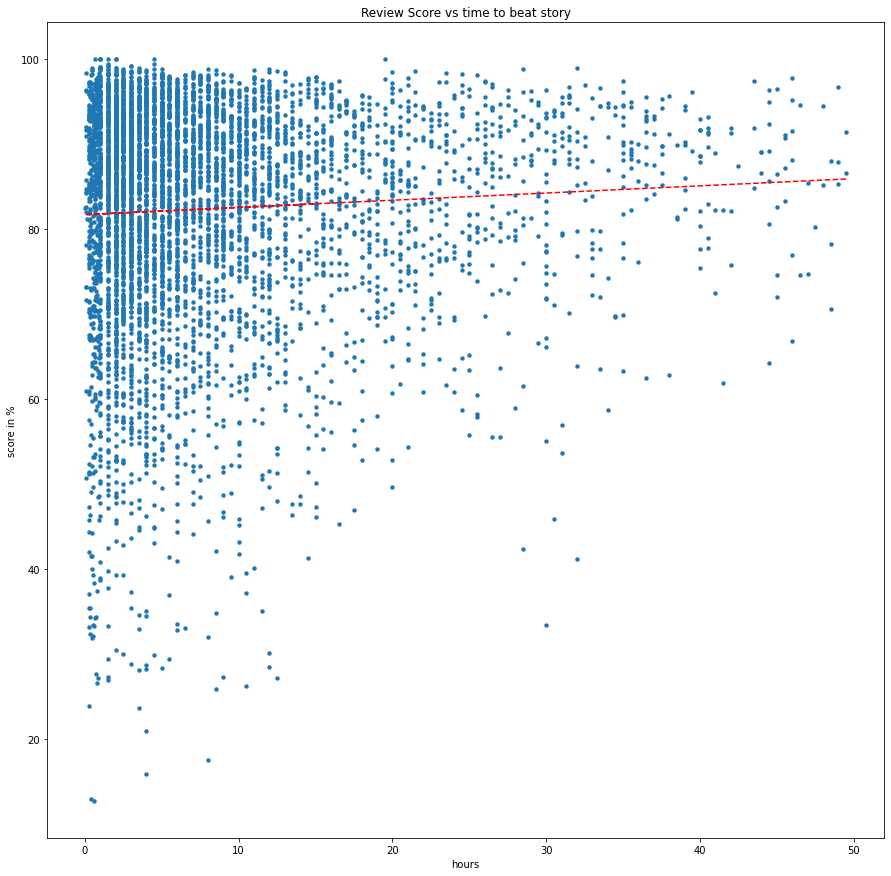

In [324]:
fig, ax = plt.subplots(figsize = (15, 15))
under_500 = all_games_with_time[all_games_with_time["main_time"] < 50]
under_500 = under_500[under_500["positive"]+under_500["negative"] > 50]
total_reviews = under_500["positive"]+under_500["negative"]
x = under_500["main_time"]
y = 100*under_500["positive"]/total_reviews
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, 'r--')

ax.scatter(x,y, s=20, linewidths=0)
# ax.set_xscale("log");
# ax.set_yscale("log");
ax.set_xlabel("hours")
ax.set_ylabel("score in %")
plt.title("Review Score vs time to beat story")
plt.show()

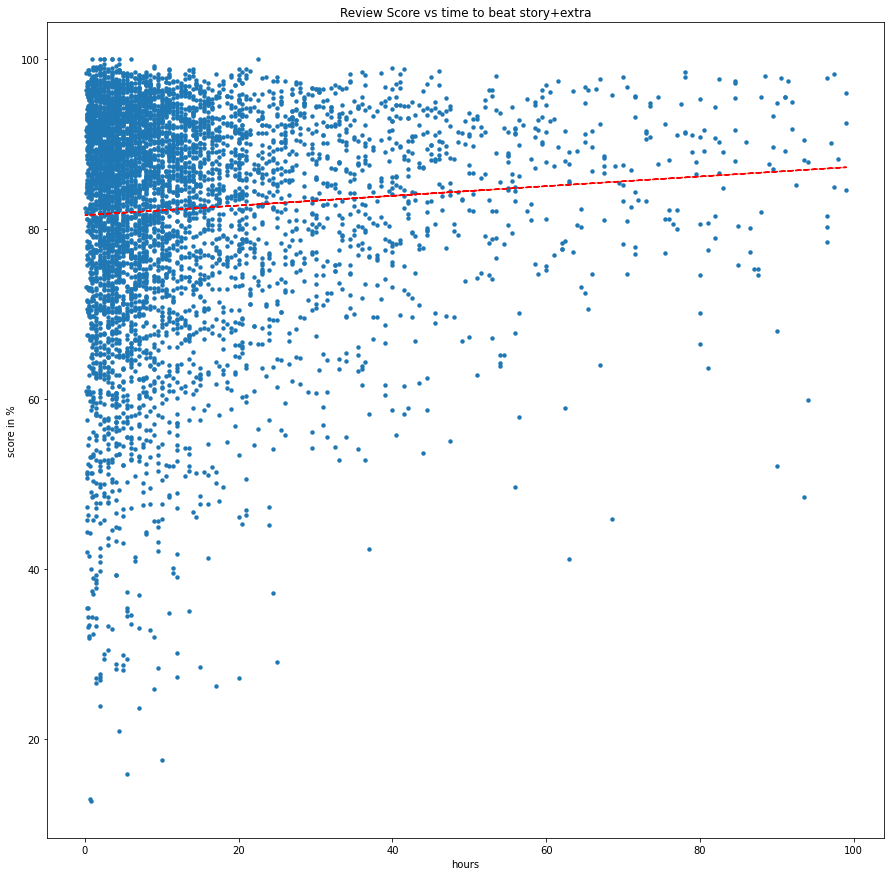

In [334]:
fig, ax = plt.subplots(figsize = (15, 15))
under_500 = all_games_with_time[all_games_with_time["main_extra_time"] < 100]
under_500 = under_500[under_500["positive"]+under_500["negative"] > 50]
total_reviews = under_500["positive"]+under_500["negative"]
x = under_500["main_extra_time"]
y = 100*under_500["positive"]/total_reviews
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, 'r--')

ax.scatter(x,y, s=20, linewidths=0)
# ax.set_xscale("log");
# ax.set_yscale("log");
ax.set_xlabel("hours")
ax.set_ylabel("score in %")
plt.title("Review Score vs time to beat story+extra")
plt.show()

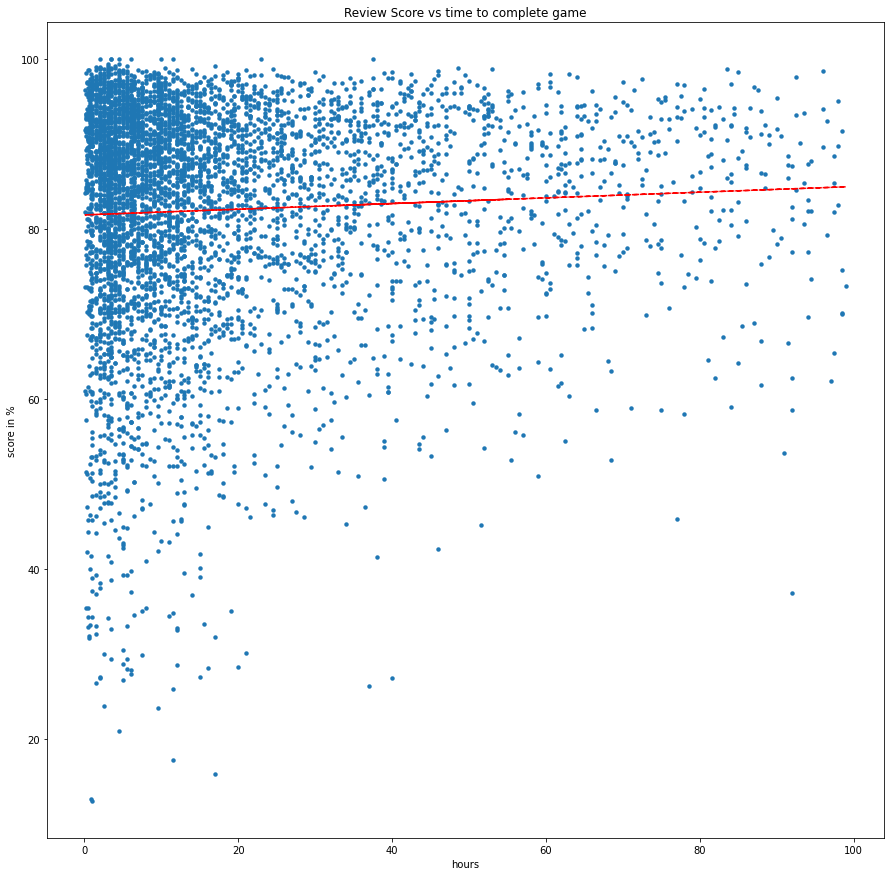

In [333]:
fig, ax = plt.subplots(figsize = (15, 15))
under_500 = all_games_with_time[all_games_with_time["completion_time"] < 100]
under_500 = under_500[under_500["positive"]+under_500["negative"] > 50]
total_reviews = under_500["positive"]+under_500["negative"]
x = under_500["completion_time"]
y = 100*under_500["positive"]/total_reviews
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, 'r--')

ax.scatter(x,y, s=20, linewidths=0)
# ax.set_xscale("log");
# ax.set_yscale("log");
ax.set_xlabel("hours")
ax.set_ylabel("score in %")
plt.title("Review Score vs time to complete game")
plt.show()

C:\Users\mirod\AppData\Local\Temp\ipykernel_23508\1228697187.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  under_500 = under_500[under_500["completion_time"]-under_500["main_time"] > 0][under_500["completion_time"]-under_500["main_time"] < 100]


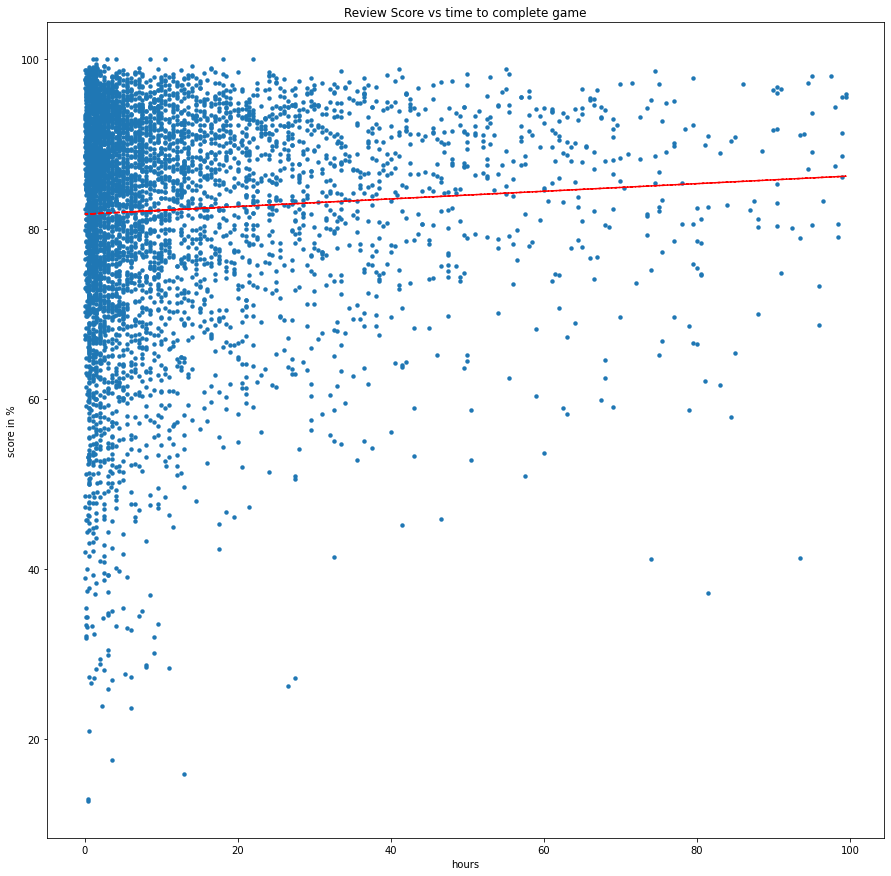

In [338]:
fig, ax = plt.subplots(figsize = (15, 15))
under_500 = all_games_with_time
under_500 = under_500[under_500["positive"]+under_500["negative"] > 50]
under_500 = under_500[under_500["completion_time"]-under_500["main_time"] > 0][under_500["completion_time"]-under_500["main_time"] < 100]
total_reviews = under_500["positive"]+under_500["negative"]
x = under_500["completion_time"]-under_500["main_time"]
x = under_500["completion_time"]-under_500["main_time"]
y = 100*under_500["positive"]/total_reviews
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, 'r--')

ax.scatter(x,y, s=20, linewidths=0)
# ax.set_xscale("log");
# ax.set_yscale("log");
ax.set_xlabel("hours")
ax.set_ylabel("score in %")
plt.title("Review Score vs time to complete game")
plt.show()

In [289]:
all_games_with_time[all_games_with_time["main_time"]>500][["name","main_time"]]

name  main_time
60      World of Tanks Blitz     2706.0
334           World of Tanks     1229.0
434   Phantasy Star Online 2     1454.0
680     Old School RuneScape     2000.0
723               RuneScape      2000.0
795                 ArcheAge     1059.0
1432                NGU IDLE      595.0

In [290]:
all_games_with_time[all_games_with_time["name"] == "Stardew Valley"]


appid            name     developer     publisher score_rank  positive  \
36  413150  Stardew Valley  ConcernedApe  ConcernedApe               441733   

    negative  userscore                    owners  average_forever  ...  \
36      8633          0  10,000,000 .. 20,000,000             3401  ...   

    price  initialprice  discount    ccu       hl2b_name main_time  \
36   1499          1499         0  30637  Stardew Valley      52.5   

    main_extra_time completion_time                   genre  \
36             88.5           150.0  Indie, RPG, Simulation   

                                                 tags  
36  {'Farming Sim': 5366, 'Life Sim': 5218, 'Pixel...  

[1 rows x 23 columns]

In [315]:
all_games_with_time.columns

Index(['appid', 'name', 'developer', 'publisher', 'score_rank', 'positive',
       'negative', 'userscore', 'owners', 'average_forever', 'average_2weeks',
       'median_forever', 'median_2weeks', 'price', 'initialprice', 'discount',
       'ccu', 'hl2b_name', 'main_time', 'main_extra_time', 'completion_time',
       'genre', 'tags'],
      dtype='object')

In [318]:
data_request = dict()
data_request['request'] = 'appdetails'
data_request['appid'] = '730'

data = steamspypi.download(data_request)
data

{'appid': 730,
 'name': 'Counter-Strike: Global Offensive',
 'developer': 'Valve, Hidden Path Entertainment',
 'publisher': 'Valve',
 'score_rank': '',
 'positive': 5566234,
 'negative': 743790,
 'userscore': 0,
 'owners': '50,000,000 .. 100,000,000',
 'average_forever': 29225,
 'average_2weeks': 906,
 'median_forever': 7006,
 'median_2weeks': 347,
 'price': '0',
 'initialprice': '0',
 'discount': '0',
 'ccu': 870661,
 'languages': 'English, Czech, Danish, Dutch, Finnish, French, German, Hungarian, Italian, Japanese, Korean, Norwegian, Polish, Portuguese, Portuguese - Brazil, Romanian, Russian, Simplified Chinese, Spanish - Spain, Swedish, Thai, Traditional Chinese, Turkish, Bulgarian, Ukrainian, Greek, Spanish - Latin America, Vietnamese',
 'genre': 'Action, Free to Play',
 'tags': {'FPS': 87453,
  'Shooter': 62776,
  'Multiplayer': 59959,
  'Competitive': 51383,
  'Action': 45915,
  'Team-Based': 44868,
  'e-sports': 41763,
  'Tactical': 39997,
  'First-Person': 38001,
  'PvP': 33153

In [339]:
all_games_with_time.to_csv('all_steam_games_with_time_data.csv')